In [140]:
import pandas as pd
import ast

# Step 1: Load the Excel file into a pandas DataFrame
file_path = 'bangalore_cars.xlsx'  # Replace with your file path
new_car_details = pd.read_excel(file_path,usecols=["new_car_detail"])

# Step 2: Convert the string representation of dictionaries into actual dictionaries
new_car_details['new_car_detail'] = new_car_details['new_car_detail'].apply(ast.literal_eval)

# Step 3: Normalize the dictionaries into separate columns (flattening the dictionaries)
new_car_details_normalized = pd.json_normalize(new_car_details['new_car_detail'])

# Step 4: Save the normalized DataFrame to a new Excel file
output_file_path = 'bangalore_normalized_new_car_details.xlsx'  # Replace with desired output path
new_car_details_normalized.to_excel(output_file_path, index=False)

print(f"Data successfully saved to {output_file_path}")


Data successfully saved to bangalore_normalized_new_car_details.xlsx


In [141]:
import pandas as pd
import re

# Load the data from the Excel file
new_car_details = pd.read_excel('bangalore_normalized_new_car_details.xlsx')

def convert_to_numeric(price):
    # Match the price in either Lakh or Crore
    match = re.search(r'₹\s*([\d,.]+)\s*(Lakh|Crore)', price)
    
    if match:
        numeric_str = match.group(1).replace(',', '')  # Extract numeric part and remove commas
        numeric_value = float(numeric_str)  # Convert to float

        # Check if the keyword is 'Lakh' or 'Crore'
        if match.group(2) == "Lakh":
            return numeric_value * 100000  # 1 Lakh = 100,000
        else:
            return numeric_value * 10000000  # 1 Crore = 10,000,000
    
    return None

# Apply the function to the column that contains the amounts
new_car_details['price'] = new_car_details['price'].apply(convert_to_numeric)


# Remove commas from column D (assuming the column contains strings)
new_car_details['km'] = new_car_details['km'].str.replace(',', '')

# If you want to convert it to a numerical data type (e.g., int or float)
new_car_details['km'] = pd.to_numeric(new_car_details['km'])

# Fill empty cells in the 'price' column with the mean value
# new_car_details['price'] = new_car_details['price'].fillna(new_car_details['price'].mean())

# Save the cleaned data back to Excel or a CSV
new_car_details.to_excel('bangalore_cleaned_new_car_details.xlsx', index=False)  # or use df.to_csv('cleaned_data.csv', index=False)


In [142]:
#Cleaning car_overview

In [143]:
import pandas as pd
import ast

# Step 1: Load the Excel file into a pandas DataFrame
file_path = 'bangalore_cars.xlsx'  # Replace with your file path
new_car_overview = pd.read_excel(file_path,usecols=["new_car_overview"])

# Step 2: Convert the string representation of dictionaries into actual dictionaries
new_car_overview['new_car_overview'] = new_car_overview['new_car_overview'].apply(ast.literal_eval)

# Step 3: Normalize the dictionaries into separate columns (flattening the dictionaries)
new_car_overview_normalized = pd.json_normalize(new_car_overview['new_car_overview'])

# Step 4: Save the normalized DataFrame to a new Excel file
output_file_path = 'bangalore_new_car_overview_normalized.xlsx'  # Replace with desired output path
new_car_overview_normalized.to_excel(output_file_path, index=False)

print(f"Data successfully saved to {output_file_path}")

Data successfully saved to bangalore_new_car_overview_normalized.xlsx


In [144]:
import pandas as pd
import ast

# Step 1: Load the Excel file into a pandas DataFrame
file_path = 'bangalore_new_car_overview_normalized.xlsx'  # Replace with your file path
top = pd.read_excel(file_path, usecols=["top"])

# Step 2: Convert the string representation of dictionaries into actual dictionaries
top['top'] = top['top'].apply(ast.literal_eval)

# Step 3: Define a function to place data in the correct columns based on the first key
def place_data_in_columns(dict_list):
    columns = ['Registration Year', 'Insurance Validity', 'Fuel Type', 'Seats', 'Kms Driven', 'RTO', 'Ownership', 'Engine Displacement', 'Transmission', 'Year of Manufacture']
    row = {col: '' for col in columns}  # Initialize the row with empty values

    if isinstance(dict_list, list):  # Ensure it's a list of dictionaries
        for item in dict_list:
            if isinstance(item, dict):  # Ensure each item is a dictionary
                key = item.get('key')
                value = item.get('value', '')

                # Check the starting key and place the value in the correct column
                if key == 'Registration Year':
                    row['Registration Year'] = value
                elif key == 'Insurance Validity':
                    row['Insurance Validity'] = value
                elif key == 'Fuel Type':
                    row['Fuel Type'] = value
                elif key == 'Seats':
                    row['Seats'] = value
                elif key == 'Kms Driven':
                    row['Kms Driven'] = value
                elif key == 'RTO':
                    row['RTO'] = value
                elif key == 'Ownership':
                    row['Ownership'] = value
                elif key == 'Engine Displacement':
                    row['Engine Displacement'] = value
                elif key == 'Transmission':
                    row['Transmission'] = value
                elif key == 'Year of Manufacture':
                    row['Year of Manufacture'] = value

    return row

# Step 4: Apply the function to each row
top_normalized = top['top'].apply(place_data_in_columns)

# Step 5: Convert the list of dictionaries into a DataFrame
top_normalized_df = pd.DataFrame(top_normalized.tolist())

# Step 6: Save the normalized DataFrame to a new Excel file
output_file_path = 'bangalore_new_car_overview_normalized2.xlsx'  # Replace with desired output path
top_normalized_df.to_excel(output_file_path, index=False)

print(f"Data successfully transformed and saved to {output_file_path}")


Data successfully transformed and saved to bangalore_new_car_overview_normalized2.xlsx


In [145]:
import pandas as pd

# Step 1: Load the Excel file into a pandas DataFrame
file_path = 'bangalore_new_car_overview_normalized2.xlsx'  # Replace with your file path
df = pd.read_excel(file_path)

# Step 2: Extract only the year from "Registration Year" (e.g., 'Jun 2019' -> '2019')
df['Registration Year'] = df['Registration Year'].str[-4:]

# Step 3: Convert the "Registration Year" column to numeric (will coerce invalid strings to NaN)
df['Registration Year'] = pd.to_numeric(df['Registration Year'], errors='coerce')

# Step 4: Calculate the median year (ignoring NaN) and fill NaN values with this median
# median_year = df['Registration Year'].median()
# df.loc[df['Registration Year'].isna(), 'Registration Year'] = median_year

# Step 5: Clean "Insurance Validity" column (strip spaces and convert to string)
df['Insurance Validity'] = df['Insurance Validity'].astype(str).str.strip()

# Step 6: Inspect unique values in "Insurance Validity" to check for issues
# unique_values = df['Insurance Validity'].unique()
# print("Unique values before replacement:", unique_values)

# Step 7: Replace numeric-like entries in "Insurance Validity"
# Convert the column to string again to ensure consistent replacement
# df['Insurance Validity'] = df['Insurance Validity'].apply(lambda x: 'Not Available' if x in ['1', '2'] else x)

# df['Insurance Validity'] = df['Insurance Validity'].replace(['nan', 'NaN'], 'Not Available')
# df['Insurance Validity'] = df['Insurance Validity'].fillna('Not Available')

# Step 8: Inspect unique values after replacement to confirm changes
# unique_values_after = df['Insurance Validity'].unique()
# print("Unique values after replacement:", unique_values_after)

# df['Seats'] = df['Seats'].ffill()

# Step 9: Remove commas from "Kms Driven" column
df['Kms Driven'] = df['Kms Driven'].astype(str).str.replace(',', '', regex=False)

# df['Year of Manufacture'] = df['Year of Manufacture'].fillna(df['Registration Year'])

# Step 9: Save the updated DataFrame back to Excel
output_file_path = 'bangalore_cleaned_new_car_overview.xlsx'  # Replace with your desired output path
df.to_excel(output_file_path, index=False)

print(f"Data has been cleaned and saved to {output_file_path}")


Data has been cleaned and saved to bangalore_cleaned_new_car_overview.xlsx


In [146]:
#Car_features

In [147]:
import pandas as pd
import ast

# Step 1: Load the Excel file into a pandas DataFrame
file_path = 'bangalore_cars.xlsx'  # Replace with your file path
new_car_feature = pd.read_excel(file_path,usecols=["new_car_feature"])

# Step 2: Convert the string representation of dictionaries into actual dictionaries
new_car_feature['new_car_feature'] = new_car_feature['new_car_feature'].apply(ast.literal_eval)

# Step 3: Normalize the dictionaries into separate columns (flattening the dictionaries)
new_car_feature_normalized = pd.json_normalize(new_car_feature['new_car_feature'])

# Step 4: Save the normalized DataFrame to a new Excel file
output_file_path = 'bangalore_new_car_feature_normalized1.xlsx'  # Replace with desired output path
new_car_feature_normalized.to_excel(output_file_path, index=False)

print(f"Data successfully saved to {output_file_path}")

Data successfully saved to bangalore_new_car_feature_normalized1.xlsx


In [148]:
import pandas as pd
import ast

# Step 1: Load the Excel file into a pandas DataFrame
file_path = 'bangalore_new_car_feature_normalized1.xlsx'  # Replace with your file path
top = pd.read_excel(file_path, usecols=["top"])

# Step 2: Convert the string representation of dictionaries into actual dictionaries
top['top'] = top['top'].apply(ast.literal_eval)

# Step 3: Extract only the 'value' from each dictionary and join them into a single string
top['top'] = top['top'].apply(lambda x: ', '.join([item['value'] for item in x]))

# Step 4: Save the updated DataFrame back to Excel
output_file_path = 'bangalore_feature_top_data.xlsx'  # Replace with your desired output path
top.to_excel(output_file_path, index=False)

print(f"Data has been saved to {output_file_path}")


Data has been saved to bangalore_feature_top_data.xlsx


In [149]:
import pandas as pd
import ast

# Step 1: Load the Excel file into a pandas DataFrame
file_path = 'bangalore_new_car_feature_normalized1.xlsx'  # Replace with your file path
data = pd.read_excel(file_path, usecols=["data"])

# Step 2: Convert the string representation of dictionaries into actual dictionaries
data['data'] = data['data'].apply(ast.literal_eval)

# Step 4: Apply the function to each row
data_normalized = data['data']

# Step 5: Convert the list of dictionaries into a DataFrame
data_normalized_df = pd.DataFrame(data_normalized.tolist())

# Step 6: Save the normalized DataFrame to a new Excel file
output_file_path = 'bangalore_new_car_feature_normalized2.xlsx'  # Replace with desired output path
data_normalized_df.to_excel(output_file_path, index=False)

print(f"Data successfully transformed and saved to {output_file_path}")


Data successfully transformed and saved to bangalore_new_car_feature_normalized2.xlsx


In [150]:
import pandas as pd
import ast

# Function to safely evaluate strings as Python literals
def safe_eval(value):
    try:
        return ast.literal_eval(value)
    except (ValueError, SyntaxError):
        return value

# Load the Excel file
input_file = 'bangalore_new_car_feature_normalized2.xlsx'
df = pd.read_excel(input_file)

# Initialize an empty list to store processed data
processed_data = []

# Process each column
for column in df.columns:
    # Convert string representations of dictionaries/lists to actual objects
    df[column] = df[column].apply(safe_eval)
    
    # Check if column contains dictionaries or lists of dictionaries
    if df[column].apply(lambda x: isinstance(x, dict)).any():
        # print(f'Processing column: {column}')
        # Extract dictionary data
        temp_df = pd.json_normalize(df[column])
        temp_df.columns = [f'{column}_{col}' for col in temp_df.columns]
        processed_data.append(temp_df)
    elif df[column].apply(lambda x: isinstance(x, list) and all(isinstance(i, dict) for i in x)).any():
        print(f'Processing column with lists of dictionaries: {column}')
        # Extract list of dictionaries data
        temp_df = df[column].apply(pd.json_normalize).apply(lambda x: pd.concat(x, ignore_index=True) if x else pd.DataFrame())
        temp_df = pd.concat(temp_df.tolist(), ignore_index=True)  # Concatenate all lists into a single DataFrame
        temp_df.columns = [f'{column}_{col}' for col in temp_df.columns]
        processed_data.append(temp_df)
    else:
        print(f'Column {column} does not contain dictionaries or lists of dictionaries.')

# Check if processed_data is not empty
if processed_data:
    # Combine all processed columns into a single DataFrame
    processed_df = pd.concat(processed_data, axis=1)
    # Save the processed DataFrame to a new Excel file
    output_file = 'bangalore_new_car_feature_normalized3.xlsx'
    processed_df.to_excel(output_file, index=False)
    print(f'Processed data saved to {output_file}')
else:
    print('No columns contained dictionaries or lists of dictionaries to process.')


Processed data saved to bangalore_new_car_feature_normalized3.xlsx


In [151]:
import pandas as pd
import ast

# Function to safely evaluate strings as Python literals
def safe_eval(value):
    try:
        return ast.literal_eval(value)
    except (ValueError, SyntaxError):
        return value

# Load the Excel file
input_file = 'bangalore_new_car_feature_normalized3.xlsx'  # Replace with your actual file path
df = pd.read_excel(input_file, sheet_name='Sheet1', usecols=["0_list", "1_list", "2_list", "3_list", "4_list"])  # Load only the specified columns

# Initialize an empty list to store processed data
processed_data = []

# Process each column
for column in df.columns:
    # Convert string representations of dictionaries/lists to actual objects
    df[column] = df[column].apply(safe_eval)
    
    # Check if column contains dictionaries or lists of dictionaries
    if df[column].apply(lambda x: isinstance(x, dict)).any():
        # print(f'Processing column: {column}')
        # Extract 'value' from dictionary data
        df[column] = df[column].apply(lambda x: x['value'] if isinstance(x, dict) else None)
    elif df[column].apply(lambda x: isinstance(x, list) and all(isinstance(i, dict) for i in x)).any():
        # print(f'Processing column with lists of dictionaries: {column}')
        # Extract 'value' from lists of dictionaries
        df[column] = df[column].apply(lambda x: ', '.join([item['value'] for item in x]) if isinstance(x, list) else None)
    else:
        print(f'Column {column} does not contain dictionaries or lists of dictionaries.')

# Rename the columns
df.columns = ['Comfort', 'Interior', 'Exterior', 'Safety', 'Entertainment']

# Save the processed DataFrame to a new Excel file
output_file = 'bangalore_Feature_data.xlsx'  # Replace with your desired output path
df.to_excel(output_file, index=False)

print(f"Processed data has been saved to {output_file}")


Processed data has been saved to bangalore_Feature_data.xlsx


In [152]:
##Car_spes

In [153]:
import pandas as pd
import ast

# Step 1: Load the Excel file into a pandas DataFrame
file_path = 'bangalore_cars.xlsx'  # Replace with your file path
new_car_specs = pd.read_excel(file_path,usecols=["new_car_specs"])

# Step 2: Convert the string representation of dictionaries into actual dictionaries
new_car_specs['new_car_specs'] = new_car_specs['new_car_specs'].apply(ast.literal_eval)

# Step 3: Normalize the dictionaries into separate columns (flattening the dictionaries)
new_car_specs_normalized = pd.json_normalize(new_car_specs['new_car_specs'])

# Step 4: Save the normalized DataFrame to a new Excel file
output_file_path = 'bangalore_new_car_specs_normalized1.xlsx'  # Replace with desired output path
new_car_specs_normalized.to_excel(output_file_path, index=False)

print(f"Data successfully saved to {output_file_path}")

Data successfully saved to bangalore_new_car_specs_normalized1.xlsx


In [154]:
import pandas as pd
import ast

# Step 1: Load the Excel file into a pandas DataFrame
file_path = 'bangalore_new_car_specs_normalized1.xlsx'  # Replace with your file path
top = pd.read_excel(file_path,usecols=["top"])

# Step 2: Convert the string representation of dictionaries into actual dictionaries
top['top'] = top['top'].apply(ast.literal_eval)

# Step 3: Define a function to place data in the correct columns based on the first key
def place_data_in_columns(dict_list):
    columns = ['Mileage', 'Engine', 'Max Power', 'Torque', 'Seats']
    row = {col: '' for col in columns}  # Initialize the row with empty values

    if isinstance(dict_list, list):  # Ensure it's a list of dictionaries
        for item in dict_list:
            if isinstance(item, dict):  # Ensure each item is a dictionary
                key = item.get('key')
                value = item.get('value', '')

                # Check the starting key and place the value in the correct column
                if key == 'Mileage':
                    row['Mileage'] = value
                elif key == 'Engine':
                    row['Engine'] = value
                elif key == 'Max Power':
                    row['Max Power'] = value
                elif key == 'Torque':
                    row['Torque'] = value
                elif key == 'Seats':
                    row['Seats'] = value
    return row

# Step 4: Apply the function to each row
top_normalized = top['top'].apply(place_data_in_columns)

# Step 5: Convert the list of dictionaries into a DataFrame
top_normalized_df = pd.DataFrame(top_normalized.tolist())

# Step 6: Save the normalized DataFrame to a new Excel file
output_file_path = 'bangalore_specs_top.xlsx'  # Replace with desired output path
top_normalized_df.to_excel(output_file_path, index=False)

print(f"Data successfully transformed and saved to {output_file_path}")


Data successfully transformed and saved to bangalore_specs_top.xlsx


In [155]:
import pandas as pd
import ast

# Step 1: Load the Excel file into a pandas DataFrame
file_path = 'bangalore_new_car_specs_normalized1.xlsx'  # Replace with your file path
data = pd.read_excel(file_path, usecols=["data"])

# Step 2: Convert the string representation of dictionaries into actual dictionaries
data['data'] = data['data'].apply(ast.literal_eval)

# Step 4: Apply the function to each row
data_normalized = data['data']

# Step 5: Convert the list of dictionaries into a DataFrame
data_normalized_df = pd.DataFrame(data_normalized.tolist())

# Step 6: Save the normalized DataFrame to a new Excel file
output_file_path = 'bangalore_new_car_specs_normalized2.xlsx'  # Replace with desired output path
data_normalized_df.to_excel(output_file_path, index=False)

print(f"Data successfully transformed and saved to {output_file_path}")


Data successfully transformed and saved to bangalore_new_car_specs_normalized2.xlsx


In [156]:
import pandas as pd
import ast

# Function to safely evaluate strings as Python literals
def safe_eval(value):
    try:
        return ast.literal_eval(value)
    except (ValueError, SyntaxError):
        return value

# Load the Excel file
input_file = 'bangalore_new_car_specs_normalized2.xlsx'
df = pd.read_excel(input_file)

# Initialize an empty list to store processed data
processed_data = []

# Process each column
for column in df.columns:
    # Convert string representations of dictionaries/lists to actual objects
    df[column] = df[column].apply(safe_eval)
    
    # Check if column contains dictionaries or lists of dictionaries
    if df[column].apply(lambda x: isinstance(x, dict)).any():
        # print(f'Processing column: {column}')
        # Extract dictionary data
        temp_df = pd.json_normalize(df[column])
        temp_df.columns = [f'{column}_{col}' for col in temp_df.columns]
        processed_data.append(temp_df)
    elif df[column].apply(lambda x: isinstance(x, list) and all(isinstance(i, dict) for i in x)).any():
        # print(f'Processing column with lists of dictionaries: {column}')
        # Extract list of dictionaries data
        temp_df = df[column].apply(pd.json_normalize).apply(lambda x: pd.concat(x, ignore_index=True) if x else pd.DataFrame())
        temp_df = pd.concat(temp_df.tolist(), ignore_index=True)  # Concatenate all lists into a single DataFrame
        temp_df.columns = [f'{column}_{col}' for col in temp_df.columns]
        processed_data.append(temp_df)
    else:
        print(f'Column {column} does not contain dictionaries or lists of dictionaries.')

# Check if processed_data is not empty
if processed_data:
    # Combine all processed columns into a single DataFrame
    processed_df = pd.concat(processed_data, axis=1)
    # Save the processed DataFrame to a new Excel file
    output_file = 'bangalore_new_car_specs_normalized3.xlsx'
    processed_df.to_excel(output_file, index=False)
    print(f'Processed data saved to {output_file}')
else:
    print('No columns contained dictionaries or lists of dictionaries to process.')


Processed data saved to bangalore_new_car_specs_normalized3.xlsx


In [157]:
import pandas as pd
import ast

# Step 1: Load the Excel file into a pandas DataFrame
file_path = 'bangalore_new_car_specs_normalized3.xlsx'  # Replace with your file path
df = pd.read_excel(file_path, sheet_name='Sheet1', usecols=["0_list"])  # Ensure the sheet name and column name are correct

# Step 2: Convert the string representation of dictionaries into actual dictionaries
df['0_list'] = df['0_list'].apply(ast.literal_eval)

# Step 3: Define a function to place data in the correct columns based on the first key
def place_data_in_columns(dict_list):
    columns = ['Color', 'Engine Type', 'Displacement', 'Max Power', 'Max Torque', 'No of Cylinder', 'Values per Cylinder', 'Value Configuration', 'Fuel Suppy System', 'BoreX Stroke', 'Compression Ratio', 'Turbo Charger', 'Super Charger']
    row = {col: '' for col in columns}  # Initialize the row with empty values

    if isinstance(dict_list, list):  # Ensure it's a list of dictionaries
        for item in dict_list:
            if isinstance(item, dict):  # Ensure each item is a dictionary
                key = item.get('key')
                value = item.get('value', '')

                # Place the value in the correct column
                if key in row:
                    row[key] = value
    return row

# Step 4: Apply the function to each row
top_normalized = df['0_list'].apply(place_data_in_columns)

# Step 5: Convert the list of dictionaries into a DataFrame
top_normalized_df = pd.DataFrame(top_normalized.tolist())

# Step 6: Save the normalized DataFrame to a new Excel file
output_file_path = 'bangalore_specs_Engine_list.xlsx'  # Replace with the desired output path
top_normalized_df.to_excel(output_file_path, index=False)

print(f"Data successfully transformed and saved to {output_file_path}")


Data successfully transformed and saved to bangalore_specs_Engine_list.xlsx


In [158]:
import pandas as pd
import ast

# Step 1: Load the Excel file into a pandas DataFrame
file_path = 'bangalore_new_car_specs_normalized3.xlsx'  # Replace with your file path
df = pd.read_excel(file_path, sheet_name='Sheet1', usecols=["1_list"])  # Ensure the sheet name and column name are correct

# Step 2: Clean NaN values and convert string representation of dictionaries into actual dictionaries
def safe_literal_eval(value):
    if pd.isna(value):  # Check for NaN values
        return []
    try:
        return ast.literal_eval(value)
    except (ValueError, SyntaxError):
        return []

df['1_list'] = df['1_list'].apply(safe_literal_eval)

# Step 3: Define a function to place data in the correct columns based on the first key
def place_data_in_columns(dict_list):
    columns = ['Length', 'Width', 'Height', 'Wheel Base', 'Max Torque', 'Front Tread', 'Rear Tread', 'Kerb Weight', 'Gross Weight']
    row = {col: '' for col in columns}  # Initialize the row with empty values

    if isinstance(dict_list, list):  # Ensure it's a list of dictionaries
        for item in dict_list:
            if isinstance(item, dict):  # Ensure each item is a dictionary
                key = item.get('key')
                value = item.get('value', '')

                # Place the value in the correct column
                if key in row:
                    row[key] = value
    return row

# Step 4: Apply the function to each row
top_normalized = df['1_list'].apply(place_data_in_columns)

# Step 5: Convert the list of dictionaries into a DataFrame
top_normalized_df = pd.DataFrame(top_normalized.tolist())

# Step 6: Save the normalized DataFrame to a new Excel file
output_file_path = 'bangalore_specs_Dimensions_list.xlsx'  # Replace with the desired output path
top_normalized_df.to_excel(output_file_path, index=False)

print(f"Data successfully transformed and saved to {output_file_path}")


Data successfully transformed and saved to bangalore_specs_Dimensions_list.xlsx


In [159]:
import pandas as pd
import ast

# Step 1: Load the Excel file into a pandas DataFrame
file_path = 'bangalore_new_car_specs_normalized3.xlsx'  # Replace with your file path
df = pd.read_excel(file_path, sheet_name='Sheet1', usecols=["2_list"])  # Ensure the sheet name and column name are correct

# Step 2: Clean NaN values and convert string representation of dictionaries into actual dictionaries
def safe_literal_eval(value):
    if pd.isna(value):  # Check for NaN values
        return []
    try:
        return ast.literal_eval(value)
    except (ValueError, SyntaxError):
        return []

df['2_list'] = df['2_list'].apply(safe_literal_eval)

# Step 3: Define a function to place data in the correct columns based on the first key
def place_data_in_columns(dict_list):
    columns = ['Gear Box', 'Drive Type', 'Seating Capacity', 'Steering Type', 'Turning Radius', 'Front Brake Type', 'Rear Brake Type', 'Top Speed', 'Acceleration','Tyre Type','No Door Numbers','Cargo Volumn']
    row = {col: '' for col in columns}  # Initialize the row with empty values

    if isinstance(dict_list, list):  # Ensure it's a list of dictionaries
        for item in dict_list:
            if isinstance(item, dict):  # Ensure each item is a dictionary
                key = item.get('key')
                value = item.get('value', '')

                # Place the value in the correct column
                if key in row:
                    row[key] = value
    return row

# Step 4: Apply the function to each row
top_normalized = df['2_list'].apply(place_data_in_columns)

# Step 5: Convert the list of dictionaries into a DataFrame
top_normalized_df = pd.DataFrame(top_normalized.tolist())

# Step 6: Save the normalized DataFrame to a new Excel file
output_file_path = 'bangalore_specs_Miscellaneous_list.xlsx'  # Replace with the desired output path
top_normalized_df.to_excel(output_file_path, index=False)

print(f"Data successfully transformed and saved to {output_file_path}")


Data successfully transformed and saved to bangalore_specs_Miscellaneous_list.xlsx


In [160]:
import pandas as pd

# Step 1: Load the files into pandas DataFrames
file1 = 'bangalore_cleaned_new_car_details.xlsx'  # Replace with your file paths
file2 = 'bangalore_cleaned_new_car_overview.xlsx'
file3 = 'bangalore_feature_top_data.xlsx'
file4 = 'bangalore_Feature_data.xlsx'
file5 = 'bangalore_specs_top.xlsx'
file6 = 'bangalore_specs_Engine_list.xlsx'
file7 = 'bangalore_specs_Dimensions_list.xlsx'
file8 = 'bangalore_specs_Miscellaneous_list.xlsx'

df1 = pd.read_excel(file1)
df2 = pd.read_excel(file2)
df3 = pd.read_excel(file3)
df4 = pd.read_excel(file4)
df5 = pd.read_excel(file5)
df6 = pd.read_excel(file6)
df7 = pd.read_excel(file7)
df8 = pd.read_excel(file8)

# # Step 2: Merge or concatenate the DataFrames
# # If you have a common column to merge on, use pd.merge()
# merged_df = pd.merge(df1, df2, on='common_column', how='inner')  # You can change 'inner' to 'left', 'right', or 'outer'

# If you want to concatenate them instead (assuming they have the same columns)
concatenated_df = pd.concat([df1, df2,df3,df4,df5,df6,df7,df8], axis=1)  # axis=0 for vertical, axis=1 for horizontal

# Step : Insert the 'City' column at the beginning with 'Bangalore' as the value
concatenated_df.insert(0, 'City', 'Bangalore')

#Step 3: Rename columns if necessary
concatenated_df = concatenated_df.rename(columns={
'it': 'Car_Detail_Ignition type', 
'ft': 'Car_Detail_Fuel type',
'bt': 'Car_Detail_Body type',
'km': 'Car_Detail_Kilometers driven',
'transmission': 'Car_Detail_Transmission type',                                                  
'ownerNo': 'Car_Detail_Number of previous owners',
'owner': 'Car_Detail_Ownership details',
'oem': 'Car_Detail_Original Equipment Manufacturer',
'model': 'Car_Detail_Car model',
'modelYear': 'Car_Detail_Year of car manufacture',
'centralVariantId': 'Car_Detail_Central variant ID',
'variantName': 'Car_Detail_Variant name',
'price':'Car_Detail_Price of the used car',
'priceActual': 'Car_Detail_Actual price',
'priceSaving': 'Car_Detail_Price saving information',
'priceFixedText': 'Car_Detail_Fixed price details',
'trendingText.desc': 'Car_Detail_Trending car information',
'Registration Year':'Car_Overview_Registration Year',
'Insurance Validity':'Car_Overview_Insurance Validity',
'Fuel Type':'Car_Overview_Fuel Type',
'Seats':'Car_Overview_Seats',
'Kms Driven':'Car_Overview_Kms Driven',
'Ownership':'Car_Overview_Ownership',
'Engine Displacement':'Car_Overview_Engine Displacement',
'Transmission':'Car_Overview_Transmission',
'Year of Manufacture':'Car_Overview_Year of Manufacture',
'top': 'Car_Feature_Top Features',
'Comfort': 'Car_Feature_Data_Comfort',
'Interior': 'Car_Feature_Data_Interior',
'Exterior': 'Car_Feature_Data_Exterior',
'Safety': 'Car_Feature_Data_Safety',
'Entertainment': 'Car_Feature_Data_Entertainment', 
'Mileage': 'Car_Specs_Top Specifications_Mileage',
'Engine': 'Car_Specs_Top Specifications_Engine',
'Max Power': 'Car_Specs_Top Specifications_Max Power',
'Torque': 'Car_Specs_Top Specifications_Torque',
'Seats': 'Car_Specs_Top Specifications_Seats',
'Color': 'Car_Specs_engine and transmission_Engine_Color',
'Engine Type': 'Car_Specs_engine and transmission_Engine_Engine Type',
'Displacement': 'Car_Specs_engine and transmission_Engine_Displacement',
'Max Power': 'Car_Specs_engine and transmission_Engine_Max Power',
'Max Torque': 'Car_Specs_engine and transmission_Engine_Max Torque',
'No of Cylinder': 'Car_Specs_engine and transmission_Engine_No of Cylinder',
'Values per Cylinder': 'Car_Specs_engine and transmission_Engine_Values per Cylinder',
'Value Configuration': 'Car_Specs_engine and transmission_Engine_Value Configuration',
'Fuel Suppy System': 'Car_Specs_engine and transmission_Engine_Fuel Suppy System',
'BoreX Stroke': 'Car_Specs_engine and transmission_Engine_BoreX Stroke',
'Compression Ratio': 'Car_Specs_engine and transmission_Engine_Compression Ratio',
'Turbo Charger': 'Car_Specs_engine and transmission_Engine_Turbo Charger',
'Super Charger': 'Car_Specs_engine and transmission_Engine_Super Charger',
'Length': 'Car_Specs_Dimensions_Length',
'Width': 'Car_Specs_Dimensions_Width',
'Height': 'Car_Specs_Dimensions_Height',
'Wheel Base': 'Car_Specs_Dimensions_Wheel Baser',
'Max Torque': 'Car_Specs_Dimensions_Max Torque',
'Front Tread': 'Car_Specs_Dimensions_Front Tread',
'Rear Tread': 'Car_Specs_Dimensions_Rear Tread',
'Kerb Weight': 'Car_Specs_Dimensions_Kerb Weight',
'Gross Weight': 'Car_Specs_Dimensions_Gross Weight',
'Gear Box': 'Car_Specs_Dimensions_Gear Box',
'Drive Type': 'Car_Specs_Miscellaneous_Engine_Drive Type',
'Seating Capacity': 'Car_Specs_Miscellaneous_Seating Capacity',
'Steering Type': 'Car_Specs_Miscellaneous_Steering Type',
'Turning Radius': 'Car_Specs_Miscellaneous_Turning Radius',
'Front Brake Type': 'Car_Specs_Miscellaneous_Front Brake Type',
'Rear Brake Type': 'Car_Specs_Miscellaneous_Rear Brake Type',
'Top Speed': 'Car_Specs_Miscellaneous_Top Speed',
'Acceleration': 'Car_Specs_Miscellaneous_Acceleration',
'Tyre Type': 'Car_Specs_Miscellaneous_Tyre Type',
'No Door Numbers': 'Car_Specs_Miscellaneous_No Door Numbers',
'Cargo Volumn': 'Car_Specs_Miscellaneous_Cargo Volumn'})
   
# Step 4: Save the combined DataFrame to a new file
output_file = 'Cleaned_bangalore_cars.xlsx'
concatenated_df.to_excel(output_file, index=False)

print(f"Data successfully combined and saved to {output_file}")


Data successfully combined and saved to Cleaned_bangalore_cars.xlsx


In [161]:
import pandas as pd
import ast

# Step 1: Load the Excel file into a pandas DataFrame
file_path = 'chennai_cars.xlsx'  # Replace with your file path
new_car_details = pd.read_excel(file_path,usecols=["new_car_detail"])

# Step 2: Convert the string representation of dictionaries into actual dictionaries
new_car_details['new_car_detail'] = new_car_details['new_car_detail'].apply(ast.literal_eval)

# Step 3: Normalize the dictionaries into separate columns (flattening the dictionaries)
new_car_details_normalized = pd.json_normalize(new_car_details['new_car_detail'])

# Step 4: Save the normalized DataFrame to a new Excel file
output_file_path = 'chennai_normalized_new_car_details.xlsx'  # Replace with desired output path
new_car_details_normalized.to_excel(output_file_path, index=False)


print(f"Data successfully saved to {output_file_path}")


Data successfully saved to chennai_normalized_new_car_details.xlsx


In [162]:
import pandas as pd
import re

# Load the data from the Excel file
new_car_details = pd.read_excel('chennai_normalized_new_car_details.xlsx')

def convert_to_numeric(price):
    # Match the price in either Lakh or Crore
    match = re.search(r'₹\s*([\d,.]+)\s*(Lakh|Crore)', price)
    
    if match:
        numeric_str = match.group(1).replace(',', '')  # Extract numeric part and remove commas
        numeric_value = float(numeric_str)  # Convert to float

        # Check if the keyword is 'Lakh' or 'Crore'
        if match.group(2) == "Lakh":
            return numeric_value * 100000  # 1 Lakh = 100,000
        else:
            return numeric_value * 10000000  # 1 Crore = 10,000,000
    
    return None

# Apply the function to the column that contains the amounts
new_car_details['price'] = new_car_details['price'].apply(convert_to_numeric)


# Remove commas from column D (assuming the column contains strings)
new_car_details['km'] = new_car_details['km'].str.replace(',', '')

# If you want to convert it to a numerical data type (e.g., int or float)
new_car_details['km'] = pd.to_numeric(new_car_details['km'])

# Fill empty cells in the 'price' column with the mean value
# new_car_details['price'] = new_car_details['price'].fillna(new_car_details['price'].mean())

# Save the cleaned data back to Excel or a CSV
new_car_details.to_excel('chennai_cleaned_new_car_details.xlsx', index=False)  # or use df.to_csv('cleaned_data.csv', index=False)


In [163]:
#Cleaning car_overview

In [164]:
import pandas as pd
import ast

# Step 1: Load the Excel file into a pandas DataFrame
file_path = 'chennai_cars.xlsx'  # Replace with your file path
new_car_overview = pd.read_excel(file_path,usecols=["new_car_overview"])

# Step 2: Convert the string representation of dictionaries into actual dictionaries
new_car_overview['new_car_overview'] = new_car_overview['new_car_overview'].apply(ast.literal_eval)

# Step 3: Normalize the dictionaries into separate columns (flattening the dictionaries)
new_car_overview_normalized = pd.json_normalize(new_car_overview['new_car_overview'])

# Step 4: Save the normalized DataFrame to a new Excel file
output_file_path = 'chennai_new_car_overview_normalized.xlsx'  # Replace with desired output path
new_car_overview_normalized.to_excel(output_file_path, index=False)

print(f"Data successfully saved to {output_file_path}")

Data successfully saved to chennai_new_car_overview_normalized.xlsx


In [165]:
import pandas as pd
import ast

# Step 1: Load the Excel file into a pandas DataFrame
file_path = 'chennai_new_car_overview_normalized.xlsx'  # Replace with your file path
top = pd.read_excel(file_path, usecols=["top"])

# Step 2: Convert the string representation of dictionaries into actual dictionaries
top['top'] = top['top'].apply(ast.literal_eval)

# Step 3: Define a function to place data in the correct columns based on the first key
def place_data_in_columns(dict_list):
    columns = ['Registration Year', 'Insurance Validity', 'Fuel Type', 'Seats', 'Kms Driven', 'RTO', 'Ownership', 'Engine Displacement', 'Transmission', 'Year of Manufacture']
    row = {col: '' for col in columns}  # Initialize the row with empty values

    if isinstance(dict_list, list):  # Ensure it's a list of dictionaries
        for item in dict_list:
            if isinstance(item, dict):  # Ensure each item is a dictionary
                key = item.get('key')
                value = item.get('value', '')

                # Check the starting key and place the value in the correct column
                if key == 'Registration Year':
                    row['Registration Year'] = value
                elif key == 'Insurance Validity':
                    row['Insurance Validity'] = value
                elif key == 'Fuel Type':
                    row['Fuel Type'] = value
                elif key == 'Seats':
                    row['Seats'] = value
                elif key == 'Kms Driven':
                    row['Kms Driven'] = value
                elif key == 'RTO':
                    row['RTO'] = value
                elif key == 'Ownership':
                    row['Ownership'] = value
                elif key == 'Engine Displacement':
                    row['Engine Displacement'] = value
                elif key == 'Transmission':
                    row['Transmission'] = value
                elif key == 'Year of Manufacture':
                    row['Year of Manufacture'] = value

    return row

# Step 4: Apply the function to each row
top_normalized = top['top'].apply(place_data_in_columns)

# Step 5: Convert the list of dictionaries into a DataFrame
top_normalized_df = pd.DataFrame(top_normalized.tolist())

# Step 6: Save the normalized DataFrame to a new Excel file
output_file_path = 'chennai_new_car_overview_normalized2.xlsx'  # Replace with desired output path
top_normalized_df.to_excel(output_file_path, index=False)

print(f"Data successfully transformed and saved to {output_file_path}")


Data successfully transformed and saved to chennai_new_car_overview_normalized2.xlsx


In [166]:
import pandas as pd

# Step 1: Load the Excel file into a pandas DataFrame
file_path = 'chennai_new_car_overview_normalized2.xlsx'  # Replace with your file path
df = pd.read_excel(file_path)

# Step 2: Extract only the year from "Registration Year" (e.g., 'Jun 2019' -> '2019')
df['Registration Year'] = df['Registration Year'].str[-4:]

# Step 3: Convert the "Registration Year" column to numeric (will coerce invalid strings to NaN)
df['Registration Year'] = pd.to_numeric(df['Registration Year'], errors='coerce')

# Step 4: Calculate the median year (ignoring NaN) and fill NaN values with this median
# median_year = df['Registration Year'].median()
# df.loc[df['Registration Year'].isna(), 'Registration Year'] = median_year

# Step 5: Clean "Insurance Validity" column (strip spaces and convert to string)
df['Insurance Validity'] = df['Insurance Validity'].astype(str).str.strip()

# Step 6: Inspect unique values in "Insurance Validity" to check for issues
# unique_values = df['Insurance Validity'].unique()
# print("Unique values before replacement:", unique_values)

# Step 7: Replace numeric-like entries in "Insurance Validity"
# Convert the column to string again to ensure consistent replacement
# df['Insurance Validity'] = df['Insurance Validity'].apply(lambda x: 'Not Available' if x in ['1', '2'] else x)

# df['Insurance Validity'] = df['Insurance Validity'].replace(['nan', 'NaN'], 'Not Available')
# df['Insurance Validity'] = df['Insurance Validity'].fillna('Not Available')

# Step 8: Inspect unique values after replacement to confirm changes
# unique_values_after = df['Insurance Validity'].unique()
# print("Unique values after replacement:", unique_values_after)

# df['Seats'] = df['Seats'].ffill()

# Step 9: Remove commas from "Kms Driven" column
df['Kms Driven'] = df['Kms Driven'].astype(str).str.replace(',', '', regex=False)

# df['Year of Manufacture'] = df['Year of Manufacture'].fillna(df['Registration Year'])

# Step 9: Save the updated DataFrame back to Excel
output_file_path = 'chennai_cleaned_new_car_overview.xlsx'  # Replace with your desired output path
df.to_excel(output_file_path, index=False)

print(f"Data has been cleaned and saved to {output_file_path}")


Data has been cleaned and saved to chennai_cleaned_new_car_overview.xlsx


In [167]:
#Car_features

In [168]:
import pandas as pd
import ast

# Step 1: Load the Excel file into a pandas DataFrame
file_path = 'chennai_cars.xlsx'  # Replace with your file path
new_car_feature = pd.read_excel(file_path,usecols=["new_car_feature"])

# Step 2: Convert the string representation of dictionaries into actual dictionaries
new_car_feature['new_car_feature'] = new_car_feature['new_car_feature'].apply(ast.literal_eval)

# Step 3: Normalize the dictionaries into separate columns (flattening the dictionaries)
new_car_feature_normalized = pd.json_normalize(new_car_feature['new_car_feature'])

# Step 4: Save the normalized DataFrame to a new Excel file
output_file_path = 'chennai_new_car_feature_normalized1.xlsx'  # Replace with desired output path
new_car_feature_normalized.to_excel(output_file_path, index=False)

print(f"Data successfully saved to {output_file_path}")

Data successfully saved to chennai_new_car_feature_normalized1.xlsx


In [169]:
import pandas as pd
import ast

# Step 1: Load the Excel file into a pandas DataFrame
file_path = 'chennai_new_car_feature_normalized1.xlsx'  # Replace with your file path
top = pd.read_excel(file_path, usecols=["top"])

# Step 2: Convert the string representation of dictionaries into actual dictionaries
top['top'] = top['top'].apply(ast.literal_eval)

# Step 3: Extract only the 'value' from each dictionary and join them into a single string
top['top'] = top['top'].apply(lambda x: ', '.join([item['value'] for item in x]))

# Step 4: Save the updated DataFrame back to Excel
output_file_path = 'chennai_feature_top_data.xlsx'  # Replace with your desired output path
top.to_excel(output_file_path, index=False)

print(f"Data has been saved to {output_file_path}")


Data has been saved to chennai_feature_top_data.xlsx


In [170]:
import pandas as pd
import ast

# Step 1: Load the Excel file into a pandas DataFrame
file_path = 'chennai_new_car_feature_normalized1.xlsx'  # Replace with your file path
data = pd.read_excel(file_path, usecols=["data"])

# Step 2: Convert the string representation of dictionaries into actual dictionaries
data['data'] = data['data'].apply(ast.literal_eval)

# Step 4: Apply the function to each row
data_normalized = data['data']

# Step 5: Convert the list of dictionaries into a DataFrame
data_normalized_df = pd.DataFrame(data_normalized.tolist())

# Step 6: Save the normalized DataFrame to a new Excel file
output_file_path = 'chennai_new_car_feature_normalized2.xlsx'  # Replace with desired output path
data_normalized_df.to_excel(output_file_path, index=False)

print(f"Data successfully transformed and saved to {output_file_path}")


Data successfully transformed and saved to chennai_new_car_feature_normalized2.xlsx


In [171]:
import pandas as pd
import ast

# Function to safely evaluate strings as Python literals
def safe_eval(value):
    try:
        return ast.literal_eval(value)
    except (ValueError, SyntaxError):
        return value

# Load the Excel file
input_file = 'chennai_new_car_feature_normalized2.xlsx'
df = pd.read_excel(input_file)

# Initialize an empty list to store processed data
processed_data = []

# Process each column
for column in df.columns:
    # Convert string representations of dictionaries/lists to actual objects
    df[column] = df[column].apply(safe_eval)
    
    # Check if column contains dictionaries or lists of dictionaries
    if df[column].apply(lambda x: isinstance(x, dict)).any():
        # print(f'Processing column: {column}')
        # Extract dictionary data
        temp_df = pd.json_normalize(df[column])
        temp_df.columns = [f'{column}_{col}' for col in temp_df.columns]
        processed_data.append(temp_df)
    elif df[column].apply(lambda x: isinstance(x, list) and all(isinstance(i, dict) for i in x)).any():
        print(f'Processing column with lists of dictionaries: {column}')
        # Extract list of dictionaries data
        temp_df = df[column].apply(pd.json_normalize).apply(lambda x: pd.concat(x, ignore_index=True) if x else pd.DataFrame())
        temp_df = pd.concat(temp_df.tolist(), ignore_index=True)  # Concatenate all lists into a single DataFrame
        temp_df.columns = [f'{column}_{col}' for col in temp_df.columns]
        processed_data.append(temp_df)
    else:
        print(f'Column {column} does not contain dictionaries or lists of dictionaries.')

# Check if processed_data is not empty
if processed_data:
    # Combine all processed columns into a single DataFrame
    processed_df = pd.concat(processed_data, axis=1)
    # Save the processed DataFrame to a new Excel file
    output_file = 'chennai_new_car_feature_normalized3.xlsx'
    processed_df.to_excel(output_file, index=False)
    print(f'Processed data saved to {output_file}')
else:
    print('No columns contained dictionaries or lists of dictionaries to process.')


Processed data saved to chennai_new_car_feature_normalized3.xlsx


In [172]:
import pandas as pd
import ast

# Function to safely evaluate strings as Python literals
def safe_eval(value):
    try:
        return ast.literal_eval(value)
    except (ValueError, SyntaxError):
        return value

# Load the Excel file
input_file = 'chennai_new_car_feature_normalized3.xlsx'  # Replace with your actual file path
df = pd.read_excel(input_file, sheet_name='Sheet1', usecols=["0_list", "1_list", "2_list", "3_list", "4_list"])  # Load only the specified columns

# Initialize an empty list to store processed data
processed_data = []

# Process each column
for column in df.columns:
    # Convert string representations of dictionaries/lists to actual objects
    df[column] = df[column].apply(safe_eval)
    
    # Check if column contains dictionaries or lists of dictionaries
    if df[column].apply(lambda x: isinstance(x, dict)).any():
        # print(f'Processing column: {column}')
        # Extract 'value' from dictionary data
        df[column] = df[column].apply(lambda x: x['value'] if isinstance(x, dict) else None)
    elif df[column].apply(lambda x: isinstance(x, list) and all(isinstance(i, dict) for i in x)).any():
        # print(f'Processing column with lists of dictionaries: {column}')
        # Extract 'value' from lists of dictionaries
        df[column] = df[column].apply(lambda x: ', '.join([item['value'] for item in x]) if isinstance(x, list) else None)
    else:
        print(f'Column {column} does not contain dictionaries or lists of dictionaries.')

# Rename the columns
df.columns = ['Comfort', 'Interior', 'Exterior', 'Safety', 'Entertainment']

# Save the processed DataFrame to a new Excel file
output_file = 'chennai_Feature_data.xlsx'  # Replace with your desired output path
df.to_excel(output_file, index=False)

print(f"Processed data has been saved to {output_file}")


Processed data has been saved to chennai_Feature_data.xlsx


In [173]:
##Car_spes

In [174]:
import pandas as pd
import ast

# Step 1: Load the Excel file into a pandas DataFrame
file_path = 'chennai_cars.xlsx'  # Replace with your file path
new_car_specs = pd.read_excel(file_path,usecols=["new_car_specs"])

# Step 2: Convert the string representation of dictionaries into actual dictionaries
new_car_specs['new_car_specs'] = new_car_specs['new_car_specs'].apply(ast.literal_eval)

# Step 3: Normalize the dictionaries into separate columns (flattening the dictionaries)
new_car_specs_normalized = pd.json_normalize(new_car_specs['new_car_specs'])

# Step 4: Save the normalized DataFrame to a new Excel file
output_file_path = 'chennai_new_car_specs_normalized1.xlsx'  # Replace with desired output path
new_car_specs_normalized.to_excel(output_file_path, index=False)

print(f"Data successfully saved to {output_file_path}")

Data successfully saved to chennai_new_car_specs_normalized1.xlsx


In [175]:
import pandas as pd
import ast

# Step 1: Load the Excel file into a pandas DataFrame
file_path = 'chennai_new_car_specs_normalized1.xlsx'  # Replace with your file path
top = pd.read_excel(file_path,usecols=["top"])

# Step 2: Convert the string representation of dictionaries into actual dictionaries
top['top'] = top['top'].apply(ast.literal_eval)

# Step 3: Define a function to place data in the correct columns based on the first key
def place_data_in_columns(dict_list):
    columns = ['Mileage', 'Engine', 'Max Power', 'Torque', 'Seats']
    row = {col: '' for col in columns}  # Initialize the row with empty values

    if isinstance(dict_list, list):  # Ensure it's a list of dictionaries
        for item in dict_list:
            if isinstance(item, dict):  # Ensure each item is a dictionary
                key = item.get('key')
                value = item.get('value', '')

                # Check the starting key and place the value in the correct column
                if key == 'Mileage':
                    row['Mileage'] = value
                elif key == 'Engine':
                    row['Engine'] = value
                elif key == 'Max Power':
                    row['Max Power'] = value
                elif key == 'Torque':
                    row['Torque'] = value
                elif key == 'Seats':
                    row['Seats'] = value
    return row

# Step 4: Apply the function to each row
top_normalized = top['top'].apply(place_data_in_columns)

# Step 5: Convert the list of dictionaries into a DataFrame
top_normalized_df = pd.DataFrame(top_normalized.tolist())

# Step 6: Save the normalized DataFrame to a new Excel file
output_file_path = 'chennai_specs_top.xlsx'  # Replace with desired output path
top_normalized_df.to_excel(output_file_path, index=False)

print(f"Data successfully transformed and saved to {output_file_path}")


Data successfully transformed and saved to chennai_specs_top.xlsx


In [176]:
import pandas as pd
import ast

# Step 1: Load the Excel file into a pandas DataFrame
file_path = 'chennai_new_car_specs_normalized1.xlsx'  # Replace with your file path
data = pd.read_excel(file_path, usecols=["data"])

# Step 2: Convert the string representation of dictionaries into actual dictionaries
data['data'] = data['data'].apply(ast.literal_eval)

# Step 4: Apply the function to each row
data_normalized = data['data']

# Step 5: Convert the list of dictionaries into a DataFrame
data_normalized_df = pd.DataFrame(data_normalized.tolist())

# Step 6: Save the normalized DataFrame to a new Excel file
output_file_path = 'chennai_new_car_specs_normalized2.xlsx'  # Replace with desired output path
data_normalized_df.to_excel(output_file_path, index=False)

print(f"Data successfully transformed and saved to {output_file_path}")


Data successfully transformed and saved to chennai_new_car_specs_normalized2.xlsx


In [177]:
import pandas as pd
import ast

# Function to safely evaluate strings as Python literals
def safe_eval(value):
    try:
        return ast.literal_eval(value)
    except (ValueError, SyntaxError):
        return value

# Load the Excel file
input_file = 'chennai_new_car_specs_normalized2.xlsx'
df = pd.read_excel(input_file)

# Initialize an empty list to store processed data
processed_data = []

# Process each column
for column in df.columns:
    # Convert string representations of dictionaries/lists to actual objects
    df[column] = df[column].apply(safe_eval)
    
    # Check if column contains dictionaries or lists of dictionaries
    if df[column].apply(lambda x: isinstance(x, dict)).any():
        # print(f'Processing column: {column}')
        # Extract dictionary data
        temp_df = pd.json_normalize(df[column])
        temp_df.columns = [f'{column}_{col}' for col in temp_df.columns]
        processed_data.append(temp_df)
    elif df[column].apply(lambda x: isinstance(x, list) and all(isinstance(i, dict) for i in x)).any():
        # print(f'Processing column with lists of dictionaries: {column}')
        # Extract list of dictionaries data
        temp_df = df[column].apply(pd.json_normalize).apply(lambda x: pd.concat(x, ignore_index=True) if x else pd.DataFrame())
        temp_df = pd.concat(temp_df.tolist(), ignore_index=True)  # Concatenate all lists into a single DataFrame
        temp_df.columns = [f'{column}_{col}' for col in temp_df.columns]
        processed_data.append(temp_df)
    else:
        print(f'Column {column} does not contain dictionaries or lists of dictionaries.')

# Check if processed_data is not empty
if processed_data:
    # Combine all processed columns into a single DataFrame
    processed_df = pd.concat(processed_data, axis=1)
    # Save the processed DataFrame to a new Excel file
    output_file = 'chennai_new_car_specs_normalized3.xlsx'
    processed_df.to_excel(output_file, index=False)
    print(f'Processed data saved to {output_file}')
else:
    print('No columns contained dictionaries or lists of dictionaries to process.')


Processed data saved to chennai_new_car_specs_normalized3.xlsx


In [178]:
import pandas as pd
import ast

# Step 1: Load the Excel file into a pandas DataFrame
file_path = 'chennai_new_car_specs_normalized3.xlsx'  # Replace with your file path
df = pd.read_excel(file_path, sheet_name='Sheet1', usecols=["0_list"])  # Ensure the sheet name and column name are correct

# Step 2: Convert the string representation of dictionaries into actual dictionaries
df['0_list'] = df['0_list'].apply(ast.literal_eval)

# Step 3: Define a function to place data in the correct columns based on the first key
def place_data_in_columns(dict_list):
    columns = ['Color', 'Engine Type', 'Displacement', 'Max Power', 'Max Torque', 'No of Cylinder', 'Values per Cylinder', 'Value Configuration', 'Fuel Suppy System', 'BoreX Stroke', 'Compression Ratio', 'Turbo Charger', 'Super Charger']
    row = {col: '' for col in columns}  # Initialize the row with empty values

    if isinstance(dict_list, list):  # Ensure it's a list of dictionaries
        for item in dict_list:
            if isinstance(item, dict):  # Ensure each item is a dictionary
                key = item.get('key')
                value = item.get('value', '')

                # Place the value in the correct column
                if key in row:
                    row[key] = value
    return row

# Step 4: Apply the function to each row
top_normalized = df['0_list'].apply(place_data_in_columns)

# Step 5: Convert the list of dictionaries into a DataFrame
top_normalized_df = pd.DataFrame(top_normalized.tolist())

# Step 6: Save the normalized DataFrame to a new Excel file
output_file_path = 'chennai_specs_Engine_list.xlsx'  # Replace with the desired output path
top_normalized_df.to_excel(output_file_path, index=False)

print(f"Data successfully transformed and saved to {output_file_path}")


Data successfully transformed and saved to chennai_specs_Engine_list.xlsx


In [179]:
import pandas as pd
import ast

# Step 1: Load the Excel file into a pandas DataFrame
file_path = 'chennai_new_car_specs_normalized3.xlsx'  # Replace with your file path
df = pd.read_excel(file_path, sheet_name='Sheet1', usecols=["1_list"])  # Ensure the sheet name and column name are correct

# Step 2: Clean NaN values and convert string representation of dictionaries into actual dictionaries
def safe_literal_eval(value):
    if pd.isna(value):  # Check for NaN values
        return []
    try:
        return ast.literal_eval(value)
    except (ValueError, SyntaxError):
        return []

df['1_list'] = df['1_list'].apply(safe_literal_eval)

# Step 3: Define a function to place data in the correct columns based on the first key
def place_data_in_columns(dict_list):
    columns = ['Length', 'Width', 'Height', 'Wheel Base', 'Max Torque', 'Front Tread', 'Rear Tread', 'Kerb Weight', 'Gross Weight']
    row = {col: '' for col in columns}  # Initialize the row with empty values

    if isinstance(dict_list, list):  # Ensure it's a list of dictionaries
        for item in dict_list:
            if isinstance(item, dict):  # Ensure each item is a dictionary
                key = item.get('key')
                value = item.get('value', '')

                # Place the value in the correct column
                if key in row:
                    row[key] = value
    return row

# Step 4: Apply the function to each row
top_normalized = df['1_list'].apply(place_data_in_columns)

# Step 5: Convert the list of dictionaries into a DataFrame
top_normalized_df = pd.DataFrame(top_normalized.tolist())

# Step 6: Save the normalized DataFrame to a new Excel file
output_file_path = 'chennai_specs_Dimensions_list.xlsx'  # Replace with the desired output path
top_normalized_df.to_excel(output_file_path, index=False)

print(f"Data successfully transformed and saved to {output_file_path}")


Data successfully transformed and saved to chennai_specs_Dimensions_list.xlsx


In [180]:
import pandas as pd
import ast

# Step 1: Load the Excel file into a pandas DataFrame
file_path = 'chennai_new_car_specs_normalized3.xlsx'  # Replace with your file path
df = pd.read_excel(file_path, sheet_name='Sheet1', usecols=["2_list"])  # Ensure the sheet name and column name are correct

# Step 2: Clean NaN values and convert string representation of dictionaries into actual dictionaries
def safe_literal_eval(value):
    if pd.isna(value):  # Check for NaN values
        return []
    try:
        return ast.literal_eval(value)
    except (ValueError, SyntaxError):
        return []

df['2_list'] = df['2_list'].apply(safe_literal_eval)

# Step 3: Define a function to place data in the correct columns based on the first key
def place_data_in_columns(dict_list):
    columns = ['Gear Box', 'Drive Type', 'Seating Capacity', 'Steering Type', 'Turning Radius', 'Front Brake Type', 'Rear Brake Type', 'Top Speed', 'Acceleration','Tyre Type','No Door Numbers','Cargo Volumn']
    row = {col: '' for col in columns}  # Initialize the row with empty values

    if isinstance(dict_list, list):  # Ensure it's a list of dictionaries
        for item in dict_list:
            if isinstance(item, dict):  # Ensure each item is a dictionary
                key = item.get('key')
                value = item.get('value', '')

                # Place the value in the correct column
                if key in row:
                    row[key] = value
    return row

# Step 4: Apply the function to each row
top_normalized = df['2_list'].apply(place_data_in_columns)

# Step 5: Convert the list of dictionaries into a DataFrame
top_normalized_df = pd.DataFrame(top_normalized.tolist())

# Step 6: Save the normalized DataFrame to a new Excel file
output_file_path = 'chennai_specs_Miscellaneous_list.xlsx'  # Replace with the desired output path
top_normalized_df.to_excel(output_file_path, index=False)

print(f"Data successfully transformed and saved to {output_file_path}")


Data successfully transformed and saved to chennai_specs_Miscellaneous_list.xlsx


In [181]:
import pandas as pd

# Step 1: Load the files into pandas DataFrames
file1 = 'chennai_cleaned_new_car_details.xlsx'  # Replace with your file paths
file2 = 'chennai_cleaned_new_car_overview.xlsx'
file3 = 'chennai_feature_top_data.xlsx'
file4 = 'chennai_Feature_data.xlsx'
file5 = 'chennai_specs_top.xlsx'
file6 = 'chennai_specs_Engine_list.xlsx'
file7 = 'chennai_specs_Dimensions_list.xlsx'
file8 = 'chennai_specs_Miscellaneous_list.xlsx'

df1 = pd.read_excel(file1)
df2 = pd.read_excel(file2)
df3 = pd.read_excel(file3)
df4 = pd.read_excel(file4)
df5 = pd.read_excel(file5)
df6 = pd.read_excel(file6)
df7 = pd.read_excel(file7)
df8 = pd.read_excel(file8)

# # Step 2: Merge or concatenate the DataFrames
# # If you have a common column to merge on, use pd.merge()
# merged_df = pd.merge(df1, df2, on='common_column', how='inner')  # You can change 'inner' to 'left', 'right', or 'outer'

# If you want to concatenate them instead (assuming they have the same columns)
concatenated_df = pd.concat([df1, df2,df3,df4,df5,df6,df7,df8], axis=1)  # axis=0 for vertical, axis=1 for horizontal

# Step : Insert the 'City' column at the beginning with 'Bangalore' as the value
concatenated_df.insert(0, 'City', 'Chennai')

#Step 3: Rename columns if necessary
concatenated_df = concatenated_df.rename(columns={
'it': 'Car_Detail_Ignition type', 
'ft': 'Car_Detail_Fuel type',
'bt': 'Car_Detail_Body type',
'km': 'Car_Detail_Kilometers driven',
'transmission': 'Car_Detail_Transmission type',                                                  
'ownerNo': 'Car_Detail_Number of previous owners',
'owner': 'Car_Detail_Ownership details',
'oem': 'Car_Detail_Original Equipment Manufacturer',
'model': 'Car_Detail_Car model',
'modelYear': 'Car_Detail_Year of car manufacture',
'centralVariantId': 'Car_Detail_Central variant ID',
'variantName': 'Car_Detail_Variant name',
'price':'Car_Detail_Price of the used car',
'priceActual': 'Car_Detail_Actual price',
'priceSaving': 'Car_Detail_Price saving information',
'priceFixedText': 'Car_Detail_Fixed price details',
'trendingText.desc': 'Car_Detail_Trending car information',
'Registration Year':'Car_Overview_Registration Year',
'Insurance Validity':'Car_Overview_Insurance Validity',
'Fuel Type':'Car_Overview_Fuel Type',
'Seats':'Car_Overview_Seats',
'Kms Driven':'Car_Overview_Kms Driven',
'Ownership':'Car_Overview_Ownership',
'Engine Displacement':'Car_Overview_Engine Displacement',
'Transmission':'Car_Overview_Transmission',
'Year of Manufacture':'Car_Overview_Year of Manufacture',
'top': 'Car_Feature_Top Features',
'Comfort': 'Car_Feature_Data_Comfort',
'Interior': 'Car_Feature_Data_Interior',
'Exterior': 'Car_Feature_Data_Exterior',
'Safety': 'Car_Feature_Data_Safety',
'Entertainment': 'Car_Feature_Data_Entertainment', 
'Mileage': 'Car_Specs_Top Specifications_Mileage',
'Engine': 'Car_Specs_Top Specifications_Engine',
'Max Power': 'Car_Specs_Top Specifications_Max Power',
'Torque': 'Car_Specs_Top Specifications_Torque',
'Seats': 'Car_Specs_Top Specifications_Seats',
'Color': 'Car_Specs_engine and transmission_Engine_Color',
'Engine Type': 'Car_Specs_engine and transmission_Engine_Engine Type',
'Displacement': 'Car_Specs_engine and transmission_Engine_Displacement',
'Max Power': 'Car_Specs_engine and transmission_Engine_Max Power',
'Max Torque': 'Car_Specs_engine and transmission_Engine_Max Torque',
'No of Cylinder': 'Car_Specs_engine and transmission_Engine_No of Cylinder',
'Values per Cylinder': 'Car_Specs_engine and transmission_Engine_Values per Cylinder',
'Value Configuration': 'Car_Specs_engine and transmission_Engine_Value Configuration',
'Fuel Suppy System': 'Car_Specs_engine and transmission_Engine_Fuel Suppy System',
'BoreX Stroke': 'Car_Specs_engine and transmission_Engine_BoreX Stroke',
'Compression Ratio': 'Car_Specs_engine and transmission_Engine_Compression Ratio',
'Turbo Charger': 'Car_Specs_engine and transmission_Engine_Turbo Charger',
'Super Charger': 'Car_Specs_engine and transmission_Engine_Super Charger',
'Length': 'Car_Specs_Dimensions_Length',
'Width': 'Car_Specs_Dimensions_Width',
'Height': 'Car_Specs_Dimensions_Height',
'Wheel Base': 'Car_Specs_Dimensions_Wheel Baser',
'Max Torque': 'Car_Specs_Dimensions_Max Torque',
'Front Tread': 'Car_Specs_Dimensions_Front Tread',
'Rear Tread': 'Car_Specs_Dimensions_Rear Tread',
'Kerb Weight': 'Car_Specs_Dimensions_Kerb Weight',
'Gross Weight': 'Car_Specs_Dimensions_Gross Weight',
'Gear Box': 'Car_Specs_Dimensions_Gear Box',
'Drive Type': 'Car_Specs_Miscellaneous_Engine_Drive Type',
'Seating Capacity': 'Car_Specs_Miscellaneous_Seating Capacity',
'Steering Type': 'Car_Specs_Miscellaneous_Steering Type',
'Turning Radius': 'Car_Specs_Miscellaneous_Turning Radius',
'Front Brake Type': 'Car_Specs_Miscellaneous_Front Brake Type',
'Rear Brake Type': 'Car_Specs_Miscellaneous_Rear Brake Type',
'Top Speed': 'Car_Specs_Miscellaneous_Top Speed',
'Acceleration': 'Car_Specs_Miscellaneous_Acceleration',
'Tyre Type': 'Car_Specs_Miscellaneous_Tyre Type',
'No Door Numbers': 'Car_Specs_Miscellaneous_No Door Numbers',
'Cargo Volumn': 'Car_Specs_Miscellaneous_Cargo Volumn'})
   
# Step 4: Save the combined DataFrame to a new file
output_file = 'Cleaned_chennai_cars.xlsx'
concatenated_df.to_excel(output_file, index=False)

print(f"Data successfully combined and saved to {output_file}")


Data successfully combined and saved to Cleaned_chennai_cars.xlsx


In [182]:
#delhi Cars

In [183]:
import pandas as pd
import ast

# Step 1: Load the Excel file into a pandas DataFrame
file_path = 'delhi_cars.xlsx'  # Replace with your file path
new_car_details = pd.read_excel(file_path,usecols=["new_car_detail"])

# Step 2: Convert the string representation of dictionaries into actual dictionaries
new_car_details['new_car_detail'] = new_car_details['new_car_detail'].apply(ast.literal_eval)

# Step 3: Normalize the dictionaries into separate columns (flattening the dictionaries)
new_car_details_normalized = pd.json_normalize(new_car_details['new_car_detail'])

# Step 4: Save the normalized DataFrame to a new Excel file
output_file_path = 'delhi_normalized_new_car_details.xlsx'  # Replace with desired output path
new_car_details_normalized.to_excel(output_file_path, index=False)

print(f"Data successfully saved to {output_file_path}")

Data successfully saved to delhi_normalized_new_car_details.xlsx


In [184]:
import pandas as pd
import re

# Load the data from the Excel file
new_car_details = pd.read_excel('delhi_normalized_new_car_details.xlsx')

def convert_to_numeric(price):
    # Match the price in either Lakh or Crore
    match = re.search(r'₹\s*([\d,.]+)\s*(Lakh|Crore)', price)
    
    if match:
        numeric_str = match.group(1).replace(',', '')  # Extract numeric part and remove commas
        numeric_value = float(numeric_str)  # Convert to float

        # Check if the keyword is 'Lakh' or 'Crore'
        if match.group(2) == "Lakh":
            return numeric_value * 100000  # 1 Lakh = 100,000
        else:
            return numeric_value * 10000000  # 1 Crore = 10,000,000
    
    return None

# Apply the function to the column that contains the amounts
new_car_details['price'] = new_car_details['price'].apply(convert_to_numeric)


# Remove commas from column D (assuming the column contains strings)
new_car_details['km'] = new_car_details['km'].str.replace(',', '')

# If you want to convert it to a numerical data type (e.g., int or float)
new_car_details['km'] = pd.to_numeric(new_car_details['km'])

# Fill empty cells in the 'price' column with the mean value
# new_car_details['price'] = new_car_details['price'].fillna(new_car_details['price'].mean())

# Save the cleaned data back to Excel or a CSV
new_car_details.to_excel('delhi_cleaned_new_car_details.xlsx', index=False)  # or use df.to_csv('cleaned_data.csv', index=False)


In [185]:
import pandas as pd
import ast

# Step 1: Load the Excel file into a pandas DataFrame
file_path = 'delhi_cars.xlsx'  # Replace with your file path
new_car_overview = pd.read_excel(file_path,usecols=["new_car_overview"])

# Step 2: Convert the string representation of dictionaries into actual dictionaries
new_car_overview['new_car_overview'] = new_car_overview['new_car_overview'].apply(ast.literal_eval)

# Step 3: Normalize the dictionaries into separate columns (flattening the dictionaries)
new_car_overview_normalized = pd.json_normalize(new_car_overview['new_car_overview'])

# Step 4: Save the normalized DataFrame to a new Excel file
output_file_path = 'delhi_new_car_overview_normalized.xlsx'  # Replace with desired output path
new_car_overview_normalized.to_excel(output_file_path, index=False)

print(f"Data successfully saved to {output_file_path}")

Data successfully saved to delhi_new_car_overview_normalized.xlsx


In [186]:
import pandas as pd
import ast

# Step 1: Load the Excel file into a pandas DataFrame
file_path = 'delhi_new_car_overview_normalized.xlsx'  # Replace with your file path
top = pd.read_excel(file_path, usecols=["top"])

# Step 2: Convert the string representation of dictionaries into actual dictionaries
top['top'] = top['top'].apply(ast.literal_eval)

# Step 3: Define a function to place data in the correct columns based on the first key
def place_data_in_columns(dict_list):
    columns = ['Registration Year', 'Insurance Validity', 'Fuel Type', 'Seats', 'Kms Driven', 'RTO', 'Ownership', 'Engine Displacement', 'Transmission', 'Year of Manufacture']
    row = {col: '' for col in columns}  # Initialize the row with empty values

    if isinstance(dict_list, list):  # Ensure it's a list of dictionaries
        for item in dict_list:
            if isinstance(item, dict):  # Ensure each item is a dictionary
                key = item.get('key')
                value = item.get('value', '')

                # Check the starting key and place the value in the correct column
                if key == 'Registration Year':
                    row['Registration Year'] = value
                elif key == 'Insurance Validity':
                    row['Insurance Validity'] = value
                elif key == 'Fuel Type':
                    row['Fuel Type'] = value
                elif key == 'Seats':
                    row['Seats'] = value
                elif key == 'Kms Driven':
                    row['Kms Driven'] = value
                elif key == 'RTO':
                    row['RTO'] = value
                elif key == 'Ownership':
                    row['Ownership'] = value
                elif key == 'Engine Displacement':
                    row['Engine Displacement'] = value
                elif key == 'Transmission':
                    row['Transmission'] = value
                elif key == 'Year of Manufacture':
                    row['Year of Manufacture'] = value

    return row

# Step 4: Apply the function to each row
top_normalized = top['top'].apply(place_data_in_columns)

# Step 5: Convert the list of dictionaries into a DataFrame
top_normalized_df = pd.DataFrame(top_normalized.tolist())

# Step 6: Save the normalized DataFrame to a new Excel file
output_file_path = 'delhi_new_car_overview_normalized2.xlsx'  # Replace with desired output path
top_normalized_df.to_excel(output_file_path, index=False)

print(f"Data successfully transformed and saved to {output_file_path}")


Data successfully transformed and saved to delhi_new_car_overview_normalized2.xlsx


In [187]:
import pandas as pd

# Step 1: Load the Excel file into a pandas DataFrame
file_path = 'delhi_new_car_overview_normalized2.xlsx'  # Replace with your file path
df = pd.read_excel(file_path)

# Step 2: Extract only the year from "Registration Year" (e.g., 'Jun 2019' -> '2019')
df['Registration Year'] = df['Registration Year'].str[-4:]

# Step 3: Convert the "Registration Year" column to numeric (will coerce invalid strings to NaN)
df['Registration Year'] = pd.to_numeric(df['Registration Year'], errors='coerce')

# Step 4: Calculate the median year (ignoring NaN) and fill NaN values with this median
# median_year = df['Registration Year'].median()
# df.loc[df['Registration Year'].isna(), 'Registration Year'] = median_year

# Step 5: Clean "Insurance Validity" column (strip spaces and convert to string)
df['Insurance Validity'] = df['Insurance Validity'].astype(str).str.strip()

# Step 6: Inspect unique values in "Insurance Validity" to check for issues
# unique_values = df['Insurance Validity'].unique()
# print("Unique values before replacement:", unique_values)

# Step 7: Replace numeric-like entries in "Insurance Validity"
# Convert the column to string again to ensure consistent replacement
# df['Insurance Validity'] = df['Insurance Validity'].apply(lambda x: 'Not Available' if x in ['1', '2'] else x)

# df['Insurance Validity'] = df['Insurance Validity'].replace(['nan', 'NaN'], 'Not Available')
# df['Insurance Validity'] = df['Insurance Validity'].fillna('Not Available')

# Step 8: Inspect unique values after replacement to confirm changes
# unique_values_after = df['Insurance Validity'].unique()
# print("Unique values after replacement:", unique_values_after)

# df['Seats'] = df['Seats'].ffill()

# Step 9: Remove commas from "Kms Driven" column
df['Kms Driven'] = df['Kms Driven'].astype(str).str.replace(',', '', regex=False)

# df['Year of Manufacture'] = df['Year of Manufacture'].fillna(df['Registration Year'])

# Step 9: Save the updated DataFrame back to Excel
output_file_path = 'delhi_cleaned_new_car_overview.xlsx'  # Replace with your desired output path
df.to_excel(output_file_path, index=False)

print(f"Data has been cleaned and saved to {output_file_path}")


Data has been cleaned and saved to delhi_cleaned_new_car_overview.xlsx


In [188]:
#Car_features

In [189]:
import pandas as pd
import ast

# Step 1: Load the Excel file into a pandas DataFrame
file_path = 'delhi_cars.xlsx'  # Replace with your file path
new_car_feature = pd.read_excel(file_path,usecols=["new_car_feature"])

# Step 2: Convert the string representation of dictionaries into actual dictionaries
new_car_feature['new_car_feature'] = new_car_feature['new_car_feature'].apply(ast.literal_eval)

# Step 3: Normalize the dictionaries into separate columns (flattening the dictionaries)
new_car_feature_normalized = pd.json_normalize(new_car_feature['new_car_feature'])

# Step 4: Save the normalized DataFrame to a new Excel file
output_file_path = 'delhi_new_car_feature_normalized1.xlsx'  # Replace with desired output path
new_car_feature_normalized.to_excel(output_file_path, index=False)

print(f"Data successfully saved to {output_file_path}")

Data successfully saved to delhi_new_car_feature_normalized1.xlsx


In [190]:
import pandas as pd
import ast

# Step 1: Load the Excel file into a pandas DataFrame
file_path = 'delhi_new_car_feature_normalized1.xlsx'  # Replace with your file path
top = pd.read_excel(file_path, usecols=["top"])

# Step 2: Convert the string representation of dictionaries into actual dictionaries
top['top'] = top['top'].apply(ast.literal_eval)

# Step 3: Extract only the 'value' from each dictionary and join them into a single string
top['top'] = top['top'].apply(lambda x: ', '.join([item['value'] for item in x]))

# Step 4: Save the updated DataFrame back to Excel
output_file_path = 'delhi_feature_top_data.xlsx'  # Replace with your desired output path
top.to_excel(output_file_path, index=False)

print(f"Data has been saved to {output_file_path}")

Data has been saved to delhi_feature_top_data.xlsx


In [191]:
import pandas as pd
import ast

# Step 1: Load the Excel file into a pandas DataFrame
file_path = 'delhi_new_car_feature_normalized1.xlsx'  # Replace with your file path
data = pd.read_excel(file_path, usecols=["data"])

# Step 2: Convert the string representation of dictionaries into actual dictionaries
data['data'] = data['data'].apply(ast.literal_eval)

# Step 4: Apply the function to each row
data_normalized = data['data']

# Step 5: Convert the list of dictionaries into a DataFrame
data_normalized_df = pd.DataFrame(data_normalized.tolist())

# Step 6: Save the normalized DataFrame to a new Excel file
output_file_path = 'delhi_new_car_feature_normalized2.xlsx'  # Replace with desired output path
data_normalized_df.to_excel(output_file_path, index=False)

print(f"Data successfully transformed and saved to {output_file_path}")

Data successfully transformed and saved to delhi_new_car_feature_normalized2.xlsx


In [192]:
import pandas as pd
import ast

# Function to safely evaluate strings as Python literals
def safe_eval(value):
    try:
        return ast.literal_eval(value)
    except (ValueError, SyntaxError):
        return value

# Load the Excel file
input_file = 'delhi_new_car_feature_normalized2.xlsx'
df = pd.read_excel(input_file)

# Initialize an empty list to store processed data
processed_data = []

# Process each column
for column in df.columns:
    # Convert string representations of dictionaries/lists to actual objects
    df[column] = df[column].apply(safe_eval)
    
    # Check if column contains dictionaries or lists of dictionaries
    if df[column].apply(lambda x: isinstance(x, dict)).any():
        # print(f'Processing column: {column}')
        # Extract dictionary data
        temp_df = pd.json_normalize(df[column])
        temp_df.columns = [f'{column}_{col}' for col in temp_df.columns]
        processed_data.append(temp_df)
    elif df[column].apply(lambda x: isinstance(x, list) and all(isinstance(i, dict) for i in x)).any():
        print(f'Processing column with lists of dictionaries: {column}')
        # Extract list of dictionaries data
        temp_df = df[column].apply(pd.json_normalize).apply(lambda x: pd.concat(x, ignore_index=True) if x else pd.DataFrame())
        temp_df = pd.concat(temp_df.tolist(), ignore_index=True)  # Concatenate all lists into a single DataFrame
        temp_df.columns = [f'{column}_{col}' for col in temp_df.columns]
        processed_data.append(temp_df)
    else:
        print(f'Column {column} does not contain dictionaries or lists of dictionaries.')

# Check if processed_data is not empty
if processed_data:
    # Combine all processed columns into a single DataFrame
    processed_df = pd.concat(processed_data, axis=1)
    # Save the processed DataFrame to a new Excel file
    output_file = 'delhi_new_car_feature_normalized3.xlsx'
    processed_df.to_excel(output_file, index=False)
    print(f'Processed data saved to {output_file}')
else:
    print('No columns contained dictionaries or lists of dictionaries to process.')

Processed data saved to delhi_new_car_feature_normalized3.xlsx


In [193]:
import pandas as pd
import ast

# Function to safely evaluate strings as Python literals
def safe_eval(value):
    try:
        return ast.literal_eval(value)
    except (ValueError, SyntaxError):
        return value

# Load the Excel file
input_file = 'delhi_new_car_feature_normalized3.xlsx'  # Replace with your actual file path
df = pd.read_excel(input_file, sheet_name='Sheet1', usecols=["0_list", "1_list", "2_list", "3_list", "4_list"])  # Load only the specified columns

# Initialize an empty list to store processed data
processed_data = []

# Process each column
for column in df.columns:
    # Convert string representations of dictionaries/lists to actual objects
    df[column] = df[column].apply(safe_eval)
    
    # Check if column contains dictionaries or lists of dictionaries
    if df[column].apply(lambda x: isinstance(x, dict)).any():
        # print(f'Processing column: {column}')
        # Extract 'value' from dictionary data
        df[column] = df[column].apply(lambda x: x['value'] if isinstance(x, dict) else None)
    elif df[column].apply(lambda x: isinstance(x, list) and all(isinstance(i, dict) for i in x)).any():
        # print(f'Processing column with lists of dictionaries: {column}')
        # Extract 'value' from lists of dictionaries
        df[column] = df[column].apply(lambda x: ', '.join([item['value'] for item in x]) if isinstance(x, list) else None)
    else:
        print(f'Column {column} does not contain dictionaries or lists of dictionaries.')

# Rename the columns
df.columns = ['Comfort', 'Interior', 'Exterior', 'Safety', 'Entertainment']

# Save the processed DataFrame to a new Excel file
output_file = 'delhi_Feature_data.xlsx'  # Replace with your desired output path
df.to_excel(output_file, index=False)

print(f"Processed data has been saved to {output_file}")

Processed data has been saved to delhi_Feature_data.xlsx


In [194]:
import pandas as pd
import ast

# Step 1: Load the Excel file into a pandas DataFrame
file_path = 'delhi_cars.xlsx'  # Replace with your file path
new_car_specs = pd.read_excel(file_path,usecols=["new_car_specs"])

# Step 2: Convert the string representation of dictionaries into actual dictionaries
new_car_specs['new_car_specs'] = new_car_specs['new_car_specs'].apply(ast.literal_eval)

# Step 3: Normalize the dictionaries into separate columns (flattening the dictionaries)
new_car_specs_normalized = pd.json_normalize(new_car_specs['new_car_specs'])

# Step 4: Save the normalized DataFrame to a new Excel file
output_file_path = 'delhi_new_car_specs_normalized1.xlsx'  # Replace with desired output path
new_car_specs_normalized.to_excel(output_file_path, index=False)

print(f"Data successfully saved to {output_file_path}")

Data successfully saved to delhi_new_car_specs_normalized1.xlsx


In [195]:
import pandas as pd
import ast

# Step 1: Load the Excel file into a pandas DataFrame
file_path = 'delhi_new_car_specs_normalized1.xlsx'  # Replace with your file path
top = pd.read_excel(file_path,usecols=["top"])

# Step 2: Convert the string representation of dictionaries into actual dictionaries
top['top'] = top['top'].apply(ast.literal_eval)

# Step 3: Define a function to place data in the correct columns based on the first key
def place_data_in_columns(dict_list):
    columns = ['Mileage', 'Engine', 'Max Power', 'Torque', 'Seats']
    row = {col: '' for col in columns}  # Initialize the row with empty values

    if isinstance(dict_list, list):  # Ensure it's a list of dictionaries
        for item in dict_list:
            if isinstance(item, dict):  # Ensure each item is a dictionary
                key = item.get('key')
                value = item.get('value', '')

                # Check the starting key and place the value in the correct column
                if key == 'Mileage':
                    row['Mileage'] = value
                elif key == 'Engine':
                    row['Engine'] = value
                elif key == 'Max Power':
                    row['Max Power'] = value
                elif key == 'Torque':
                    row['Torque'] = value
                elif key == 'Seats':
                    row['Seats'] = value
    return row

# Step 4: Apply the function to each row
top_normalized = top['top'].apply(place_data_in_columns)

# Step 5: Convert the list of dictionaries into a DataFrame
top_normalized_df = pd.DataFrame(top_normalized.tolist())

# Step 6: Save the normalized DataFrame to a new Excel file
output_file_path = 'delhi_specs_top.xlsx'  # Replace with desired output path
top_normalized_df.to_excel(output_file_path, index=False)

print(f"Data successfully transformed and saved to {output_file_path}")

Data successfully transformed and saved to delhi_specs_top.xlsx


In [196]:
import pandas as pd
import ast

# Step 1: Load the Excel file into a pandas DataFrame
file_path = 'delhi_new_car_specs_normalized1.xlsx'  # Replace with your file path
data = pd.read_excel(file_path, usecols=["data"])

# Step 2: Convert the string representation of dictionaries into actual dictionaries
data['data'] = data['data'].apply(ast.literal_eval)

# Step 4: Apply the function to each row
data_normalized = data['data']

# Step 5: Convert the list of dictionaries into a DataFrame
data_normalized_df = pd.DataFrame(data_normalized.tolist())

# Step 6: Save the normalized DataFrame to a new Excel file
output_file_path = 'delhi_new_car_specs_normalized2.xlsx'  # Replace with desired output path
data_normalized_df.to_excel(output_file_path, index=False)

print(f"Data successfully transformed and saved to {output_file_path}")

Data successfully transformed and saved to delhi_new_car_specs_normalized2.xlsx


In [197]:
import pandas as pd
import ast

# Function to safely evaluate strings as Python literals
def safe_eval(value):
    try:
        return ast.literal_eval(value)
    except (ValueError, SyntaxError):
        return value

# Load the Excel file
input_file = 'delhi_new_car_specs_normalized2.xlsx'
df = pd.read_excel(input_file)

# Initialize an empty list to store processed data
processed_data = []

# Process each column
for column in df.columns:
    # Convert string representations of dictionaries/lists to actual objects
    df[column] = df[column].apply(safe_eval)
    
    # Check if column contains dictionaries or lists of dictionaries
    if df[column].apply(lambda x: isinstance(x, dict)).any():
        # print(f'Processing column: {column}')
        # Extract dictionary data
        temp_df = pd.json_normalize(df[column])
        temp_df.columns = [f'{column}_{col}' for col in temp_df.columns]
        processed_data.append(temp_df)
    elif df[column].apply(lambda x: isinstance(x, list) and all(isinstance(i, dict) for i in x)).any():
        # print(f'Processing column with lists of dictionaries: {column}')
        # Extract list of dictionaries data
        temp_df = df[column].apply(pd.json_normalize).apply(lambda x: pd.concat(x, ignore_index=True) if x else pd.DataFrame())
        temp_df = pd.concat(temp_df.tolist(), ignore_index=True)  # Concatenate all lists into a single DataFrame
        temp_df.columns = [f'{column}_{col}' for col in temp_df.columns]
        processed_data.append(temp_df)
    else:
        print(f'Column {column} does not contain dictionaries or lists of dictionaries.')

# Check if processed_data is not empty
if processed_data:
    # Combine all processed columns into a single DataFrame
    processed_df = pd.concat(processed_data, axis=1)
    # Save the processed DataFrame to a new Excel file
    output_file = 'delhi_new_car_specs_normalized3.xlsx'
    processed_df.to_excel(output_file, index=False)
    print(f'Processed data saved to {output_file}')
else:
    print('No columns contained dictionaries or lists of dictionaries to process.')

Processed data saved to delhi_new_car_specs_normalized3.xlsx


In [198]:
import pandas as pd
import ast

# Step 1: Load the Excel file into a pandas DataFrame
file_path = 'delhi_new_car_specs_normalized3.xlsx'  # Replace with your file path
df = pd.read_excel(file_path, sheet_name='Sheet1', usecols=["0_list"])  # Ensure the sheet name and column name are correct

# Step 2: Convert the string representation of dictionaries into actual dictionaries
df['0_list'] = df['0_list'].apply(ast.literal_eval)

# Step 3: Define a function to place data in the correct columns based on the first key
def place_data_in_columns(dict_list):
    columns = ['Color', 'Engine Type', 'Displacement', 'Max Power', 'Max Torque', 'No of Cylinder', 'Values per Cylinder', 'Value Configuration', 'Fuel Suppy System', 'BoreX Stroke', 'Compression Ratio', 'Turbo Charger', 'Super Charger']
    row = {col: '' for col in columns}  # Initialize the row with empty values

    if isinstance(dict_list, list):  # Ensure it's a list of dictionaries
        for item in dict_list:
            if isinstance(item, dict):  # Ensure each item is a dictionary
                key = item.get('key')
                value = item.get('value', '')

                # Place the value in the correct column
                if key in row:
                    row[key] = value
    return row

# Step 4: Apply the function to each row
top_normalized = df['0_list'].apply(place_data_in_columns)

# Step 5: Convert the list of dictionaries into a DataFrame
top_normalized_df = pd.DataFrame(top_normalized.tolist())

# Step 6: Save the normalized DataFrame to a new Excel file
output_file_path = 'delhi_specs_Engine_list.xlsx'  # Replace with the desired output path
top_normalized_df.to_excel(output_file_path, index=False)

print(f"Data successfully transformed and saved to {output_file_path}")

Data successfully transformed and saved to delhi_specs_Engine_list.xlsx


In [199]:
import pandas as pd
import ast

# Step 1: Load the Excel file into a pandas DataFrame
file_path = 'delhi_new_car_specs_normalized3.xlsx'  # Replace with your file path
df = pd.read_excel(file_path, sheet_name='Sheet1', usecols=["1_list"])  # Ensure the sheet name and column name are correct

# Step 2: Clean NaN values and convert string representation of dictionaries into actual dictionaries
def safe_literal_eval(value):
    if pd.isna(value):  # Check for NaN values
        return []
    try:
        return ast.literal_eval(value)
    except (ValueError, SyntaxError):
        return []

df['1_list'] = df['1_list'].apply(safe_literal_eval)

# Step 3: Define a function to place data in the correct columns based on the first key
def place_data_in_columns(dict_list):
    columns = ['Length', 'Width', 'Height', 'Wheel Base', 'Max Torque', 'Front Tread', 'Rear Tread', 'Kerb Weight', 'Gross Weight']
    row = {col: '' for col in columns}  # Initialize the row with empty values

    if isinstance(dict_list, list):  # Ensure it's a list of dictionaries
        for item in dict_list:
            if isinstance(item, dict):  # Ensure each item is a dictionary
                key = item.get('key')
                value = item.get('value', '')

                # Place the value in the correct column
                if key in row:
                    row[key] = value
    return row

# Step 4: Apply the function to each row
top_normalized = df['1_list'].apply(place_data_in_columns)

# Step 5: Convert the list of dictionaries into a DataFrame
top_normalized_df = pd.DataFrame(top_normalized.tolist())

# Step 6: Save the normalized DataFrame to a new Excel file
output_file_path = 'delhi_specs_Dimensions_list.xlsx'  # Replace with the desired output path
top_normalized_df.to_excel(output_file_path, index=False)

print(f"Data successfully transformed and saved to {output_file_path}")

Data successfully transformed and saved to delhi_specs_Dimensions_list.xlsx


In [200]:
import pandas as pd
import ast

# Step 1: Load the Excel file into a pandas DataFrame
file_path = 'delhi_new_car_specs_normalized3.xlsx'  # Replace with your file path
df = pd.read_excel(file_path, sheet_name='Sheet1', usecols=["2_list"])  # Ensure the sheet name and column name are correct

# Step 2: Clean NaN values and convert string representation of dictionaries into actual dictionaries
def safe_literal_eval(value):
    if pd.isna(value):  # Check for NaN values
        return []
    try:
        return ast.literal_eval(value)
    except (ValueError, SyntaxError):
        return []

df['2_list'] = df['2_list'].apply(safe_literal_eval)

# Step 3: Define a function to place data in the correct columns based on the first key
def place_data_in_columns(dict_list):
    columns = ['Gear Box', 'Drive Type', 'Seating Capacity', 'Steering Type', 'Turning Radius', 'Front Brake Type', 'Rear Brake Type', 'Top Speed', 'Acceleration','Tyre Type','No Door Numbers','Cargo Volumn']
    row = {col: '' for col in columns}  # Initialize the row with empty values

    if isinstance(dict_list, list):  # Ensure it's a list of dictionaries
        for item in dict_list:
            if isinstance(item, dict):  # Ensure each item is a dictionary
                key = item.get('key')
                value = item.get('value', '')

                # Place the value in the correct column
                if key in row:
                    row[key] = value
    return row

# Step 4: Apply the function to each row
top_normalized = df['2_list'].apply(place_data_in_columns)

# Step 5: Convert the list of dictionaries into a DataFrame
top_normalized_df = pd.DataFrame(top_normalized.tolist())

# Step 6: Save the normalized DataFrame to a new Excel file
output_file_path = 'delhi_specs_Miscellaneous_list.xlsx'  # Replace with the desired output path
top_normalized_df.to_excel(output_file_path, index=False)

print(f"Data successfully transformed and saved to {output_file_path}")

Data successfully transformed and saved to delhi_specs_Miscellaneous_list.xlsx


In [201]:
import pandas as pd

# Step 1: Load the files into pandas DataFrames
file1 = 'delhi_cleaned_new_car_details.xlsx'  # Replace with your file paths
file2 = 'delhi_cleaned_new_car_overview.xlsx'
file3 = 'delhi_feature_top_data.xlsx'
file4 = 'delhi_Feature_data.xlsx'
file5 = 'delhi_specs_top.xlsx'
file6 = 'delhi_specs_Engine_list.xlsx'
file7 = 'delhi_specs_Dimensions_list.xlsx'
file8 = 'delhi_specs_Miscellaneous_list.xlsx'

df1 = pd.read_excel(file1)
df2 = pd.read_excel(file2)
df3 = pd.read_excel(file3)
df4 = pd.read_excel(file4)
df5 = pd.read_excel(file5)
df6 = pd.read_excel(file6)
df7 = pd.read_excel(file7)
df8 = pd.read_excel(file8)

# # Step 2: Merge or concatenate the DataFrames
# # If you have a common column to merge on, use pd.merge()
# merged_df = pd.merge(df1, df2, on='common_column', how='inner')  # You can change 'inner' to 'left', 'right', or 'outer'

# If you want to concatenate them instead (assuming they have the same columns)
concatenated_df = pd.concat([df1, df2,df3,df4,df5,df6,df7,df8], axis=1)  # axis=0 for vertical, axis=1 for horizontal

# Step : Insert the 'City' column at the beginning with 'delhi' as the value
concatenated_df.insert(0, 'City', 'delhi')

#Step 3: Rename columns if necessary
concatenated_df = concatenated_df.rename(columns={
'it': 'Car_Detail_Ignition type', 
'ft': 'Car_Detail_Fuel type',
'bt': 'Car_Detail_Body type',
'km': 'Car_Detail_Kilometers driven',
'transmission': 'Car_Detail_Transmission type',                                                  
'ownerNo': 'Car_Detail_Number of previous owners',
'owner': 'Car_Detail_Ownership details',
'oem': 'Car_Detail_Original Equipment Manufacturer',
'model': 'Car_Detail_Car model',
'modelYear': 'Car_Detail_Year of car manufacture',
'centralVariantId': 'Car_Detail_Central variant ID',
'variantName': 'Car_Detail_Variant name',
'price':'Car_Detail_Price of the used car',
'priceActual': 'Car_Detail_Actual price',
'priceSaving': 'Car_Detail_Price saving information',
'priceFixedText': 'Car_Detail_Fixed price details',
'trendingText.desc': 'Car_Detail_Trending car information',
'Registration Year':'Car_Overview_Registration Year',
'Insurance Validity':'Car_Overview_Insurance Validity',
'Fuel Type':'Car_Overview_Fuel Type',
'Seats':'Car_Overview_Seats',
'Kms Driven':'Car_Overview_Kms Driven',
'Ownership':'Car_Overview_Ownership',
'Engine Displacement':'Car_Overview_Engine Displacement',
'Transmission':'Car_Overview_Transmission',
'Year of Manufacture':'Car_Overview_Year of Manufacture',
'top': 'Car_Feature_Top Features',
'Comfort': 'Car_Feature_Data_Comfort',
'Interior': 'Car_Feature_Data_Interior',
'Exterior': 'Car_Feature_Data_Exterior',
'Safety': 'Car_Feature_Data_Safety',
'Entertainment': 'Car_Feature_Data_Entertainment', 
'Mileage': 'Car_Specs_Top Specifications_Mileage',
'Engine': 'Car_Specs_Top Specifications_Engine',
'Max Power': 'Car_Specs_Top Specifications_Max Power',
'Torque': 'Car_Specs_Top Specifications_Torque',
'Seats': 'Car_Specs_Top Specifications_Seats',
'Color': 'Car_Specs_engine and transmission_Engine_Color',
'Engine Type': 'Car_Specs_engine and transmission_Engine_Engine Type',
'Displacement': 'Car_Specs_engine and transmission_Engine_Displacement',
'Max Power': 'Car_Specs_engine and transmission_Engine_Max Power',
'Max Torque': 'Car_Specs_engine and transmission_Engine_Max Torque',
'No of Cylinder': 'Car_Specs_engine and transmission_Engine_No of Cylinder',
'Values per Cylinder': 'Car_Specs_engine and transmission_Engine_Values per Cylinder',
'Value Configuration': 'Car_Specs_engine and transmission_Engine_Value Configuration',
'Fuel Suppy System': 'Car_Specs_engine and transmission_Engine_Fuel Suppy System',
'BoreX Stroke': 'Car_Specs_engine and transmission_Engine_BoreX Stroke',
'Compression Ratio': 'Car_Specs_engine and transmission_Engine_Compression Ratio',
'Turbo Charger': 'Car_Specs_engine and transmission_Engine_Turbo Charger',
'Super Charger': 'Car_Specs_engine and transmission_Engine_Super Charger',
'Length': 'Car_Specs_Dimensions_Length',
'Width': 'Car_Specs_Dimensions_Width',
'Height': 'Car_Specs_Dimensions_Height',
'Wheel Base': 'Car_Specs_Dimensions_Wheel Baser',
'Max Torque': 'Car_Specs_Dimensions_Max Torque',
'Front Tread': 'Car_Specs_Dimensions_Front Tread',
'Rear Tread': 'Car_Specs_Dimensions_Rear Tread',
'Kerb Weight': 'Car_Specs_Dimensions_Kerb Weight',
'Gross Weight': 'Car_Specs_Dimensions_Gross Weight',
'Gear Box': 'Car_Specs_Dimensions_Gear Box',
'Drive Type': 'Car_Specs_Miscellaneous_Engine_Drive Type',
'Seating Capacity': 'Car_Specs_Miscellaneous_Seating Capacity',
'Steering Type': 'Car_Specs_Miscellaneous_Steering Type',
'Turning Radius': 'Car_Specs_Miscellaneous_Turning Radius',
'Front Brake Type': 'Car_Specs_Miscellaneous_Front Brake Type',
'Rear Brake Type': 'Car_Specs_Miscellaneous_Rear Brake Type',
'Top Speed': 'Car_Specs_Miscellaneous_Top Speed',
'Acceleration': 'Car_Specs_Miscellaneous_Acceleration',
'Tyre Type': 'Car_Specs_Miscellaneous_Tyre Type',
'No Door Numbers': 'Car_Specs_Miscellaneous_No Door Numbers',
'Cargo Volumn': 'Car_Specs_Miscellaneous_Cargo Volumn'})
   
# Step 4: Save the combined DataFrame to a new file
output_file = 'Cleaned_delhi_cars.xlsx'
concatenated_df.to_excel(output_file, index=False)

print(f"Data successfully combined and saved to {output_file}")

Data successfully combined and saved to Cleaned_delhi_cars.xlsx


In [202]:
import pandas as pd
import ast

# Step 1: Load the Excel file into a pandas DataFrame
file_path = 'hyderabad_cars.xlsx'  # Replace with your file path
new_car_details = pd.read_excel(file_path,usecols=["new_car_detail"])

# Step 2: Convert the string representation of dictionaries into actual dictionaries
new_car_details['new_car_detail'] = new_car_details['new_car_detail'].apply(ast.literal_eval)

# Step 3: Normalize the dictionaries into separate columns (flattening the dictionaries)
new_car_details_normalized = pd.json_normalize(new_car_details['new_car_detail'])

# Step 4: Save the normalized DataFrame to a new Excel file
output_file_path = 'hyderabad_normalized_new_car_details.xlsx'  # Replace with desired output path
new_car_details_normalized.to_excel(output_file_path, index=False)

print(f"Data successfully saved to {output_file_path}")

Data successfully saved to hyderabad_normalized_new_car_details.xlsx


In [203]:
import pandas as pd
import re

# Load the data from the Excel file
new_car_details = pd.read_excel('hyderabad_normalized_new_car_details.xlsx')

def convert_to_numeric(price):
    # Match the price in either Lakh or Crore
    match = re.search(r'₹\s*([\d,.]+)\s*(Lakh|Crore)', price)
    
    if match:
        numeric_str = match.group(1).replace(',', '')  # Extract numeric part and remove commas
        numeric_value = float(numeric_str)  # Convert to float

        # Check if the keyword is 'Lakh' or 'Crore'
        if match.group(2) == "Lakh":
            return numeric_value * 100000  # 1 Lakh = 100,000
        else:
            return numeric_value * 10000000  # 1 Crore = 10,000,000
    
    return None

# Apply the function to the column that contains the amounts
new_car_details['price'] = new_car_details['price'].apply(convert_to_numeric)


# Remove commas from column D (assuming the column contains strings)
new_car_details['km'] = new_car_details['km'].str.replace(',', '')

# If you want to convert it to a numerical data type (e.g., int or float)
new_car_details['km'] = pd.to_numeric(new_car_details['km'])

# Fill empty cells in the 'price' column with the mean value
# new_car_details['price'] = new_car_details['price'].fillna(new_car_details['price'].mean())

# Save the cleaned data back to Excel or a CSV
new_car_details.to_excel('hyderabad_cleaned_new_car_details.xlsx', index=False)  # or use df.to_csv('cleaned_data.csv', index=False)

In [204]:
import pandas as pd
import ast

# Step 1: Load the Excel file into a pandas DataFrame
file_path = 'hyderabad_cars.xlsx'  # Replace with your file path
new_car_overview = pd.read_excel(file_path,usecols=["new_car_overview"])

# Step 2: Convert the string representation of dictionaries into actual dictionaries
new_car_overview['new_car_overview'] = new_car_overview['new_car_overview'].apply(ast.literal_eval)

# Step 3: Normalize the dictionaries into separate columns (flattening the dictionaries)
new_car_overview_normalized = pd.json_normalize(new_car_overview['new_car_overview'])

# Step 4: Save the normalized DataFrame to a new Excel file
output_file_path = 'hyderabad_new_car_overview_normalized.xlsx'  # Replace with desired output path
new_car_overview_normalized.to_excel(output_file_path, index=False)

print(f"Data successfully saved to {output_file_path}")

Data successfully saved to hyderabad_new_car_overview_normalized.xlsx


In [205]:
import pandas as pd
import ast

# Step 1: Load the Excel file into a pandas DataFrame
file_path = 'hyderabad_new_car_overview_normalized.xlsx'  # Replace with your file path
top = pd.read_excel(file_path, usecols=["top"])

# Step 2: Convert the string representation of dictionaries into actual dictionaries
top['top'] = top['top'].apply(ast.literal_eval)

# Step 3: Define a function to place data in the correct columns based on the first key
def place_data_in_columns(dict_list):
    columns = ['Registration Year', 'Insurance Validity', 'Fuel Type', 'Seats', 'Kms Driven', 'RTO', 'Ownership', 'Engine Displacement', 'Transmission', 'Year of Manufacture']
    row = {col: '' for col in columns}  # Initialize the row with empty values

    if isinstance(dict_list, list):  # Ensure it's a list of dictionaries
        for item in dict_list:
            if isinstance(item, dict):  # Ensure each item is a dictionary
                key = item.get('key')
                value = item.get('value', '')

                # Check the starting key and place the value in the correct column
                if key == 'Registration Year':
                    row['Registration Year'] = value
                elif key == 'Insurance Validity':
                    row['Insurance Validity'] = value
                elif key == 'Fuel Type':
                    row['Fuel Type'] = value
                elif key == 'Seats':
                    row['Seats'] = value
                elif key == 'Kms Driven':
                    row['Kms Driven'] = value
                elif key == 'RTO':
                    row['RTO'] = value
                elif key == 'Ownership':
                    row['Ownership'] = value
                elif key == 'Engine Displacement':
                    row['Engine Displacement'] = value
                elif key == 'Transmission':
                    row['Transmission'] = value
                elif key == 'Year of Manufacture':
                    row['Year of Manufacture'] = value

    return row

# Step 4: Apply the function to each row
top_normalized = top['top'].apply(place_data_in_columns)

# Step 5: Convert the list of dictionaries into a DataFrame
top_normalized_df = pd.DataFrame(top_normalized.tolist())

# Step 6: Save the normalized DataFrame to a new Excel file
output_file_path = 'hyderabad_new_car_overview_normalized2.xlsx'  # Replace with desired output path
top_normalized_df.to_excel(output_file_path, index=False)

print(f"Data successfully transformed and saved to {output_file_path}")

Data successfully transformed and saved to hyderabad_new_car_overview_normalized2.xlsx


In [206]:
import pandas as pd

# Step 1: Load the Excel file into a pandas DataFrame
file_path = 'hyderabad_new_car_overview_normalized2.xlsx'  # Replace with your file path
df = pd.read_excel(file_path)

# Step 2: Extract only the year from "Registration Year" (e.g., 'Jun 2019' -> '2019')
df['Registration Year'] = df['Registration Year'].str[-4:]

# Step 3: Convert the "Registration Year" column to numeric (will coerce invalid strings to NaN)
df['Registration Year'] = pd.to_numeric(df['Registration Year'], errors='coerce')

# Step 4: Calculate the median year (ignoring NaN) and fill NaN values with this median
# median_year = df['Registration Year'].median()
# df.loc[df['Registration Year'].isna(), 'Registration Year'] = median_year

# Step 5: Clean "Insurance Validity" column (strip spaces and convert to string)
df['Insurance Validity'] = df['Insurance Validity'].astype(str).str.strip()

# Step 6: Inspect unique values in "Insurance Validity" to check for issues
# unique_values = df['Insurance Validity'].unique()
# print("Unique values before replacement:", unique_values)

# Step 7: Replace numeric-like entries in "Insurance Validity"
# Convert the column to string again to ensure consistent replacement
# df['Insurance Validity'] = df['Insurance Validity'].apply(lambda x: 'Not Available' if x in ['1', '2'] else x)

# df['Insurance Validity'] = df['Insurance Validity'].replace(['nan', 'NaN'], 'Not Available')
# df['Insurance Validity'] = df['Insurance Validity'].fillna('Not Available')

# Step 8: Inspect unique values after replacement to confirm changes
# unique_values_after = df['Insurance Validity'].unique()
# print("Unique values after replacement:", unique_values_after)

# df['Seats'] = df['Seats'].ffill()

# Step 9: Remove commas from "Kms Driven" column
df['Kms Driven'] = df['Kms Driven'].astype(str).str.replace(',', '', regex=False)

# df['Year of Manufacture'] = df['Year of Manufacture'].fillna(df['Registration Year'])

# Step 9: Save the updated DataFrame back to Excel
output_file_path = 'hyderabad_cleaned_new_car_overview.xlsx'  # Replace with your desired output path
df.to_excel(output_file_path, index=False)

print(f"Data has been cleaned and saved to {output_file_path}")

Data has been cleaned and saved to hyderabad_cleaned_new_car_overview.xlsx


In [207]:
#Car_features

In [208]:
import pandas as pd
import ast

# Step 1: Load the Excel file into a pandas DataFrame
file_path = 'hyderabad_cars.xlsx'  # Replace with your file path
new_car_feature = pd.read_excel(file_path,usecols=["new_car_feature"])

# Step 2: Convert the string representation of dictionaries into actual dictionaries
new_car_feature['new_car_feature'] = new_car_feature['new_car_feature'].apply(ast.literal_eval)

# Step 3: Normalize the dictionaries into separate columns (flattening the dictionaries)
new_car_feature_normalized = pd.json_normalize(new_car_feature['new_car_feature'])

# Step 4: Save the normalized DataFrame to a new Excel file
output_file_path = 'hyderabad_new_car_feature_normalized1.xlsx'  # Replace with desired output path
new_car_feature_normalized.to_excel(output_file_path, index=False)

print(f"Data successfully saved to {output_file_path}")

Data successfully saved to hyderabad_new_car_feature_normalized1.xlsx


In [209]:
import pandas as pd
import ast

# Step 1: Load the Excel file into a pandas DataFrame
file_path = 'hyderabad_new_car_feature_normalized1.xlsx'  # Replace with your file path
top = pd.read_excel(file_path, usecols=["top"])

# Step 2: Convert the string representation of dictionaries into actual dictionaries
top['top'] = top['top'].apply(ast.literal_eval)

# Step 3: Extract only the 'value' from each dictionary and join them into a single string
top['top'] = top['top'].apply(lambda x: ', '.join([item['value'] for item in x]))

# Step 4: Save the updated DataFrame back to Excel
output_file_path = 'hyderabad_feature_top_data.xlsx'  # Replace with your desired output path
top.to_excel(output_file_path, index=False)

print(f"Data has been saved to {output_file_path}")

Data has been saved to hyderabad_feature_top_data.xlsx


In [210]:
import pandas as pd
import ast

# Step 1: Load the Excel file into a pandas DataFrame
file_path = 'hyderabad_new_car_feature_normalized1.xlsx'  # Replace with your file path
data = pd.read_excel(file_path, usecols=["data"])

# Step 2: Convert the string representation of dictionaries into actual dictionaries
data['data'] = data['data'].apply(ast.literal_eval)

# Step 4: Apply the function to each row
data_normalized = data['data']

# Step 5: Convert the list of dictionaries into a DataFrame
data_normalized_df = pd.DataFrame(data_normalized.tolist())

# Step 6: Save the normalized DataFrame to a new Excel file
output_file_path = 'hyderabad_new_car_feature_normalized2.xlsx'  # Replace with desired output path
data_normalized_df.to_excel(output_file_path, index=False)

print(f"Data successfully transformed and saved to {output_file_path}")

Data successfully transformed and saved to hyderabad_new_car_feature_normalized2.xlsx


In [211]:
import pandas as pd
import ast

# Function to safely evaluate strings as Python literals
def safe_eval(value):
    try:
        return ast.literal_eval(value)
    except (ValueError, SyntaxError):
        return value

# Load the Excel file
input_file = 'hyderabad_new_car_feature_normalized2.xlsx'
df = pd.read_excel(input_file)

# Initialize an empty list to store processed data
processed_data = []

# Process each column
for column in df.columns:
    # Convert string representations of dictionaries/lists to actual objects
    df[column] = df[column].apply(safe_eval)
    
    # Check if column contains dictionaries or lists of dictionaries
    if df[column].apply(lambda x: isinstance(x, dict)).any():
        # print(f'Processing column: {column}')
        # Extract dictionary data
        temp_df = pd.json_normalize(df[column])
        temp_df.columns = [f'{column}_{col}' for col in temp_df.columns]
        processed_data.append(temp_df)
    elif df[column].apply(lambda x: isinstance(x, list) and all(isinstance(i, dict) for i in x)).any():
        print(f'Processing column with lists of dictionaries: {column}')
        # Extract list of dictionaries data
        temp_df = df[column].apply(pd.json_normalize).apply(lambda x: pd.concat(x, ignore_index=True) if x else pd.DataFrame())
        temp_df = pd.concat(temp_df.tolist(), ignore_index=True)  # Concatenate all lists into a single DataFrame
        temp_df.columns = [f'{column}_{col}' for col in temp_df.columns]
        processed_data.append(temp_df)
    else:
        print(f'Column {column} does not contain dictionaries or lists of dictionaries.')

# Check if processed_data is not empty
if processed_data:
    # Combine all processed columns into a single DataFrame
    processed_df = pd.concat(processed_data, axis=1)
    # Save the processed DataFrame to a new Excel file
    output_file = 'hyderabad_new_car_feature_normalized3.xlsx'
    processed_df.to_excel(output_file, index=False)
    print(f'Processed data saved to {output_file}')
else:
    print('No columns contained dictionaries or lists of dictionaries to process.')

Processed data saved to hyderabad_new_car_feature_normalized3.xlsx


In [212]:
import pandas as pd
import ast

# Function to safely evaluate strings as Python literals
def safe_eval(value):
    try:
        return ast.literal_eval(value)
    except (ValueError, SyntaxError):
        return value

# Load the Excel file
input_file = 'hyderabad_new_car_feature_normalized3.xlsx'  # Replace with your actual file path
df = pd.read_excel(input_file, sheet_name='Sheet1', usecols=["0_list", "1_list", "2_list", "3_list", "4_list"])  # Load only the specified columns

# Initialize an empty list to store processed data
processed_data = []

# Process each column
for column in df.columns:
    # Convert string representations of dictionaries/lists to actual objects
    df[column] = df[column].apply(safe_eval)
    
    # Check if column contains dictionaries or lists of dictionaries
    if df[column].apply(lambda x: isinstance(x, dict)).any():
        # print(f'Processing column: {column}')
        # Extract 'value' from dictionary data
        df[column] = df[column].apply(lambda x: x['value'] if isinstance(x, dict) else None)
    elif df[column].apply(lambda x: isinstance(x, list) and all(isinstance(i, dict) for i in x)).any():
        # print(f'Processing column with lists of dictionaries: {column}')
        # Extract 'value' from lists of dictionaries
        df[column] = df[column].apply(lambda x: ', '.join([item['value'] for item in x]) if isinstance(x, list) else None)
    else:
        print(f'Column {column} does not contain dictionaries or lists of dictionaries.')

# Rename the columns
df.columns = ['Comfort', 'Interior', 'Exterior', 'Safety', 'Entertainment']

# Save the processed DataFrame to a new Excel file
output_file = 'hyderabad_Feature_data.xlsx'  # Replace with your desired output path
df.to_excel(output_file, index=False)

print(f"Processed data has been saved to {output_file}")

Processed data has been saved to hyderabad_Feature_data.xlsx


In [213]:
import pandas as pd
import ast

# Step 1: Load the Excel file into a pandas DataFrame
file_path = 'hyderabad_cars.xlsx'  # Replace with your file path
new_car_specs = pd.read_excel(file_path,usecols=["new_car_specs"])

# Step 2: Convert the string representation of dictionaries into actual dictionaries
new_car_specs['new_car_specs'] = new_car_specs['new_car_specs'].apply(ast.literal_eval)

# Step 3: Normalize the dictionaries into separate columns (flattening the dictionaries)
new_car_specs_normalized = pd.json_normalize(new_car_specs['new_car_specs'])

# Step 4: Save the normalized DataFrame to a new Excel file
output_file_path = 'hyderabad_new_car_specs_normalized1.xlsx'  # Replace with desired output path
new_car_specs_normalized.to_excel(output_file_path, index=False)

print(f"Data successfully saved to {output_file_path}")

Data successfully saved to hyderabad_new_car_specs_normalized1.xlsx


In [214]:
import pandas as pd
import ast

# Step 1: Load the Excel file into a pandas DataFrame
file_path = 'hyderabad_new_car_specs_normalized1.xlsx'  # Replace with your file path
top = pd.read_excel(file_path,usecols=["top"])

# Step 2: Convert the string representation of dictionaries into actual dictionaries
top['top'] = top['top'].apply(ast.literal_eval)

# Step 3: Define a function to place data in the correct columns based on the first key
def place_data_in_columns(dict_list):
    columns = ['Mileage', 'Engine', 'Max Power', 'Torque', 'Seats']
    row = {col: '' for col in columns}  # Initialize the row with empty values

    if isinstance(dict_list, list):  # Ensure it's a list of dictionaries
        for item in dict_list:
            if isinstance(item, dict):  # Ensure each item is a dictionary
                key = item.get('key')
                value = item.get('value', '')

                # Check the starting key and place the value in the correct column
                if key == 'Mileage':
                    row['Mileage'] = value
                elif key == 'Engine':
                    row['Engine'] = value
                elif key == 'Max Power':
                    row['Max Power'] = value
                elif key == 'Torque':
                    row['Torque'] = value
                elif key == 'Seats':
                    row['Seats'] = value
    return row

# Step 4: Apply the function to each row
top_normalized = top['top'].apply(place_data_in_columns)

# Step 5: Convert the list of dictionaries into a DataFrame
top_normalized_df = pd.DataFrame(top_normalized.tolist())

# Step 6: Save the normalized DataFrame to a new Excel file
output_file_path = 'hyderabad_specs_top.xlsx'  # Replace with desired output path
top_normalized_df.to_excel(output_file_path, index=False)

print(f"Data successfully transformed and saved to {output_file_path}")


Data successfully transformed and saved to hyderabad_specs_top.xlsx


In [215]:
import pandas as pd
import ast

# Step 1: Load the Excel file into a pandas DataFrame
file_path = 'hyderabad_new_car_specs_normalized1.xlsx'  # Replace with your file path
data = pd.read_excel(file_path, usecols=["data"])

# Step 2: Convert the string representation of dictionaries into actual dictionaries
data['data'] = data['data'].apply(ast.literal_eval)

# Step 4: Apply the function to each row
data_normalized = data['data']

# Step 5: Convert the list of dictionaries into a DataFrame
data_normalized_df = pd.DataFrame(data_normalized.tolist())

# Step 6: Save the normalized DataFrame to a new Excel file
output_file_path = 'hyderabad_new_car_specs_normalized2.xlsx'  # Replace with desired output path
data_normalized_df.to_excel(output_file_path, index=False)

print(f"Data successfully transformed and saved to {output_file_path}")

Data successfully transformed and saved to hyderabad_new_car_specs_normalized2.xlsx


In [216]:
import pandas as pd
import ast

# Function to safely evaluate strings as Python literals
def safe_eval(value):
    try:
        return ast.literal_eval(value)
    except (ValueError, SyntaxError):
        return value

# Load the Excel file
input_file = 'hyderabad_new_car_specs_normalized2.xlsx'
df = pd.read_excel(input_file)

# Initialize an empty list to store processed data
processed_data = []

# Process each column
for column in df.columns:
    # Convert string representations of dictionaries/lists to actual objects
    df[column] = df[column].apply(safe_eval)
    
    # Check if column contains dictionaries or lists of dictionaries
    if df[column].apply(lambda x: isinstance(x, dict)).any():
        # print(f'Processing column: {column}')
        # Extract dictionary data
        temp_df = pd.json_normalize(df[column])
        temp_df.columns = [f'{column}_{col}' for col in temp_df.columns]
        processed_data.append(temp_df)
    elif df[column].apply(lambda x: isinstance(x, list) and all(isinstance(i, dict) for i in x)).any():
        # print(f'Processing column with lists of dictionaries: {column}')
        # Extract list of dictionaries data
        temp_df = df[column].apply(pd.json_normalize).apply(lambda x: pd.concat(x, ignore_index=True) if x else pd.DataFrame())
        temp_df = pd.concat(temp_df.tolist(), ignore_index=True)  # Concatenate all lists into a single DataFrame
        temp_df.columns = [f'{column}_{col}' for col in temp_df.columns]
        processed_data.append(temp_df)
    else:
        print(f'Column {column} does not contain dictionaries or lists of dictionaries.')

# Check if processed_data is not empty
if processed_data:
    # Combine all processed columns into a single DataFrame
    processed_df = pd.concat(processed_data, axis=1)
    # Save the processed DataFrame to a new Excel file
    output_file = 'hyderabad_new_car_specs_normalized3.xlsx'
    processed_df.to_excel(output_file, index=False)
    print(f'Processed data saved to {output_file}')
else:
    print('No columns contained dictionaries or lists of dictionaries to process.')

Processed data saved to hyderabad_new_car_specs_normalized3.xlsx


In [217]:
import pandas as pd
import ast

# Step 1: Load the Excel file into a pandas DataFrame
file_path = 'hyderabad_new_car_specs_normalized3.xlsx'  # Replace with your file path
df = pd.read_excel(file_path, sheet_name='Sheet1', usecols=["1_list"])  # Ensure the sheet name and column name are correct

# Step 2: Clean NaN values and convert string representation of dictionaries into actual dictionaries
def safe_literal_eval(value):
    if pd.isna(value):  # Check for NaN values
        return []
    try:
        return ast.literal_eval(value)
    except (ValueError, SyntaxError):
        return []

df['1_list'] = df['1_list'].apply(safe_literal_eval)

# Step 3: Define a function to place data in the correct columns based on the first key
def place_data_in_columns(dict_list):
    columns = ['Length', 'Width', 'Height', 'Wheel Base', 'Max Torque', 'Front Tread', 'Rear Tread', 'Kerb Weight', 'Gross Weight']
    row = {col: '' for col in columns}  # Initialize the row with empty values

    if isinstance(dict_list, list):  # Ensure it's a list of dictionaries
        for item in dict_list:
            if isinstance(item, dict):  # Ensure each item is a dictionary
                key = item.get('key')
                value = item.get('value', '')

                # Place the value in the correct column
                if key in row:
                    row[key] = value
    return row

# Step 4: Apply the function to each row
top_normalized = df['1_list'].apply(place_data_in_columns)

# Step 5: Convert the list of dictionaries into a DataFrame
top_normalized_df = pd.DataFrame(top_normalized.tolist())

# Step 6: Save the normalized DataFrame to a new Excel file
output_file_path = 'hyderabad_specs_Dimensions_list.xlsx'  # Replace with the desired output path
top_normalized_df.to_excel(output_file_path, index=False)

print(f"Data successfully transformed and saved to {output_file_path}")

Data successfully transformed and saved to hyderabad_specs_Dimensions_list.xlsx


In [218]:
import pandas as pd
import ast

# Step 1: Load the Excel file into a pandas DataFrame
file_path = 'hyderabad_new_car_specs_normalized3.xlsx'  # Replace with your file path
df = pd.read_excel(file_path, sheet_name='Sheet1', usecols=["2_list"])  # Ensure the sheet name and column name are correct

# Step 2: Clean NaN values and convert string representation of dictionaries into actual dictionaries
def safe_literal_eval(value):
    if pd.isna(value):  # Check for NaN values
        return []
    try:
        return ast.literal_eval(value)
    except (ValueError, SyntaxError):
        return []

df['2_list'] = df['2_list'].apply(safe_literal_eval)

# Step 3: Define a function to place data in the correct columns based on the first key
def place_data_in_columns(dict_list):
    columns = ['Gear Box', 'Drive Type', 'Seating Capacity', 'Steering Type', 'Turning Radius', 'Front Brake Type', 'Rear Brake Type', 'Top Speed', 'Acceleration','Tyre Type','No Door Numbers','Cargo Volumn']
    row = {col: '' for col in columns}  # Initialize the row with empty values

    if isinstance(dict_list, list):  # Ensure it's a list of dictionaries
        for item in dict_list:
            if isinstance(item, dict):  # Ensure each item is a dictionary
                key = item.get('key')
                value = item.get('value', '')

                # Place the value in the correct column
                if key in row:
                    row[key] = value
    return row

# Step 4: Apply the function to each row
top_normalized = df['2_list'].apply(place_data_in_columns)

# Step 5: Convert the list of dictionaries into a DataFrame
top_normalized_df = pd.DataFrame(top_normalized.tolist())

# Step 6: Save the normalized DataFrame to a new Excel file
output_file_path = 'hyderabad_specs_Miscellaneous_list.xlsx'  # Replace with the desired output path
top_normalized_df.to_excel(output_file_path, index=False)

print(f"Data successfully transformed and saved to {output_file_path}")

Data successfully transformed and saved to hyderabad_specs_Miscellaneous_list.xlsx


In [219]:
import pandas as pd

# Step 1: Load the files into pandas DataFrames
file1 = 'hyderabad_cleaned_new_car_details.xlsx'  # Replace with your file paths
file2 = 'hyderabad_cleaned_new_car_overview.xlsx'
file3 = 'hyderabad_feature_top_data.xlsx'
file4 = 'hyderabad_Feature_data.xlsx'
file5 = 'hyderabad_specs_top.xlsx'
file6 = 'hyderabad_specs_Engine_list.xlsx'
file7 = 'hyderabad_specs_Dimensions_list.xlsx'
file8 = 'hyderabad_specs_Miscellaneous_list.xlsx'

df1 = pd.read_excel(file1)
df2 = pd.read_excel(file2)
df3 = pd.read_excel(file3)
df4 = pd.read_excel(file4)
df5 = pd.read_excel(file5)
df6 = pd.read_excel(file6)
df7 = pd.read_excel(file7)
df8 = pd.read_excel(file8)

# # Step 2: Merge or concatenate the DataFrames
# # If you have a common column to merge on, use pd.merge()
# merged_df = pd.merge(df1, df2, on='common_column', how='inner')  # You can change 'inner' to 'left', 'right', or 'outer'

# If you want to concatenate them instead (assuming they have the same columns)
concatenated_df = pd.concat([df1, df2,df3,df4,df5,df6,df7,df8], axis=1)  # axis=0 for vertical, axis=1 for horizontal

# Step : Insert the 'City' column at the beginning with 'hyderabad' as the value
concatenated_df.insert(0, 'City', 'hyderabad')

#Step 3: Rename columns if necessary
concatenated_df = concatenated_df.rename(columns={
'it': 'Car_Detail_Ignition type', 
'ft': 'Car_Detail_Fuel type',
'bt': 'Car_Detail_Body type',
'km': 'Car_Detail_Kilometers driven',
'transmission': 'Car_Detail_Transmission type',                                                  
'ownerNo': 'Car_Detail_Number of previous owners',
'owner': 'Car_Detail_Ownership details',
'oem': 'Car_Detail_Original Equipment Manufacturer',
'model': 'Car_Detail_Car model',
'modelYear': 'Car_Detail_Year of car manufacture',
'centralVariantId': 'Car_Detail_Central variant ID',
'variantName': 'Car_Detail_Variant name',
'price':'Car_Detail_Price of the used car',
'priceActual': 'Car_Detail_Actual price',
'priceSaving': 'Car_Detail_Price saving information',
'priceFixedText': 'Car_Detail_Fixed price details',
'trendingText.desc': 'Car_Detail_Trending car information',
'Registration Year':'Car_Overview_Registration Year',
'Insurance Validity':'Car_Overview_Insurance Validity',
'Fuel Type':'Car_Overview_Fuel Type',
'Seats':'Car_Overview_Seats',
'Kms Driven':'Car_Overview_Kms Driven',
'Ownership':'Car_Overview_Ownership',
'Engine Displacement':'Car_Overview_Engine Displacement',
'Transmission':'Car_Overview_Transmission',
'Year of Manufacture':'Car_Overview_Year of Manufacture',
'top': 'Car_Feature_Top Features',
'Comfort': 'Car_Feature_Data_Comfort',
'Interior': 'Car_Feature_Data_Interior',
'Exterior': 'Car_Feature_Data_Exterior',
'Safety': 'Car_Feature_Data_Safety',
'Entertainment': 'Car_Feature_Data_Entertainment', 
'Mileage': 'Car_Specs_Top Specifications_Mileage',
'Engine': 'Car_Specs_Top Specifications_Engine',
'Max Power': 'Car_Specs_Top Specifications_Max Power',
'Torque': 'Car_Specs_Top Specifications_Torque',
'Seats': 'Car_Specs_Top Specifications_Seats',
'Color': 'Car_Specs_engine and transmission_Engine_Color',
'Engine Type': 'Car_Specs_engine and transmission_Engine_Engine Type',
'Displacement': 'Car_Specs_engine and transmission_Engine_Displacement',
'Max Power': 'Car_Specs_engine and transmission_Engine_Max Power',
'Max Torque': 'Car_Specs_engine and transmission_Engine_Max Torque',
'No of Cylinder': 'Car_Specs_engine and transmission_Engine_No of Cylinder',
'Values per Cylinder': 'Car_Specs_engine and transmission_Engine_Values per Cylinder',
'Value Configuration': 'Car_Specs_engine and transmission_Engine_Value Configuration',
'Fuel Suppy System': 'Car_Specs_engine and transmission_Engine_Fuel Suppy System',
'BoreX Stroke': 'Car_Specs_engine and transmission_Engine_BoreX Stroke',
'Compression Ratio': 'Car_Specs_engine and transmission_Engine_Compression Ratio',
'Turbo Charger': 'Car_Specs_engine and transmission_Engine_Turbo Charger',
'Super Charger': 'Car_Specs_engine and transmission_Engine_Super Charger',
'Length': 'Car_Specs_Dimensions_Length',
'Width': 'Car_Specs_Dimensions_Width',
'Height': 'Car_Specs_Dimensions_Height',
'Wheel Base': 'Car_Specs_Dimensions_Wheel Baser',
'Max Torque': 'Car_Specs_Dimensions_Max Torque',
'Front Tread': 'Car_Specs_Dimensions_Front Tread',
'Rear Tread': 'Car_Specs_Dimensions_Rear Tread',
'Kerb Weight': 'Car_Specs_Dimensions_Kerb Weight',
'Gross Weight': 'Car_Specs_Dimensions_Gross Weight',
'Gear Box': 'Car_Specs_Dimensions_Gear Box',
'Drive Type': 'Car_Specs_Miscellaneous_Engine_Drive Type',
'Seating Capacity': 'Car_Specs_Miscellaneous_Seating Capacity',
'Steering Type': 'Car_Specs_Miscellaneous_Steering Type',
'Turning Radius': 'Car_Specs_Miscellaneous_Turning Radius',
'Front Brake Type': 'Car_Specs_Miscellaneous_Front Brake Type',
'Rear Brake Type': 'Car_Specs_Miscellaneous_Rear Brake Type',
'Top Speed': 'Car_Specs_Miscellaneous_Top Speed',
'Acceleration': 'Car_Specs_Miscellaneous_Acceleration',
'Tyre Type': 'Car_Specs_Miscellaneous_Tyre Type',
'No Door Numbers': 'Car_Specs_Miscellaneous_No Door Numbers',
'Cargo Volumn': 'Car_Specs_Miscellaneous_Cargo Volumn'})
   
# Step 4: Save the combined DataFrame to a new file
output_file = 'Cleaned_hyderabad_cars.xlsx'
concatenated_df.to_excel(output_file, index=False)

print(f"Data successfully combined and saved to {output_file}")

Data successfully combined and saved to Cleaned_hyderabad_cars.xlsx


In [220]:
#Jaipur Cars

In [221]:
import pandas as pd
import ast

# Step 1: Load the Excel file into a pandas DataFrame
file_path = 'jaipur_cars.xlsx'  # Replace with your file path
new_car_details = pd.read_excel(file_path,usecols=["new_car_detail"])

# Step 2: Convert the string representation of dictionaries into actual dictionaries
new_car_details['new_car_detail'] = new_car_details['new_car_detail'].apply(ast.literal_eval)

# Step 3: Normalize the dictionaries into separate columns (flattening the dictionaries)
new_car_details_normalized = pd.json_normalize(new_car_details['new_car_detail'])

# Step 4: Save the normalized DataFrame to a new Excel file
output_file_path = 'jaipur_normalized_new_car_details.xlsx'  # Replace with desired output path
new_car_details_normalized.to_excel(output_file_path, index=False)

print(f"Data successfully saved to {output_file_path}")

Data successfully saved to jaipur_normalized_new_car_details.xlsx


In [222]:
import pandas as pd
import re

# Load the data from the Excel file
new_car_details = pd.read_excel('jaipur_normalized_new_car_details.xlsx')

def convert_to_numeric(price):
    # Match the price in either Lakh or Crore
    match = re.search(r'₹\s*([\d,.]+)\s*(Lakh|Crore)', price)
    
    if match:
        numeric_str = match.group(1).replace(',', '')  # Extract numeric part and remove commas
        numeric_value = float(numeric_str)  # Convert to float

        # Check if the keyword is 'Lakh' or 'Crore'
        if match.group(2) == "Lakh":
            return numeric_value * 100000  # 1 Lakh = 100,000
        else:
            return numeric_value * 10000000  # 1 Crore = 10,000,000
    
    return None

# Apply the function to the column that contains the amounts
new_car_details['price'] = new_car_details['price'].apply(convert_to_numeric)


# Remove commas from column D (assuming the column contains strings)
new_car_details['km'] = new_car_details['km'].str.replace(',', '')

# If you want to convert it to a numerical data type (e.g., int or float)
new_car_details['km'] = pd.to_numeric(new_car_details['km'])

# Fill empty cells in the 'price' column with the mean value
# new_car_details['price'] = new_car_details['price'].fillna(new_car_details['price'].mean())

# Save the cleaned data back to Excel or a CSV
new_car_details.to_excel('jaipur_cleaned_new_car_details.xlsx', index=False)  # or use df.to_csv('cleaned_data.csv', index=False)

In [223]:
import pandas as pd
import ast

# Step 1: Load the Excel file into a pandas DataFrame
file_path = 'jaipur_cars.xlsx'  # Replace with your file path
new_car_overview = pd.read_excel(file_path,usecols=["new_car_overview"])

# Step 2: Convert the string representation of dictionaries into actual dictionaries
new_car_overview['new_car_overview'] = new_car_overview['new_car_overview'].apply(ast.literal_eval)

# Step 3: Normalize the dictionaries into separate columns (flattening the dictionaries)
new_car_overview_normalized = pd.json_normalize(new_car_overview['new_car_overview'])

# Step 4: Save the normalized DataFrame to a new Excel file
output_file_path = 'jaipur_new_car_overview_normalized.xlsx'  # Replace with desired output path
new_car_overview_normalized.to_excel(output_file_path, index=False)

print(f"Data successfully saved to {output_file_path}")

Data successfully saved to jaipur_new_car_overview_normalized.xlsx


In [224]:
import pandas as pd
import ast

# Step 1: Load the Excel file into a pandas DataFrame
file_path = 'jaipur_new_car_overview_normalized.xlsx'  # Replace with your file path
top = pd.read_excel(file_path, usecols=["top"])

# Step 2: Convert the string representation of dictionaries into actual dictionaries
top['top'] = top['top'].apply(ast.literal_eval)

# Step 3: Define a function to place data in the correct columns based on the first key
def place_data_in_columns(dict_list):
    columns = ['Registration Year', 'Insurance Validity', 'Fuel Type', 'Seats', 'Kms Driven', 'RTO', 'Ownership', 'Engine Displacement', 'Transmission', 'Year of Manufacture']
    row = {col: '' for col in columns}  # Initialize the row with empty values

    if isinstance(dict_list, list):  # Ensure it's a list of dictionaries
        for item in dict_list:
            if isinstance(item, dict):  # Ensure each item is a dictionary
                key = item.get('key')
                value = item.get('value', '')

                # Check the starting key and place the value in the correct column
                if key == 'Registration Year':
                    row['Registration Year'] = value
                elif key == 'Insurance Validity':
                    row['Insurance Validity'] = value
                elif key == 'Fuel Type':
                    row['Fuel Type'] = value
                elif key == 'Seats':
                    row['Seats'] = value
                elif key == 'Kms Driven':
                    row['Kms Driven'] = value
                elif key == 'RTO':
                    row['RTO'] = value
                elif key == 'Ownership':
                    row['Ownership'] = value
                elif key == 'Engine Displacement':
                    row['Engine Displacement'] = value
                elif key == 'Transmission':
                    row['Transmission'] = value
                elif key == 'Year of Manufacture':
                    row['Year of Manufacture'] = value

    return row

# Step 4: Apply the function to each row
top_normalized = top['top'].apply(place_data_in_columns)

# Step 5: Convert the list of dictionaries into a DataFrame
top_normalized_df = pd.DataFrame(top_normalized.tolist())

# Step 6: Save the normalized DataFrame to a new Excel file
output_file_path = 'jaipur_new_car_overview_normalized2.xlsx'  # Replace with desired output path
top_normalized_df.to_excel(output_file_path, index=False)

print(f"Data successfully transformed and saved to {output_file_path}")

Data successfully transformed and saved to jaipur_new_car_overview_normalized2.xlsx


In [225]:
import pandas as pd

# Step 1: Load the Excel file into a pandas DataFrame
file_path = 'jaipur_new_car_overview_normalized2.xlsx'  # Replace with your file path
df = pd.read_excel(file_path)

# Step 2: Extract only the year from "Registration Year" (e.g., 'Jun 2019' -> '2019')
df['Registration Year'] = df['Registration Year'].str[-4:]

# Step 3: Convert the "Registration Year" column to numeric (will coerce invalid strings to NaN)
df['Registration Year'] = pd.to_numeric(df['Registration Year'], errors='coerce')

# Step 4: Calculate the median year (ignoring NaN) and fill NaN values with this median
# median_year = df['Registration Year'].median()
# df.loc[df['Registration Year'].isna(), 'Registration Year'] = median_year

# Step 5: Clean "Insurance Validity" column (strip spaces and convert to string)
df['Insurance Validity'] = df['Insurance Validity'].astype(str).str.strip()

# Step 6: Inspect unique values in "Insurance Validity" to check for issues
# unique_values = df['Insurance Validity'].unique()
# print("Unique values before replacement:", unique_values)

# Step 7: Replace numeric-like entries in "Insurance Validity"
# Convert the column to string again to ensure consistent replacement
# df['Insurance Validity'] = df['Insurance Validity'].apply(lambda x: 'Not Available' if x in ['1', '2'] else x)

# df['Insurance Validity'] = df['Insurance Validity'].replace(['nan', 'NaN'], 'Not Available')
# df['Insurance Validity'] = df['Insurance Validity'].fillna('Not Available')

# Step 8: Inspect unique values after replacement to confirm changes
# unique_values_after = df['Insurance Validity'].unique()
# print("Unique values after replacement:", unique_values_after)

# df['Seats'] = df['Seats'].ffill()

# Step 9: Remove commas from "Kms Driven" column
df['Kms Driven'] = df['Kms Driven'].astype(str).str.replace(',', '', regex=False)

# df['Year of Manufacture'] = df['Year of Manufacture'].fillna(df['Registration Year'])

# Step 9: Save the updated DataFrame back to Excel
output_file_path = 'jaipur_cleaned_new_car_overview.xlsx'  # Replace with your desired output path
df.to_excel(output_file_path, index=False)

print(f"Data has been cleaned and saved to {output_file_path}")

Data has been cleaned and saved to jaipur_cleaned_new_car_overview.xlsx


In [226]:
#Car_features

In [227]:
import pandas as pd
import ast

# Step 1: Load the Excel file into a pandas DataFrame
file_path = 'jaipur_cars.xlsx'  # Replace with your file path
new_car_feature = pd.read_excel(file_path,usecols=["new_car_feature"])

# Step 2: Convert the string representation of dictionaries into actual dictionaries
new_car_feature['new_car_feature'] = new_car_feature['new_car_feature'].apply(ast.literal_eval)

# Step 3: Normalize the dictionaries into separate columns (flattening the dictionaries)
new_car_feature_normalized = pd.json_normalize(new_car_feature['new_car_feature'])

# Step 4: Save the normalized DataFrame to a new Excel file
output_file_path = 'jaipur_new_car_feature_normalized1.xlsx'  # Replace with desired output path
new_car_feature_normalized.to_excel(output_file_path, index=False)

print(f"Data successfully saved to {output_file_path}")

Data successfully saved to jaipur_new_car_feature_normalized1.xlsx


In [228]:
import pandas as pd
import ast

# Step 1: Load the Excel file into a pandas DataFrame
file_path = 'jaipur_new_car_feature_normalized1.xlsx'  # Replace with your file path
top = pd.read_excel(file_path, usecols=["top"])

# Step 2: Convert the string representation of dictionaries into actual dictionaries
top['top'] = top['top'].apply(ast.literal_eval)

# Step 3: Extract only the 'value' from each dictionary and join them into a single string
top['top'] = top['top'].apply(lambda x: ', '.join([item['value'] for item in x]))

# Step 4: Save the updated DataFrame back to Excel
output_file_path = 'jaipur_feature_top_data.xlsx'  # Replace with your desired output path
top.to_excel(output_file_path, index=False)

print(f"Data has been saved to {output_file_path}")

Data has been saved to jaipur_feature_top_data.xlsx


In [229]:
import pandas as pd
import ast

# Step 1: Load the Excel file into a pandas DataFrame
file_path = 'jaipur_new_car_feature_normalized1.xlsx'  # Replace with your file path
data = pd.read_excel(file_path, usecols=["data"])

# Step 2: Convert the string representation of dictionaries into actual dictionaries
data['data'] = data['data'].apply(ast.literal_eval)

# Step 4: Apply the function to each row
data_normalized = data['data']

# Step 5: Convert the list of dictionaries into a DataFrame
data_normalized_df = pd.DataFrame(data_normalized.tolist())

# Step 6: Save the normalized DataFrame to a new Excel file
output_file_path = 'jaipur_new_car_feature_normalized2.xlsx'  # Replace with desired output path
data_normalized_df.to_excel(output_file_path, index=False)

print(f"Data successfully transformed and saved to {output_file_path}")

Data successfully transformed and saved to jaipur_new_car_feature_normalized2.xlsx


In [230]:
import pandas as pd
import ast

# Function to safely evaluate strings as Python literals
def safe_eval(value):
    try:
        return ast.literal_eval(value)
    except (ValueError, SyntaxError):
        return value

# Load the Excel file
input_file = 'jaipur_new_car_feature_normalized2.xlsx'
df = pd.read_excel(input_file)

# Initialize an empty list to store processed data
processed_data = []

# Process each column
for column in df.columns:
    # Convert string representations of dictionaries/lists to actual objects
    df[column] = df[column].apply(safe_eval)
    
    # Check if column contains dictionaries or lists of dictionaries
    if df[column].apply(lambda x: isinstance(x, dict)).any():
        # print(f'Processing column: {column}')
        # Extract dictionary data
        temp_df = pd.json_normalize(df[column])
        temp_df.columns = [f'{column}_{col}' for col in temp_df.columns]
        processed_data.append(temp_df)
    elif df[column].apply(lambda x: isinstance(x, list) and all(isinstance(i, dict) for i in x)).any():
        print(f'Processing column with lists of dictionaries: {column}')
        # Extract list of dictionaries data
        temp_df = df[column].apply(pd.json_normalize).apply(lambda x: pd.concat(x, ignore_index=True) if x else pd.DataFrame())
        temp_df = pd.concat(temp_df.tolist(), ignore_index=True)  # Concatenate all lists into a single DataFrame
        temp_df.columns = [f'{column}_{col}' for col in temp_df.columns]
        processed_data.append(temp_df)
    else:
        print(f'Column {column} does not contain dictionaries or lists of dictionaries.')

# Check if processed_data is not empty
if processed_data:
    # Combine all processed columns into a single DataFrame
    processed_df = pd.concat(processed_data, axis=1)
    # Save the processed DataFrame to a new Excel file
    output_file = 'jaipur_new_car_feature_normalized3.xlsx'
    processed_df.to_excel(output_file, index=False)
    print(f'Processed data saved to {output_file}')
else:
    print('No columns contained dictionaries or lists of dictionaries to process.')


Processed data saved to jaipur_new_car_feature_normalized3.xlsx


In [231]:
import pandas as pd
import ast

# Function to safely evaluate strings as Python literals
def safe_eval(value):
    try:
        return ast.literal_eval(value)
    except (ValueError, SyntaxError):
        return value

# Load the Excel file
input_file = 'jaipur_new_car_feature_normalized3.xlsx'  # Replace with your actual file path
df = pd.read_excel(input_file, sheet_name='Sheet1', usecols=["0_list", "1_list", "2_list", "3_list", "4_list"])  # Load only the specified columns

# Initialize an empty list to store processed data
processed_data = []

# Process each column
for column in df.columns:
    # Convert string representations of dictionaries/lists to actual objects
    df[column] = df[column].apply(safe_eval)
    
    # Check if column contains dictionaries or lists of dictionaries
    if df[column].apply(lambda x: isinstance(x, dict)).any():
        # print(f'Processing column: {column}')
        # Extract 'value' from dictionary data
        df[column] = df[column].apply(lambda x: x['value'] if isinstance(x, dict) else None)
    elif df[column].apply(lambda x: isinstance(x, list) and all(isinstance(i, dict) for i in x)).any():
        # print(f'Processing column with lists of dictionaries: {column}')
        # Extract 'value' from lists of dictionaries
        df[column] = df[column].apply(lambda x: ', '.join([item['value'] for item in x]) if isinstance(x, list) else None)
    else:
        print(f'Column {column} does not contain dictionaries or lists of dictionaries.')

# Rename the columns
df.columns = ['Comfort', 'Interior', 'Exterior', 'Safety', 'Entertainment']

# Save the processed DataFrame to a new Excel file
output_file = 'jaipur_Feature_data.xlsx'  # Replace with your desired output path
df.to_excel(output_file, index=False)

print(f"Processed data has been saved to {output_file}")

Processed data has been saved to jaipur_Feature_data.xlsx


In [232]:
import pandas as pd
import ast

# Step 1: Load the Excel file into a pandas DataFrame
file_path = 'jaipur_cars.xlsx'  # Replace with your file path
new_car_specs = pd.read_excel(file_path,usecols=["new_car_specs"])

# Step 2: Convert the string representation of dictionaries into actual dictionaries
new_car_specs['new_car_specs'] = new_car_specs['new_car_specs'].apply(ast.literal_eval)

# Step 3: Normalize the dictionaries into separate columns (flattening the dictionaries)
new_car_specs_normalized = pd.json_normalize(new_car_specs['new_car_specs'])

# Step 4: Save the normalized DataFrame to a new Excel file
output_file_path = 'jaipur_new_car_specs_normalized1.xlsx'  # Replace with desired output path
new_car_specs_normalized.to_excel(output_file_path, index=False)

print(f"Data successfully saved to {output_file_path}")

Data successfully saved to jaipur_new_car_specs_normalized1.xlsx


In [233]:
import pandas as pd
import ast

# Step 1: Load the Excel file into a pandas DataFrame
file_path = 'jaipur_new_car_specs_normalized1.xlsx'  # Replace with your file path
top = pd.read_excel(file_path,usecols=["top"])

# Step 2: Convert the string representation of dictionaries into actual dictionaries
top['top'] = top['top'].apply(ast.literal_eval)

# Step 3: Define a function to place data in the correct columns based on the first key
def place_data_in_columns(dict_list):
    columns = ['Mileage', 'Engine', 'Max Power', 'Torque', 'Seats']
    row = {col: '' for col in columns}  # Initialize the row with empty values

    if isinstance(dict_list, list):  # Ensure it's a list of dictionaries
        for item in dict_list:
            if isinstance(item, dict):  # Ensure each item is a dictionary
                key = item.get('key')
                value = item.get('value', '')

                # Check the starting key and place the value in the correct column
                if key == 'Mileage':
                    row['Mileage'] = value
                elif key == 'Engine':
                    row['Engine'] = value
                elif key == 'Max Power':
                    row['Max Power'] = value
                elif key == 'Torque':
                    row['Torque'] = value
                elif key == 'Seats':
                    row['Seats'] = value
    return row

# Step 4: Apply the function to each row
top_normalized = top['top'].apply(place_data_in_columns)

# Step 5: Convert the list of dictionaries into a DataFrame
top_normalized_df = pd.DataFrame(top_normalized.tolist())

# Step 6: Save the normalized DataFrame to a new Excel file
output_file_path = 'jaipur_specs_top.xlsx'  # Replace with desired output path
top_normalized_df.to_excel(output_file_path, index=False)

print(f"Data successfully transformed and saved to {output_file_path}")


Data successfully transformed and saved to jaipur_specs_top.xlsx


In [234]:
import pandas as pd
import ast

# Step 1: Load the Excel file into a pandas DataFrame
file_path = 'jaipur_new_car_specs_normalized1.xlsx'  # Replace with your file path
data = pd.read_excel(file_path, usecols=["data"])

# Step 2: Convert the string representation of dictionaries into actual dictionaries
data['data'] = data['data'].apply(ast.literal_eval)

# Step 4: Apply the function to each row
data_normalized = data['data']

# Step 5: Convert the list of dictionaries into a DataFrame
data_normalized_df = pd.DataFrame(data_normalized.tolist())

# Step 6: Save the normalized DataFrame to a new Excel file
output_file_path = 'jaipur_new_car_specs_normalized2.xlsx'  # Replace with desired output path
data_normalized_df.to_excel(output_file_path, index=False)

print(f"Data successfully transformed and saved to {output_file_path}")

Data successfully transformed and saved to jaipur_new_car_specs_normalized2.xlsx


In [235]:
import pandas as pd
import ast

# Function to safely evaluate strings as Python literals
def safe_eval(value):
    try:
        return ast.literal_eval(value)
    except (ValueError, SyntaxError):
        return value

# Load the Excel file
input_file = 'jaipur_new_car_specs_normalized2.xlsx'
df = pd.read_excel(input_file)

# Initialize an empty list to store processed data
processed_data = []

# Process each column
for column in df.columns:
    # Convert string representations of dictionaries/lists to actual objects
    df[column] = df[column].apply(safe_eval)
    
    # Check if column contains dictionaries or lists of dictionaries
    if df[column].apply(lambda x: isinstance(x, dict)).any():
        # print(f'Processing column: {column}')
        # Extract dictionary data
        temp_df = pd.json_normalize(df[column])
        temp_df.columns = [f'{column}_{col}' for col in temp_df.columns]
        processed_data.append(temp_df)
    elif df[column].apply(lambda x: isinstance(x, list) and all(isinstance(i, dict) for i in x)).any():
        # print(f'Processing column with lists of dictionaries: {column}')
        # Extract list of dictionaries data
        temp_df = df[column].apply(pd.json_normalize).apply(lambda x: pd.concat(x, ignore_index=True) if x else pd.DataFrame())
        temp_df = pd.concat(temp_df.tolist(), ignore_index=True)  # Concatenate all lists into a single DataFrame
        temp_df.columns = [f'{column}_{col}' for col in temp_df.columns]
        processed_data.append(temp_df)
    else:
        print(f'Column {column} does not contain dictionaries or lists of dictionaries.')

# Check if processed_data is not empty
if processed_data:
    # Combine all processed columns into a single DataFrame
    processed_df = pd.concat(processed_data, axis=1)
    # Save the processed DataFrame to a new Excel file
    output_file = 'jaipur_new_car_specs_normalized3.xlsx'
    processed_df.to_excel(output_file, index=False)
    print(f'Processed data saved to {output_file}')
else:
    print('No columns contained dictionaries or lists of dictionaries to process.')

Processed data saved to jaipur_new_car_specs_normalized3.xlsx


In [236]:
import pandas as pd
import ast

# Step 1: Load the Excel file into a pandas DataFrame
file_path = 'jaipur_new_car_specs_normalized3.xlsx'  # Replace with your file path
df = pd.read_excel(file_path, sheet_name='Sheet1', usecols=["0_list"])  # Ensure the sheet name and column name are correct

# Step 2: Convert the string representation of dictionaries into actual dictionaries
df['0_list'] = df['0_list'].apply(ast.literal_eval)

# Step 3: Define a function to place data in the correct columns based on the first key
def place_data_in_columns(dict_list):
    columns = ['Color', 'Engine Type', 'Displacement', 'Max Power', 'Max Torque', 'No of Cylinder', 'Values per Cylinder', 'Value Configuration', 'Fuel Suppy System', 'BoreX Stroke', 'Compression Ratio', 'Turbo Charger', 'Super Charger']
    row = {col: '' for col in columns}  # Initialize the row with empty values

    if isinstance(dict_list, list):  # Ensure it's a list of dictionaries
        for item in dict_list:
            if isinstance(item, dict):  # Ensure each item is a dictionary
                key = item.get('key')
                value = item.get('value', '')

                # Place the value in the correct column
                if key in row:
                    row[key] = value
    return row

# Step 4: Apply the function to each row
top_normalized = df['0_list'].apply(place_data_in_columns)

# Step 5: Convert the list of dictionaries into a DataFrame
top_normalized_df = pd.DataFrame(top_normalized.tolist())

# Step 6: Save the normalized DataFrame to a new Excel file
output_file_path = 'jaipur_specs_Engine_list.xlsx'  # Replace with the desired output path
top_normalized_df.to_excel(output_file_path, index=False)

print(f"Data successfully transformed and saved to {output_file_path}")

Data successfully transformed and saved to jaipur_specs_Engine_list.xlsx


In [237]:
import pandas as pd
import ast

# Step 1: Load the Excel file into a pandas DataFrame
file_path = 'jaipur_new_car_specs_normalized3.xlsx'  # Replace with your file path
df = pd.read_excel(file_path, sheet_name='Sheet1', usecols=["1_list"])  # Ensure the sheet name and column name are correct

# Step 2: Clean NaN values and convert string representation of dictionaries into actual dictionaries
def safe_literal_eval(value):
    if pd.isna(value):  # Check for NaN values
        return []
    try:
        return ast.literal_eval(value)
    except (ValueError, SyntaxError):
        return []

df['1_list'] = df['1_list'].apply(safe_literal_eval)

# Step 3: Define a function to place data in the correct columns based on the first key
def place_data_in_columns(dict_list):
    columns = ['Length', 'Width', 'Height', 'Wheel Base', 'Max Torque', 'Front Tread', 'Rear Tread', 'Kerb Weight', 'Gross Weight']
    row = {col: '' for col in columns}  # Initialize the row with empty values

    if isinstance(dict_list, list):  # Ensure it's a list of dictionaries
        for item in dict_list:
            if isinstance(item, dict):  # Ensure each item is a dictionary
                key = item.get('key')
                value = item.get('value', '')

                # Place the value in the correct column
                if key in row:
                    row[key] = value
    return row

# Step 4: Apply the function to each row
top_normalized = df['1_list'].apply(place_data_in_columns)

# Step 5: Convert the list of dictionaries into a DataFrame
top_normalized_df = pd.DataFrame(top_normalized.tolist())

# Step 6: Save the normalized DataFrame to a new Excel file
output_file_path = 'jaipur_specs_Dimensions_list.xlsx'  # Replace with the desired output path
top_normalized_df.to_excel(output_file_path, index=False)

print(f"Data successfully transformed and saved to {output_file_path}")

Data successfully transformed and saved to jaipur_specs_Dimensions_list.xlsx


In [238]:
import pandas as pd
import ast

# Step 1: Load the Excel file into a pandas DataFrame
file_path = 'jaipur_new_car_specs_normalized3.xlsx'  # Replace with your file path
df = pd.read_excel(file_path, sheet_name='Sheet1', usecols=["2_list"])  # Ensure the sheet name and column name are correct

# Step 2: Clean NaN values and convert string representation of dictionaries into actual dictionaries
def safe_literal_eval(value):
    if pd.isna(value):  # Check for NaN values
        return []
    try:
        return ast.literal_eval(value)
    except (ValueError, SyntaxError):
        return []

df['2_list'] = df['2_list'].apply(safe_literal_eval)

# Step 3: Define a function to place data in the correct columns based on the first key
def place_data_in_columns(dict_list):
    columns = ['Gear Box', 'Drive Type', 'Seating Capacity', 'Steering Type', 'Turning Radius', 'Front Brake Type', 'Rear Brake Type', 'Top Speed', 'Acceleration','Tyre Type','No Door Numbers','Cargo Volumn']
    row = {col: '' for col in columns}  # Initialize the row with empty values

    if isinstance(dict_list, list):  # Ensure it's a list of dictionaries
        for item in dict_list:
            if isinstance(item, dict):  # Ensure each item is a dictionary
                key = item.get('key')
                value = item.get('value', '')

                # Place the value in the correct column
                if key in row:
                    row[key] = value
    return row

# Step 4: Apply the function to each row
top_normalized = df['2_list'].apply(place_data_in_columns)

# Step 5: Convert the list of dictionaries into a DataFrame
top_normalized_df = pd.DataFrame(top_normalized.tolist())

# Step 6: Save the normalized DataFrame to a new Excel file
output_file_path = 'jaipur_specs_Miscellaneous_list.xlsx'  # Replace with the desired output path
top_normalized_df.to_excel(output_file_path, index=False)

print(f"Data successfully transformed and saved to {output_file_path}")

Data successfully transformed and saved to jaipur_specs_Miscellaneous_list.xlsx


In [239]:
import pandas as pd

# Step 1: Load the files into pandas DataFrames
file1 = 'jaipur_cleaned_new_car_details.xlsx'  # Replace with your file paths
file2 = 'jaipur_cleaned_new_car_overview.xlsx'
file3 = 'jaipur_feature_top_data.xlsx'
file4 = 'jaipur_Feature_data.xlsx'
file5 = 'jaipur_specs_top.xlsx'
file6 = 'jaipur_specs_Engine_list.xlsx'
file7 = 'jaipur_specs_Dimensions_list.xlsx'
file8 = 'jaipur_specs_Miscellaneous_list.xlsx'

df1 = pd.read_excel(file1)
df2 = pd.read_excel(file2)
df3 = pd.read_excel(file3)
df4 = pd.read_excel(file4)
df5 = pd.read_excel(file5)
df6 = pd.read_excel(file6)
df7 = pd.read_excel(file7)
df8 = pd.read_excel(file8)

# # Step 2: Merge or concatenate the DataFrames
# # If you have a common column to merge on, use pd.merge()
# merged_df = pd.merge(df1, df2, on='common_column', how='inner')  # You can change 'inner' to 'left', 'right', or 'outer'

# If you want to concatenate them instead (assuming they have the same columns)
concatenated_df = pd.concat([df1, df2,df3,df4,df5,df6,df7,df8], axis=1)  # axis=0 for vertical, axis=1 for horizontal

# Step : Insert the 'City' column at the beginning with 'jaipur' as the value
concatenated_df.insert(0, 'City', 'jaipur')

#Step 3: Rename columns if necessary
concatenated_df = concatenated_df.rename(columns={
'it': 'Car_Detail_Ignition type', 
'ft': 'Car_Detail_Fuel type',
'bt': 'Car_Detail_Body type',
'km': 'Car_Detail_Kilometers driven',
'transmission': 'Car_Detail_Transmission type',                                                  
'ownerNo': 'Car_Detail_Number of previous owners',
'owner': 'Car_Detail_Ownership details',
'oem': 'Car_Detail_Original Equipment Manufacturer',
'model': 'Car_Detail_Car model',
'modelYear': 'Car_Detail_Year of car manufacture',
'centralVariantId': 'Car_Detail_Central variant ID',
'variantName': 'Car_Detail_Variant name',
'price':'Car_Detail_Price of the used car',
'priceActual': 'Car_Detail_Actual price',
'priceSaving': 'Car_Detail_Price saving information',
'priceFixedText': 'Car_Detail_Fixed price details',
'trendingText.desc': 'Car_Detail_Trending car information',
'Registration Year':'Car_Overview_Registration Year',
'Insurance Validity':'Car_Overview_Insurance Validity',
'Fuel Type':'Car_Overview_Fuel Type',
'Seats':'Car_Overview_Seats',
'Kms Driven':'Car_Overview_Kms Driven',
'Ownership':'Car_Overview_Ownership',
'Engine Displacement':'Car_Overview_Engine Displacement',
'Transmission':'Car_Overview_Transmission',
'Year of Manufacture':'Car_Overview_Year of Manufacture',
'top': 'Car_Feature_Top Features',
'Comfort': 'Car_Feature_Data_Comfort',
'Interior': 'Car_Feature_Data_Interior',
'Exterior': 'Car_Feature_Data_Exterior',
'Safety': 'Car_Feature_Data_Safety',
'Entertainment': 'Car_Feature_Data_Entertainment', 
'Mileage': 'Car_Specs_Top Specifications_Mileage',
'Engine': 'Car_Specs_Top Specifications_Engine',
'Max Power': 'Car_Specs_Top Specifications_Max Power',
'Torque': 'Car_Specs_Top Specifications_Torque',
'Seats': 'Car_Specs_Top Specifications_Seats',
'Color': 'Car_Specs_engine and transmission_Engine_Color',
'Engine Type': 'Car_Specs_engine and transmission_Engine_Engine Type',
'Displacement': 'Car_Specs_engine and transmission_Engine_Displacement',
'Max Power': 'Car_Specs_engine and transmission_Engine_Max Power',
'Max Torque': 'Car_Specs_engine and transmission_Engine_Max Torque',
'No of Cylinder': 'Car_Specs_engine and transmission_Engine_No of Cylinder',
'Values per Cylinder': 'Car_Specs_engine and transmission_Engine_Values per Cylinder',
'Value Configuration': 'Car_Specs_engine and transmission_Engine_Value Configuration',
'Fuel Suppy System': 'Car_Specs_engine and transmission_Engine_Fuel Suppy System',
'BoreX Stroke': 'Car_Specs_engine and transmission_Engine_BoreX Stroke',
'Compression Ratio': 'Car_Specs_engine and transmission_Engine_Compression Ratio',
'Turbo Charger': 'Car_Specs_engine and transmission_Engine_Turbo Charger',
'Super Charger': 'Car_Specs_engine and transmission_Engine_Super Charger',
'Length': 'Car_Specs_Dimensions_Length',
'Width': 'Car_Specs_Dimensions_Width',
'Height': 'Car_Specs_Dimensions_Height',
'Wheel Base': 'Car_Specs_Dimensions_Wheel Baser',
'Max Torque': 'Car_Specs_Dimensions_Max Torque',
'Front Tread': 'Car_Specs_Dimensions_Front Tread',
'Rear Tread': 'Car_Specs_Dimensions_Rear Tread',
'Kerb Weight': 'Car_Specs_Dimensions_Kerb Weight',
'Gross Weight': 'Car_Specs_Dimensions_Gross Weight',
'Gear Box': 'Car_Specs_Dimensions_Gear Box',
'Drive Type': 'Car_Specs_Miscellaneous_Engine_Drive Type',
'Seating Capacity': 'Car_Specs_Miscellaneous_Seating Capacity',
'Steering Type': 'Car_Specs_Miscellaneous_Steering Type',
'Turning Radius': 'Car_Specs_Miscellaneous_Turning Radius',
'Front Brake Type': 'Car_Specs_Miscellaneous_Front Brake Type',
'Rear Brake Type': 'Car_Specs_Miscellaneous_Rear Brake Type',
'Top Speed': 'Car_Specs_Miscellaneous_Top Speed',
'Acceleration': 'Car_Specs_Miscellaneous_Acceleration',
'Tyre Type': 'Car_Specs_Miscellaneous_Tyre Type',
'No Door Numbers': 'Car_Specs_Miscellaneous_No Door Numbers',
'Cargo Volumn': 'Car_Specs_Miscellaneous_Cargo Volumn'})
   
# Step 4: Save the combined DataFrame to a new file
output_file = 'Cleaned_jaipur_cars.xlsx'
concatenated_df.to_excel(output_file, index=False)

print(f"Data successfully combined and saved to {output_file}")

Data successfully combined and saved to Cleaned_jaipur_cars.xlsx


In [240]:
import pandas as pd
import ast

# Step 1: Load the Excel file into a pandas DataFrame
file_path = 'kolkata_cars.xlsx'  # Replace with your file path
new_car_details = pd.read_excel(file_path,usecols=["new_car_detail"])

# Step 2: Convert the string representation of dictionaries into actual dictionaries
new_car_details['new_car_detail'] = new_car_details['new_car_detail'].apply(ast.literal_eval)

# Step 3: Normalize the dictionaries into separate columns (flattening the dictionaries)
new_car_details_normalized = pd.json_normalize(new_car_details['new_car_detail'])

# Step 4: Save the normalized DataFrame to a new Excel file
output_file_path = 'kolkata_normalized_new_car_details.xlsx'  # Replace with desired output path
new_car_details_normalized.to_excel(output_file_path, index=False)

print(f"Data successfully saved to {output_file_path}")

Data successfully saved to kolkata_normalized_new_car_details.xlsx


In [241]:
import pandas as pd
import re

# Load the data from the Excel file
new_car_details = pd.read_excel('kolkata_normalized_new_car_details.xlsx')

def convert_to_numeric(price):
    # Match the price in either Lakh or Crore
    match = re.search(r'₹\s*([\d,.]+)\s*(Lakh|Crore)', price)
    
    if match:
        numeric_str = match.group(1).replace(',', '')  # Extract numeric part and remove commas
        numeric_value = float(numeric_str)  # Convert to float

        # Check if the keyword is 'Lakh' or 'Crore'
        if match.group(2) == "Lakh":
            return numeric_value * 100000  # 1 Lakh = 100,000
        else:
            return numeric_value * 10000000  # 1 Crore = 10,000,000
    
    return None

# Apply the function to the column that contains the amounts
new_car_details['price'] = new_car_details['price'].apply(convert_to_numeric)


# Remove commas from column D (assuming the column contains strings)
new_car_details['km'] = new_car_details['km'].str.replace(',', '')

# If you want to convert it to a numerical data type (e.g., int or float)
new_car_details['km'] = pd.to_numeric(new_car_details['km'])

# Fill empty cells in the 'price' column with the mean value
# new_car_details['price'] = new_car_details['price'].fillna(new_car_details['price'].mean())

# Save the cleaned data back to Excel or a CSV
new_car_details.to_excel('kolkata_cleaned_new_car_details.xlsx', index=False)  # or use df.to_csv('cleaned_data.csv', index=False)

In [242]:
import pandas as pd
import ast

# Step 1: Load the Excel file into a pandas DataFrame
file_path = 'kolkata_cars.xlsx'  # Replace with your file path
new_car_overview = pd.read_excel(file_path,usecols=["new_car_overview"])

# Step 2: Convert the string representation of dictionaries into actual dictionaries
new_car_overview['new_car_overview'] = new_car_overview['new_car_overview'].apply(ast.literal_eval)

# Step 3: Normalize the dictionaries into separate columns (flattening the dictionaries)
new_car_overview_normalized = pd.json_normalize(new_car_overview['new_car_overview'])

# Step 4: Save the normalized DataFrame to a new Excel file
output_file_path = 'kolkata_new_car_overview_normalized.xlsx'  # Replace with desired output path
new_car_overview_normalized.to_excel(output_file_path, index=False)

print(f"Data successfully saved to {output_file_path}")

Data successfully saved to kolkata_new_car_overview_normalized.xlsx


In [243]:
import pandas as pd
import ast

# Step 1: Load the Excel file into a pandas DataFrame
file_path = 'kolkata_new_car_overview_normalized.xlsx'  # Replace with your file path
top = pd.read_excel(file_path, usecols=["top"])

# Step 2: Convert the string representation of dictionaries into actual dictionaries
top['top'] = top['top'].apply(ast.literal_eval)

# Step 3: Define a function to place data in the correct columns based on the first key
def place_data_in_columns(dict_list):
    columns = ['Registration Year', 'Insurance Validity', 'Fuel Type', 'Seats', 'Kms Driven', 'RTO', 'Ownership', 'Engine Displacement', 'Transmission', 'Year of Manufacture']
    row = {col: '' for col in columns}  # Initialize the row with empty values

    if isinstance(dict_list, list):  # Ensure it's a list of dictionaries
        for item in dict_list:
            if isinstance(item, dict):  # Ensure each item is a dictionary
                key = item.get('key')
                value = item.get('value', '')

                # Check the starting key and place the value in the correct column
                if key == 'Registration Year':
                    row['Registration Year'] = value
                elif key == 'Insurance Validity':
                    row['Insurance Validity'] = value
                elif key == 'Fuel Type':
                    row['Fuel Type'] = value
                elif key == 'Seats':
                    row['Seats'] = value
                elif key == 'Kms Driven':
                    row['Kms Driven'] = value
                elif key == 'RTO':
                    row['RTO'] = value
                elif key == 'Ownership':
                    row['Ownership'] = value
                elif key == 'Engine Displacement':
                    row['Engine Displacement'] = value
                elif key == 'Transmission':
                    row['Transmission'] = value
                elif key == 'Year of Manufacture':
                    row['Year of Manufacture'] = value

    return row

# Step 4: Apply the function to each row
top_normalized = top['top'].apply(place_data_in_columns)

# Step 5: Convert the list of dictionaries into a DataFrame
top_normalized_df = pd.DataFrame(top_normalized.tolist())

# Step 6: Save the normalized DataFrame to a new Excel file
output_file_path = 'kolkata_new_car_overview_normalized2.xlsx'  # Replace with desired output path
top_normalized_df.to_excel(output_file_path, index=False)

print(f"Data successfully transformed and saved to {output_file_path}")

Data successfully transformed and saved to kolkata_new_car_overview_normalized2.xlsx


In [244]:
import pandas as pd

# Step 1: Load the Excel file into a pandas DataFrame
file_path = 'kolkata_new_car_overview_normalized2.xlsx'  # Replace with your file path
df = pd.read_excel(file_path)

# Step 2: Extract only the year from "Registration Year" (e.g., 'Jun 2019' -> '2019')
df['Registration Year'] = df['Registration Year'].str[-4:]

# Step 3: Convert the "Registration Year" column to numeric (will coerce invalid strings to NaN)
df['Registration Year'] = pd.to_numeric(df['Registration Year'], errors='coerce')

# Step 4: Calculate the median year (ignoring NaN) and fill NaN values with this median
# median_year = df['Registration Year'].median()
# df.loc[df['Registration Year'].isna(), 'Registration Year'] = median_year

# Step 5: Clean "Insurance Validity" column (strip spaces and convert to string)
df['Insurance Validity'] = df['Insurance Validity'].astype(str).str.strip()

# Step 6: Inspect unique values in "Insurance Validity" to check for issues
# unique_values = df['Insurance Validity'].unique()
# print("Unique values before replacement:", unique_values)

# Step 7: Replace numeric-like entries in "Insurance Validity"
# Convert the column to string again to ensure consistent replacement
# df['Insurance Validity'] = df['Insurance Validity'].apply(lambda x: 'Not Available' if x in ['1', '2'] else x)

# df['Insurance Validity'] = df['Insurance Validity'].replace(['nan', 'NaN'], 'Not Available')
# df['Insurance Validity'] = df['Insurance Validity'].fillna('Not Available')

# Step 8: Inspect unique values after replacement to confirm changes
# unique_values_after = df['Insurance Validity'].unique()
# print("Unique values after replacement:", unique_values_after)

# df['Seats'] = df['Seats'].ffill()

# Step 9: Remove commas from "Kms Driven" column
df['Kms Driven'] = df['Kms Driven'].astype(str).str.replace(',', '', regex=False)

# df['Year of Manufacture'] = df['Year of Manufacture'].fillna(df['Registration Year'])

# Step 9: Save the updated DataFrame back to Excel
output_file_path = 'kolkata_cleaned_new_car_overview.xlsx'  # Replace with your desired output path
df.to_excel(output_file_path, index=False)

print(f"Data has been cleaned and saved to {output_file_path}")

Data has been cleaned and saved to kolkata_cleaned_new_car_overview.xlsx


In [245]:
#Car_features

In [246]:
import pandas as pd
import ast

# Step 1: Load the Excel file into a pandas DataFrame
file_path = 'kolkata_cars.xlsx'  # Replace with your file path
new_car_feature = pd.read_excel(file_path,usecols=["new_car_feature"])

# Step 2: Convert the string representation of dictionaries into actual dictionaries
new_car_feature['new_car_feature'] = new_car_feature['new_car_feature'].apply(ast.literal_eval)

# Step 3: Normalize the dictionaries into separate columns (flattening the dictionaries)
new_car_feature_normalized = pd.json_normalize(new_car_feature['new_car_feature'])

# Step 4: Save the normalized DataFrame to a new Excel file
output_file_path = 'kolkata_new_car_feature_normalized1.xlsx'  # Replace with desired output path
new_car_feature_normalized.to_excel(output_file_path, index=False)

print(f"Data successfully saved to {output_file_path}")

Data successfully saved to kolkata_new_car_feature_normalized1.xlsx


In [247]:
import pandas as pd
import ast

# Step 1: Load the Excel file into a pandas DataFrame
file_path = 'kolkata_new_car_feature_normalized1.xlsx'  # Replace with your file path
top = pd.read_excel(file_path, usecols=["top"])

# Step 2: Convert the string representation of dictionaries into actual dictionaries
top['top'] = top['top'].apply(ast.literal_eval)

# Step 3: Extract only the 'value' from each dictionary and join them into a single string
top['top'] = top['top'].apply(lambda x: ', '.join([item['value'] for item in x]))

# Step 4: Save the updated DataFrame back to Excel
output_file_path = 'kolkata_feature_top_data.xlsx'  # Replace with your desired output path
top.to_excel(output_file_path, index=False)

print(f"Data has been saved to {output_file_path}")

Data has been saved to kolkata_feature_top_data.xlsx


In [248]:
import pandas as pd
import ast

# Step 1: Load the Excel file into a pandas DataFrame
file_path = 'kolkata_new_car_feature_normalized1.xlsx'  # Replace with your file path
data = pd.read_excel(file_path, usecols=["data"])

# Step 2: Convert the string representation of dictionaries into actual dictionaries
data['data'] = data['data'].apply(ast.literal_eval)

# Step 4: Apply the function to each row
data_normalized = data['data']

# Step 5: Convert the list of dictionaries into a DataFrame
data_normalized_df = pd.DataFrame(data_normalized.tolist())

# Step 6: Save the normalized DataFrame to a new Excel file
output_file_path = 'kolkata_new_car_feature_normalized2.xlsx'  # Replace with desired output path
data_normalized_df.to_excel(output_file_path, index=False)

print(f"Data successfully transformed and saved to {output_file_path}")

Data successfully transformed and saved to kolkata_new_car_feature_normalized2.xlsx


In [249]:
import pandas as pd
import ast

# Function to safely evaluate strings as Python literals
def safe_eval(value):
    try:
        return ast.literal_eval(value)
    except (ValueError, SyntaxError):
        return value

# Load the Excel file
input_file = 'kolkata_new_car_feature_normalized2.xlsx'
df = pd.read_excel(input_file)

# Initialize an empty list to store processed data
processed_data = []

# Process each column
for column in df.columns:
    # Convert string representations of dictionaries/lists to actual objects
    df[column] = df[column].apply(safe_eval)
    
    # Check if column contains dictionaries or lists of dictionaries
    if df[column].apply(lambda x: isinstance(x, dict)).any():
        # print(f'Processing column: {column}')
        # Extract dictionary data
        temp_df = pd.json_normalize(df[column])
        temp_df.columns = [f'{column}_{col}' for col in temp_df.columns]
        processed_data.append(temp_df)
    elif df[column].apply(lambda x: isinstance(x, list) and all(isinstance(i, dict) for i in x)).any():
        print(f'Processing column with lists of dictionaries: {column}')
        # Extract list of dictionaries data
        temp_df = df[column].apply(pd.json_normalize).apply(lambda x: pd.concat(x, ignore_index=True) if x else pd.DataFrame())
        temp_df = pd.concat(temp_df.tolist(), ignore_index=True)  # Concatenate all lists into a single DataFrame
        temp_df.columns = [f'{column}_{col}' for col in temp_df.columns]
        processed_data.append(temp_df)
    else:
        print(f'Column {column} does not contain dictionaries or lists of dictionaries.')

# Check if processed_data is not empty
if processed_data:
    # Combine all processed columns into a single DataFrame
    processed_df = pd.concat(processed_data, axis=1)
    # Save the processed DataFrame to a new Excel file
    output_file = 'kolkata_new_car_feature_normalized3.xlsx'
    processed_df.to_excel(output_file, index=False)
    print(f'Processed data saved to {output_file}')
else:
    print('No columns contained dictionaries or lists of dictionaries to process.')

Processed data saved to kolkata_new_car_feature_normalized3.xlsx


In [250]:
import pandas as pd
import ast

# Function to safely evaluate strings as Python literals
def safe_eval(value):
    try:
        return ast.literal_eval(value)
    except (ValueError, SyntaxError):
        return value

# Load the Excel file
input_file = 'kolkata_new_car_feature_normalized3.xlsx'  # Replace with your actual file path
df = pd.read_excel(input_file, sheet_name='Sheet1', usecols=["0_list", "1_list", "2_list", "3_list", "4_list"])  # Load only the specified columns

# Initialize an empty list to store processed data
processed_data = []

# Process each column
for column in df.columns:
    # Convert string representations of dictionaries/lists to actual objects
    df[column] = df[column].apply(safe_eval)
    
    # Check if column contains dictionaries or lists of dictionaries
    if df[column].apply(lambda x: isinstance(x, dict)).any():
        # print(f'Processing column: {column}')
        # Extract 'value' from dictionary data
        df[column] = df[column].apply(lambda x: x['value'] if isinstance(x, dict) else None)
    elif df[column].apply(lambda x: isinstance(x, list) and all(isinstance(i, dict) for i in x)).any():
        # print(f'Processing column with lists of dictionaries: {column}')
        # Extract 'value' from lists of dictionaries
        df[column] = df[column].apply(lambda x: ', '.join([item['value'] for item in x]) if isinstance(x, list) else None)
    else:
        print(f'Column {column} does not contain dictionaries or lists of dictionaries.')

# Rename the columns
df.columns = ['Comfort', 'Interior', 'Exterior', 'Safety', 'Entertainment']

# Save the processed DataFrame to a new Excel file
output_file = 'kolkata_Feature_data.xlsx'  # Replace with your desired output path
df.to_excel(output_file, index=False)

print(f"Processed data has been saved to {output_file}")

Processed data has been saved to kolkata_Feature_data.xlsx


In [251]:
import pandas as pd
import ast

# Step 1: Load the Excel file into a pandas DataFrame
file_path = 'kolkata_cars.xlsx'  # Replace with your file path
new_car_specs = pd.read_excel(file_path,usecols=["new_car_specs"])

# Step 2: Convert the string representation of dictionaries into actual dictionaries
new_car_specs['new_car_specs'] = new_car_specs['new_car_specs'].apply(ast.literal_eval)

# Step 3: Normalize the dictionaries into separate columns (flattening the dictionaries)
new_car_specs_normalized = pd.json_normalize(new_car_specs['new_car_specs'])

# Step 4: Save the normalized DataFrame to a new Excel file
output_file_path = 'kolkata_new_car_specs_normalized1.xlsx'  # Replace with desired output path
new_car_specs_normalized.to_excel(output_file_path, index=False)

print(f"Data successfully saved to {output_file_path}")

Data successfully saved to kolkata_new_car_specs_normalized1.xlsx


In [252]:
import pandas as pd
import ast

# Step 1: Load the Excel file into a pandas DataFrame
file_path = 'kolkata_new_car_specs_normalized1.xlsx'  # Replace with your file path
top = pd.read_excel(file_path,usecols=["top"])

# Step 2: Convert the string representation of dictionaries into actual dictionaries
top['top'] = top['top'].apply(ast.literal_eval)

# Step 3: Define a function to place data in the correct columns based on the first key
def place_data_in_columns(dict_list):
    columns = ['Mileage', 'Engine', 'Max Power', 'Torque', 'Seats']
    row = {col: '' for col in columns}  # Initialize the row with empty values

    if isinstance(dict_list, list):  # Ensure it's a list of dictionaries
        for item in dict_list:
            if isinstance(item, dict):  # Ensure each item is a dictionary
                key = item.get('key')
                value = item.get('value', '')

                # Check the starting key and place the value in the correct column
                if key == 'Mileage':
                    row['Mileage'] = value
                elif key == 'Engine':
                    row['Engine'] = value
                elif key == 'Max Power':
                    row['Max Power'] = value
                elif key == 'Torque':
                    row['Torque'] = value
                elif key == 'Seats':
                    row['Seats'] = value
    return row

# Step 4: Apply the function to each row
top_normalized = top['top'].apply(place_data_in_columns)

# Step 5: Convert the list of dictionaries into a DataFrame
top_normalized_df = pd.DataFrame(top_normalized.tolist())

# Step 6: Save the normalized DataFrame to a new Excel file
output_file_path = 'kolkata_specs_top.xlsx'  # Replace with desired output path
top_normalized_df.to_excel(output_file_path, index=False)

print(f"Data successfully transformed and saved to {output_file_path}")

Data successfully transformed and saved to kolkata_specs_top.xlsx


In [253]:
import pandas as pd
import ast

# Step 1: Load the Excel file into a pandas DataFrame
file_path = 'kolkata_new_car_specs_normalized1.xlsx'  # Replace with your file path
data = pd.read_excel(file_path, usecols=["data"])

# Step 2: Convert the string representation of dictionaries into actual dictionaries
data['data'] = data['data'].apply(ast.literal_eval)

# Step 4: Apply the function to each row
data_normalized = data['data']

# Step 5: Convert the list of dictionaries into a DataFrame
data_normalized_df = pd.DataFrame(data_normalized.tolist())

# Step 6: Save the normalized DataFrame to a new Excel file
output_file_path = 'kolkata_new_car_specs_normalized2.xlsx'  # Replace with desired output path
data_normalized_df.to_excel(output_file_path, index=False)

print(f"Data successfully transformed and saved to {output_file_path}")

Data successfully transformed and saved to kolkata_new_car_specs_normalized2.xlsx


In [254]:
import pandas as pd
import ast

# Function to safely evaluate strings as Python literals
def safe_eval(value):
    try:
        return ast.literal_eval(value)
    except (ValueError, SyntaxError):
        return value

# Load the Excel file
input_file = 'kolkata_new_car_specs_normalized2.xlsx'
df = pd.read_excel(input_file)

# Initialize an empty list to store processed data
processed_data = []

# Process each column
for column in df.columns:
    # Convert string representations of dictionaries/lists to actual objects
    df[column] = df[column].apply(safe_eval)
    
    # Check if column contains dictionaries or lists of dictionaries
    if df[column].apply(lambda x: isinstance(x, dict)).any():
        # print(f'Processing column: {column}')
        # Extract dictionary data
        temp_df = pd.json_normalize(df[column])
        temp_df.columns = [f'{column}_{col}' for col in temp_df.columns]
        processed_data.append(temp_df)
    elif df[column].apply(lambda x: isinstance(x, list) and all(isinstance(i, dict) for i in x)).any():
        # print(f'Processing column with lists of dictionaries: {column}')
        # Extract list of dictionaries data
        temp_df = df[column].apply(pd.json_normalize).apply(lambda x: pd.concat(x, ignore_index=True) if x else pd.DataFrame())
        temp_df = pd.concat(temp_df.tolist(), ignore_index=True)  # Concatenate all lists into a single DataFrame
        temp_df.columns = [f'{column}_{col}' for col in temp_df.columns]
        processed_data.append(temp_df)
    else:
        print(f'Column {column} does not contain dictionaries or lists of dictionaries.')

# Check if processed_data is not empty
if processed_data:
    # Combine all processed columns into a single DataFrame
    processed_df = pd.concat(processed_data, axis=1)
    # Save the processed DataFrame to a new Excel file
    output_file = 'kolkata_new_car_specs_normalized3.xlsx'
    processed_df.to_excel(output_file, index=False)
    print(f'Processed data saved to {output_file}')
else:
    print('No columns contained dictionaries or lists of dictionaries to process.')

Processed data saved to kolkata_new_car_specs_normalized3.xlsx


In [255]:
import pandas as pd
import ast

# Step 1: Load the Excel file into a pandas DataFrame
file_path = 'kolkata_new_car_specs_normalized3.xlsx'  # Replace with your file path
df = pd.read_excel(file_path, sheet_name='Sheet1', usecols=["0_list"])  # Ensure the sheet name and column name are correct

# Step 2: Convert the string representation of dictionaries into actual dictionaries
df['0_list'] = df['0_list'].apply(ast.literal_eval)

# Step 3: Define a function to place data in the correct columns based on the first key
def place_data_in_columns(dict_list):
    columns = ['Color', 'Engine Type', 'Displacement', 'Max Power', 'Max Torque', 'No of Cylinder', 'Values per Cylinder', 'Value Configuration', 'Fuel Suppy System', 'BoreX Stroke', 'Compression Ratio', 'Turbo Charger', 'Super Charger']
    row = {col: '' for col in columns}  # Initialize the row with empty values

    if isinstance(dict_list, list):  # Ensure it's a list of dictionaries
        for item in dict_list:
            if isinstance(item, dict):  # Ensure each item is a dictionary
                key = item.get('key')
                value = item.get('value', '')

                # Place the value in the correct column
                if key in row:
                    row[key] = value
    return row

# Step 4: Apply the function to each row
top_normalized = df['0_list'].apply(place_data_in_columns)

# Step 5: Convert the list of dictionaries into a DataFrame
top_normalized_df = pd.DataFrame(top_normalized.tolist())

# Step 6: Save the normalized DataFrame to a new Excel file
output_file_path = 'kolkata_specs_Engine_list.xlsx'  # Replace with the desired output path
top_normalized_df.to_excel(output_file_path, index=False)

print(f"Data successfully transformed and saved to {output_file_path}")

Data successfully transformed and saved to kolkata_specs_Engine_list.xlsx


In [256]:
import pandas as pd
import ast

# Step 1: Load the Excel file into a pandas DataFrame
file_path = 'kolkata_new_car_specs_normalized3.xlsx'  # Replace with your file path
df = pd.read_excel(file_path, sheet_name='Sheet1', usecols=["1_list"])  # Ensure the sheet name and column name are correct

# Step 2: Clean NaN values and convert string representation of dictionaries into actual dictionaries
def safe_literal_eval(value):
    if pd.isna(value):  # Check for NaN values
        return []
    try:
        return ast.literal_eval(value)
    except (ValueError, SyntaxError):
        return []

df['1_list'] = df['1_list'].apply(safe_literal_eval)

# Step 3: Define a function to place data in the correct columns based on the first key
def place_data_in_columns(dict_list):
    columns = ['Length', 'Width', 'Height', 'Wheel Base', 'Max Torque', 'Front Tread', 'Rear Tread', 'Kerb Weight', 'Gross Weight']
    row = {col: '' for col in columns}  # Initialize the row with empty values

    if isinstance(dict_list, list):  # Ensure it's a list of dictionaries
        for item in dict_list:
            if isinstance(item, dict):  # Ensure each item is a dictionary
                key = item.get('key')
                value = item.get('value', '')

                # Place the value in the correct column
                if key in row:
                    row[key] = value
    return row

# Step 4: Apply the function to each row
top_normalized = df['1_list'].apply(place_data_in_columns)

# Step 5: Convert the list of dictionaries into a DataFrame
top_normalized_df = pd.DataFrame(top_normalized.tolist())

# Step 6: Save the normalized DataFrame to a new Excel file
output_file_path = 'kolkata_specs_Dimensions_list.xlsx'  # Replace with the desired output path
top_normalized_df.to_excel(output_file_path, index=False)

print(f"Data successfully transformed and saved to {output_file_path}")

Data successfully transformed and saved to kolkata_specs_Dimensions_list.xlsx


In [257]:
import pandas as pd
import ast

# Step 1: Load the Excel file into a pandas DataFrame
file_path = 'kolkata_new_car_specs_normalized3.xlsx'  # Replace with your file path
df = pd.read_excel(file_path, sheet_name='Sheet1', usecols=["2_list"])  # Ensure the sheet name and column name are correct

# Step 2: Clean NaN values and convert string representation of dictionaries into actual dictionaries
def safe_literal_eval(value):
    if pd.isna(value):  # Check for NaN values
        return []
    try:
        return ast.literal_eval(value)
    except (ValueError, SyntaxError):
        return []

df['2_list'] = df['2_list'].apply(safe_literal_eval)

# Step 3: Define a function to place data in the correct columns based on the first key
def place_data_in_columns(dict_list):
    columns = ['Gear Box', 'Drive Type', 'Seating Capacity', 'Steering Type', 'Turning Radius', 'Front Brake Type', 'Rear Brake Type', 'Top Speed', 'Acceleration','Tyre Type','No Door Numbers','Cargo Volumn']
    row = {col: '' for col in columns}  # Initialize the row with empty values

    if isinstance(dict_list, list):  # Ensure it's a list of dictionaries
        for item in dict_list:
            if isinstance(item, dict):  # Ensure each item is a dictionary
                key = item.get('key')
                value = item.get('value', '')

                # Place the value in the correct column
                if key in row:
                    row[key] = value
    return row

# Step 4: Apply the function to each row
top_normalized = df['2_list'].apply(place_data_in_columns)

# Step 5: Convert the list of dictionaries into a DataFrame
top_normalized_df = pd.DataFrame(top_normalized.tolist())

# Step 6: Save the normalized DataFrame to a new Excel file
output_file_path = 'kolkata_specs_Miscellaneous_list.xlsx'  # Replace with the desired output path
top_normalized_df.to_excel(output_file_path, index=False)

print(f"Data successfully transformed and saved to {output_file_path}")

Data successfully transformed and saved to kolkata_specs_Miscellaneous_list.xlsx


In [258]:
import pandas as pd

# Step 1: Load the files into pandas DataFrames
file1 = 'kolkata_cleaned_new_car_details.xlsx'  # Replace with your file paths
file2 = 'kolkata_cleaned_new_car_overview.xlsx'
file3 = 'kolkata_feature_top_data.xlsx'
file4 = 'kolkata_Feature_data.xlsx'
file5 = 'kolkata_specs_top.xlsx'
file6 = 'kolkata_specs_Engine_list.xlsx'
file7 = 'kolkata_specs_Dimensions_list.xlsx'
file8 = 'kolkata_specs_Miscellaneous_list.xlsx'

df1 = pd.read_excel(file1)
df2 = pd.read_excel(file2)
df3 = pd.read_excel(file3)
df4 = pd.read_excel(file4)
df5 = pd.read_excel(file5)
df6 = pd.read_excel(file6)
df7 = pd.read_excel(file7)
df8 = pd.read_excel(file8)

# # Step 2: Merge or concatenate the DataFrames
# # If you have a common column to merge on, use pd.merge()
# merged_df = pd.merge(df1, df2, on='common_column', how='inner')  # You can change 'inner' to 'left', 'right', or 'outer'

# If you want to concatenate them instead (assuming they have the same columns)
concatenated_df = pd.concat([df1, df2,df3,df4,df5,df6,df7,df8], axis=1)  # axis=0 for vertical, axis=1 for horizontal

# Step : Insert the 'City' column at the beginning with 'kolkata' as the value
concatenated_df.insert(0, 'City', 'kolkata')

#Step 3: Rename columns if necessary
concatenated_df = concatenated_df.rename(columns={
'it': 'Car_Detail_Ignition type', 
'ft': 'Car_Detail_Fuel type',
'bt': 'Car_Detail_Body type',
'km': 'Car_Detail_Kilometers driven',
'transmission': 'Car_Detail_Transmission type',                                                  
'ownerNo': 'Car_Detail_Number of previous owners',
'owner': 'Car_Detail_Ownership details',
'oem': 'Car_Detail_Original Equipment Manufacturer',
'model': 'Car_Detail_Car model',
'modelYear': 'Car_Detail_Year of car manufacture',
'centralVariantId': 'Car_Detail_Central variant ID',
'variantName': 'Car_Detail_Variant name',
'price':'Car_Detail_Price of the used car',
'priceActual': 'Car_Detail_Actual price',
'priceSaving': 'Car_Detail_Price saving information',
'priceFixedText': 'Car_Detail_Fixed price details',
'trendingText.desc': 'Car_Detail_Trending car information',
'Registration Year':'Car_Overview_Registration Year',
'Insurance Validity':'Car_Overview_Insurance Validity',
'Fuel Type':'Car_Overview_Fuel Type',
'Seats':'Car_Overview_Seats',
'Kms Driven':'Car_Overview_Kms Driven',
'Ownership':'Car_Overview_Ownership',
'Engine Displacement':'Car_Overview_Engine Displacement',
'Transmission':'Car_Overview_Transmission',
'Year of Manufacture':'Car_Overview_Year of Manufacture',
'top': 'Car_Feature_Top Features',
'Comfort': 'Car_Feature_Data_Comfort',
'Interior': 'Car_Feature_Data_Interior',
'Exterior': 'Car_Feature_Data_Exterior',
'Safety': 'Car_Feature_Data_Safety',
'Entertainment': 'Car_Feature_Data_Entertainment', 
'Mileage': 'Car_Specs_Top Specifications_Mileage',
'Engine': 'Car_Specs_Top Specifications_Engine',
'Max Power': 'Car_Specs_Top Specifications_Max Power',
'Torque': 'Car_Specs_Top Specifications_Torque',
'Seats': 'Car_Specs_Top Specifications_Seats',
'Color': 'Car_Specs_engine and transmission_Engine_Color',
'Engine Type': 'Car_Specs_engine and transmission_Engine_Engine Type',
'Displacement': 'Car_Specs_engine and transmission_Engine_Displacement',
'Max Power': 'Car_Specs_engine and transmission_Engine_Max Power',
'Max Torque': 'Car_Specs_engine and transmission_Engine_Max Torque',
'No of Cylinder': 'Car_Specs_engine and transmission_Engine_No of Cylinder',
'Values per Cylinder': 'Car_Specs_engine and transmission_Engine_Values per Cylinder',
'Value Configuration': 'Car_Specs_engine and transmission_Engine_Value Configuration',
'Fuel Suppy System': 'Car_Specs_engine and transmission_Engine_Fuel Suppy System',
'BoreX Stroke': 'Car_Specs_engine and transmission_Engine_BoreX Stroke',
'Compression Ratio': 'Car_Specs_engine and transmission_Engine_Compression Ratio',
'Turbo Charger': 'Car_Specs_engine and transmission_Engine_Turbo Charger',
'Super Charger': 'Car_Specs_engine and transmission_Engine_Super Charger',
'Length': 'Car_Specs_Dimensions_Length',
'Width': 'Car_Specs_Dimensions_Width',
'Height': 'Car_Specs_Dimensions_Height',
'Wheel Base': 'Car_Specs_Dimensions_Wheel Baser',
'Max Torque': 'Car_Specs_Dimensions_Max Torque',
'Front Tread': 'Car_Specs_Dimensions_Front Tread',
'Rear Tread': 'Car_Specs_Dimensions_Rear Tread',
'Kerb Weight': 'Car_Specs_Dimensions_Kerb Weight',
'Gross Weight': 'Car_Specs_Dimensions_Gross Weight',
'Gear Box': 'Car_Specs_Dimensions_Gear Box',
'Drive Type': 'Car_Specs_Miscellaneous_Engine_Drive Type',
'Seating Capacity': 'Car_Specs_Miscellaneous_Seating Capacity',
'Steering Type': 'Car_Specs_Miscellaneous_Steering Type',
'Turning Radius': 'Car_Specs_Miscellaneous_Turning Radius',
'Front Brake Type': 'Car_Specs_Miscellaneous_Front Brake Type',
'Rear Brake Type': 'Car_Specs_Miscellaneous_Rear Brake Type',
'Top Speed': 'Car_Specs_Miscellaneous_Top Speed',
'Acceleration': 'Car_Specs_Miscellaneous_Acceleration',
'Tyre Type': 'Car_Specs_Miscellaneous_Tyre Type',
'No Door Numbers': 'Car_Specs_Miscellaneous_No Door Numbers',
'Cargo Volumn': 'Car_Specs_Miscellaneous_Cargo Volumn'})
   
# Step 4: Save the combined DataFrame to a new file
output_file = 'Cleaned_kolkata_cars.xlsx'
concatenated_df.to_excel(output_file, index=False)

print(f"Data successfully combined and saved to {output_file}")

Data successfully combined and saved to Cleaned_kolkata_cars.xlsx


In [259]:
import pandas as pd

file1 = 'Cleaned_bangalore_cars.xlsx'
file2 = 'Cleaned_chennai_cars.xlsx'
file3 = 'Cleaned_delhi_cars.xlsx'
file4 = 'Cleaned_hyderabad_cars.xlsx'
file5 = 'Cleaned_jaipur_cars.xlsx'
file6 = 'Cleaned_kolkata_cars.xlsx'

df1 = pd.read_excel(file1)
df2 = pd.read_excel(file2)
df3 = pd.read_excel(file3)
df4 = pd.read_excel(file4)
df5 = pd.read_excel(file5)
df6 = pd.read_excel(file6)

concatenated_df = pd.concat([df1, df2,df3,df4,df5,df6], axis=0)

output_file = 'Cleaned_total_cars.xlsx'
concatenated_df.to_excel(output_file, index=False)

print(f"Data successfully combined and saved to {output_file}")

Data successfully combined and saved to Cleaned_total_cars.xlsx


In [260]:
# import pandas as pd

# # Load the Excel file into a DataFrame
# file_path = 'cleaned_total_cars.xlsx'
# df = pd.read_excel(file_path)

# # Step 1: Toyota Vellfire and Maruti eco is empty in 'Car_Detail_Body type' column. Both are minivan type
# df['Car_Detail_Body type'] = df['Car_Detail_Body type'].fillna("Minivans")

# # Step 2: Find the median of the 'Price' column
# median_value = df['Car_Detail_Price of the used car'].median()

# # Step 3: Fill null values with the median
# df['Car_Detail_Price of the used car'] = df['Car_Detail_Price of the used car'].fillna(median_value)

# # Step 4: year of manufacture is placed in registration year missing values
# df['Car_Overview_Registration Year'] = df['Car_Overview_Registration Year'].fillna(df['Car_Detail_Year of car manufacture'])

# # # Step 6: Recalculate the median for any remaining missing values in 'Car_Overview_Registration Year'
# # median_year = df['Car_Overview_Registration Year'].median()
# # df['Car_Overview_Registration Year'] = df['Car_Overview_Registration Year'].fillna(median_year)

# # # Step 7: registration year is placed in year of manufacture missing values
# # df['Year of Manufacture'] = df['Year of Manufacture'].fillna(df['Car_Overview_Registration Year'])

# # Step 5: Find the most frequent seat value for each car model
# seats_by_model = df.groupby('Car_Detail_Car model')['Car_Specs_Top Specifications_Seats'].first()

# # Step 5.1: Fill missing values in 'Car_Specs_Top Specifications_Seats' with the found values from the same car model
# df['Car_Specs_Top Specifications_Seats'] = df.apply(
#     lambda row: seats_by_model[row['Car_Detail_Car model']] if pd.isna(row['Car_Specs_Top Specifications_Seats']) else row['Car_Specs_Top Specifications_Seats'],
#     axis=1
# )

# # Step 5.2: Specifically fill missing seat values for 'Maruti Estilo' with 5 seats
# df.loc[(df['Car_Detail_Car model'] == 'Maruti Estilo') & (df['Car_Specs_Top Specifications_Seats'].isna()), 'Car_Specs_Top Specifications_Seats'] = '5 Seats'

# #Step 6: Fill th ownership details "Oth Owner"
# df['Car_Overview_Ownership'] = df['Car_Overview_Ownership'].fillna("Zeroth Owner")

# # Step 6: Clean "Insurance Validity" column (strip spaces and convert to string)
# df['Car_Overview_Insurance Validity'] = df['Car_Overview_Insurance Validity'].astype(str).str.strip()

# # Step 6: Inspect unique values in "Insurance Validity" to check for issues
# #unique_values = df['Insurance Validity'].unique()
# # print("Unique values before replacement:", unique_values)

# # Step 7: Replace numeric-like entries in "Insurance Validity"
# # Convert the column to string again to ensure consistent replacement
# df['Car_Overview_Insurance Validity'] = df['Car_Overview_Insurance Validity'].apply(lambda x: 'Not Available' if x in ['1', '2'] else x)

# df['Car_Overview_Insurance Validity'] = df['Car_Overview_Insurance Validity'].replace(['nan', 'NaN'], 'Not Available')
# df['Car_Overview_Insurance Validity'] = df['Car_Overview_Insurance Validity'].fillna('Not Available')
# df['Car_Overview_Insurance Validity'] = df['Car_Overview_Insurance Validity'].replace(['Third Party insurance'], 'Third Party')

# df['Car_Overview_Kms Driven'] = df['Car_Overview_Kms Driven'].str.replace(' Kms', '', regex=False)  # Remove ' Kms'
# df['Car_Overview_Kms Driven'] = df['Car_Overview_Kms Driven'].str.replace(' ', '')  # Remove any extra spaces

# # Convert to numeric, coerce errors to NaN
# df['Car_Overview_Kms Driven'] = pd.to_numeric(df['Car_Overview_Kms Driven'], errors='coerce')

# # NaN values replace ffill
# df['Car_Overview_Kms Driven']=df['Car_Overview_Kms Driven'].ffillna()

# # Convert to integer
# df['Car_Overview_Kms Driven'] = df['Car_Overview_Kms Driven'].astype(int)

# # Step 8: Inspect unique values after replacement to confirm changes
# # unique_values_after = df['Insurance Validity'].unique()
# # print("Unique values after replacement:", unique_values_after)
# # Step 3: Save the DataFrame to a new file
# output_file = 'Cleaned_total_cars_filled.xlsx'
# df.to_excel(output_file, index=False)

# print(f"File saved as {output_file}")

In [261]:
import pandas as pd

# Load the Excel file into a DataFrame
file_path = 'cleaned_total_cars.xlsx'
df = pd.read_excel(file_path)

# Step 1: Fill empty values for Toyota Vellfire and Maruti Estilo
df['Car_Detail_Body type'] = df['Car_Detail_Body type'].fillna("Minivans")

# Step 2: Find the median of the 'Price' column
median_value = df['Car_Detail_Price of the used car'].median()
df['Car_Detail_Price of the used car'] = df['Car_Detail_Price of the used car'].fillna(median_value)

# # Step 3.1: Fill null values with the median

import re

# Function to convert prices in 'Lakh' or 'Crore' to numeric values
def convert_to_numeric(price):
    # Check if the price is a string (to handle already numeric or NaN values)
    if isinstance(price, str):
        # Match the price in either Lakh or Crore
        match = re.search(r'₹\s*([\d,.]+)\s*(Lakh|Crore)', price)
        
        if match:
            numeric_str = match.group(1).replace(',', '')  # Extract numeric part and remove commas
            numeric_value = float(numeric_str)  # Convert to float

            # Check if the keyword is 'Lakh' or 'Crore'
            if match.group(2) == "Lakh":
                return numeric_value * 100000  # 1 Lakh = 100,000
            elif match.group(2) == "Crore":
                return numeric_value * 10000000  # 1 Crore = 10,000,000

    # Return the price as is if it's already a float or not a matching string
    return price

# Apply the function to the 'Car_Detail_Actual price' column
df['Car_Detail_Actual price'] = df['Car_Detail_Actual price'].apply(convert_to_numeric)
# Step 4: Fill registration year with year of manufacture
df['Car_Overview_Registration Year'] = df['Car_Overview_Registration Year'].fillna(df['Car_Detail_Year of car manufacture'])

#Step 5: Find the most frequent seat value for each car model
#Convert the column to object type to allow mixed data
df['Car_Specs_Top Specifications_Seats'] = df['Car_Specs_Top Specifications_Seats'].astype('object')

# Assign '5 Seats' to rows with missing values and the specified condition
df.loc[
    (df['Car_Detail_Car model'] == 'Maruti Estilo') & (df['Car_Specs_Top Specifications_Seats'].isna()),
    'Car_Specs_Top Specifications_Seats'
] = 5

seats_by_model = (
    df.groupby('Car_Detail_Car model')['Car_Specs_Top Specifications_Seats']
    .first()
    .dropna()
    .apply(lambda x: int(re.search(r'\d+', str(x)).group()) if re.search(r'\d+', str(x)) else None)
)

# Ensure 'Car_Specs_Top Specifications_Seats' column is of object type to allow mixed data assignment
df['Car_Specs_Top Specifications_Seats'] = df['Car_Specs_Top Specifications_Seats'].astype('object')

# Step 5.1: Fill missing values in 'Car_Specs_Top Specifications_Seats' with the found values from the same car model
df['Car_Specs_Top Specifications_Seats'] = df.apply(
    lambda row: seats_by_model.get(row['Car_Detail_Car model'], None)
    if pd.isna(row['Car_Specs_Top Specifications_Seats'])
    else row['Car_Specs_Top Specifications_Seats'],
    axis=1
)

# Remove text (e.g., 'Seats') after the number and convert to integer
df['Car_Specs_Top Specifications_Seats'] = df['Car_Specs_Top Specifications_Seats'].apply(
    lambda x: int(re.search(r'\d+', str(x)).group()) if re.search(r'\d+', str(x)) else None
)

# Step 6: Fill ownership details "Zeroth Owner"
df['Car_Overview_Ownership'] = df['Car_Overview_Ownership'].fillna("Zeroth Owner")

# Step 7: Clean "Insurance Validity" column (strip spaces and convert to string)
df['Car_Overview_Insurance Validity'] = df['Car_Overview_Insurance Validity'].astype(str).str.strip()

# Step 8: Replace numeric-like entries in "Insurance Validity"
df['Car_Overview_Insurance Validity'] = df['Car_Overview_Insurance Validity'].apply(lambda x: 'Not Available' if x in ['1', '2'] else x)

df['Car_Overview_Insurance Validity'] = df['Car_Overview_Insurance Validity'].replace(['nan', 'NaN'], 'Not Available')
df['Car_Overview_Insurance Validity'] = df['Car_Overview_Insurance Validity'].fillna('Not Available')
df['Car_Overview_Insurance Validity'] = df['Car_Overview_Insurance Validity'].replace(['Third Party insurance'], 'Third Party')


# Step 9: Clean 'cc' for engine displacement column

# import re

# Ensure all values are strings before processing
df['Car_Overview_Engine Displacement'] = df['Car_Overview_Engine Displacement'].astype(str)

# Function to clean 'cc', and extract numeric values (integer or decimal)
def clean_engine_displacement(value):
    if isinstance(value, str):
        # Remove unwanted units like 'cc', 'km/kg'
        value = value.replace('cc', '').replace(',', '').strip()
        
        # Use regular expression to find and extract the numeric part, including decimals
        match = re.search(r'(\d+\.?\d*)', value)  # Matches both integers and decimals
        
        if match:
            return match.group(1)  # Return the extracted numeric value
        else:
            return None  # Return None if no numeric value is found
    return None  # Return None for non-string types

# Apply the cleaning function to the column
df['Car_Overview_Engine Displacement'] = df['Car_Overview_Engine Displacement'].apply(clean_engine_displacement)

# Convert the cleaned values to numeric (coerce errors to NaN)
df['Car_Overview_Engine Displacement'] = pd.to_numeric(df['Car_Overview_Engine Displacement'], errors='coerce')

# Fill NaN values with 0, then convert to float
df['Car_Overview_Engine Displacement'] = df['Car_Overview_Engine Displacement'].fillna(0).astype(float)

# Step 10: Clean 'kmpl' for Specifications_Mileage column

import re

# Ensure all values are strings before processing
df['Car_Specs_Top Specifications_Mileage'] = df['Car_Specs_Top Specifications_Mileage'].astype(str)

# Function to clean 'cc', 'km/kg', and extract numeric values (integer or decimal)
def clean_engine_displacement(value):
    if isinstance(value, str):
        # Remove unwanted units like 'cc', 'km/kg'
        value = value.replace('cc', '').replace('km/kg', '').replace(',', '').strip()
        
        # Use regular expression to find and extract the numeric part, including decimals
        match = re.search(r'(\d+\.?\d*)', value)  # Matches both integers and decimals
        
        if match:
            return match.group(1)  # Return the extracted numeric value
        else:
            return None  # Return None if no numeric value is found
    return None  # Return None for non-string types

# Apply the cleaning function to the column
df['Car_Specs_Top Specifications_Mileage'] = df['Car_Specs_Top Specifications_Mileage'].apply(clean_engine_displacement)

# Convert the cleaned values to numeric (coerce errors to NaN)
df['Car_Specs_Top Specifications_Mileage'] = pd.to_numeric(df['Car_Specs_Top Specifications_Mileage'], errors='coerce')

# Fill NaN values with 0, then convert to float
df['Car_Specs_Top Specifications_Mileage'] = df['Car_Specs_Top Specifications_Mileage'].fillna(0).astype(float)


# Step 9: Clean 'Kms Driven' column
df['Car_Overview_Kms Driven'] = df['Car_Overview_Kms Driven'].str.replace(' Kms', '', regex=False)  # Remove ' Kms'
df['Car_Overview_Kms Driven'] = df['Car_Overview_Kms Driven'].str.replace(' ', '')  # Remove any extra spaces

# Convert to numeric, coerce errors to NaN
df['Car_Overview_Kms Driven'] = pd.to_numeric(df['Car_Overview_Kms Driven'], errors='coerce')

# Forward fill NaN values
df['Car_Overview_Kms Driven'] = df['Car_Overview_Kms Driven'].ffill()

# Convert to integer, handling any remaining NaN values
df['Car_Overview_Kms Driven'] = df['Car_Overview_Kms Driven'].fillna(0)  # Fill remaining NaNs with 0
df['Car_Overview_Kms Driven'] = df['Car_Overview_Kms Driven'].astype(int)

# Step 10: Clean 'mm dimension' column
# Remove 'mm' (with or without spaces), commas, and extra spaces
df['Car_Specs_Dimensions_Length'] = df['Car_Specs_Dimensions_Length'].replace(r',', '', regex=True)  # Remove commas
df['Car_Specs_Dimensions_Length'] = df['Car_Specs_Dimensions_Length'].replace(r'\s*mm', '', regex=True)  # Remove 'mm' and spaces before it
df['Car_Specs_Dimensions_Length'] = df['Car_Specs_Dimensions_Length'].str.strip()  # Remove any leading/trailing spaces

# Convert to numeric, coerce errors to NaN
df['Car_Specs_Dimensions_Length'] = pd.to_numeric(df['Car_Specs_Dimensions_Length'], errors='coerce')

# Fill NaN values with 0 and convert to integer
df['Car_Specs_Dimensions_Length'] = df['Car_Specs_Dimensions_Length'].fillna(0).astype(int)

# Step 11: Clean 'mm width' column
# Remove 'mm' (with or without spaces), commas, and extra spaces
df['Car_Specs_Dimensions_Width'] = df['Car_Specs_Dimensions_Width'].replace(r',', '', regex=True)  # Remove commas
df['Car_Specs_Dimensions_Width'] = df['Car_Specs_Dimensions_Width'].replace(r'\s*mm', '', regex=True)  # Remove 'mm' and spaces before it
df['Car_Specs_Dimensions_Width'] = df['Car_Specs_Dimensions_Width'].str.strip()  # Remove any leading/trailing spaces

# Convert to numeric, coerce errors to NaN
df['Car_Specs_Dimensions_Width'] = pd.to_numeric(df['Car_Specs_Dimensions_Width'], errors='coerce')

# Fill NaN values with 0 and convert to integer
df['Car_Specs_Dimensions_Width'] = df['Car_Specs_Dimensions_Width'].fillna(0).astype(int)

# Step 12: Clean 'mm width' column
# Remove 'mm' (with or without spaces), commas, and extra spaces
df['Car_Specs_Dimensions_Height'] = df['Car_Specs_Dimensions_Height'].replace(r',', '', regex=True)  # Remove commas
df['Car_Specs_Dimensions_Height'] = df['Car_Specs_Dimensions_Height'].replace(r'\s*mm', '', regex=True)  # Remove 'mm' and spaces before it
df['Car_Specs_Dimensions_Height'] = df['Car_Specs_Dimensions_Height'].str.strip()  # Remove any leading/trailing spaces

# Convert to numeric, coerce errors to NaN
df['Car_Specs_Dimensions_Height'] = pd.to_numeric(df['Car_Specs_Dimensions_Height'], errors='coerce')

# Fill NaN values with 0 and convert to integer
df['Car_Specs_Dimensions_Height'] = df['Car_Specs_Dimensions_Height'].fillna(0).astype(int)


# Step 13: Clean 'mm width' column
# Remove 'mm' (with or without spaces), commas, and extra spaces
df['Car_Specs_Dimensions_Wheel Baser'] = df['Car_Specs_Dimensions_Wheel Baser'].replace(r',', '', regex=True)  # Remove commas
df['Car_Specs_Dimensions_Wheel Baser'] = df['Car_Specs_Dimensions_Wheel Baser'].replace(r'\s*mm', '', regex=True)  # Remove 'mm' and spaces before it
df['Car_Specs_Dimensions_Wheel Baser'] = df['Car_Specs_Dimensions_Wheel Baser'].str.strip()  # Remove any leading/trailing spaces

# Convert to numeric, coerce errors to NaN
df['Car_Specs_Dimensions_Wheel Baser'] = pd.to_numeric(df['Car_Specs_Dimensions_Wheel Baser'], errors='coerce')

# Fill NaN values with 0 and convert to integer
df['Car_Specs_Dimensions_Wheel Baser'] = df['Car_Specs_Dimensions_Wheel Baser'].fillna(0).astype(int)

# Step 14: Clean 'mm width' column
# Remove 'mm' (with or without spaces), commas, and extra spaces
df['Car_Specs_Dimensions_Front Tread'] = df['Car_Specs_Dimensions_Front Tread'].replace(r',', '', regex=True)  # Remove commas
df['Car_Specs_Dimensions_Front Tread'] = df['Car_Specs_Dimensions_Front Tread'].replace(r'\s*mm', '', regex=True)  # Remove 'mm' and spaces before it
df['Car_Specs_Dimensions_Front Tread'] = df['Car_Specs_Dimensions_Front Tread'].str.strip()  # Remove any leading/trailing spaces

# Convert to numeric, coerce errors to NaN
df['Car_Specs_Dimensions_Front Tread'] = pd.to_numeric(df['Car_Specs_Dimensions_Front Tread'], errors='coerce')

# Fill NaN values with 0 and convert to integer
df['Car_Specs_Dimensions_Front Tread'] = df['Car_Specs_Dimensions_Front Tread'].fillna(0).astype(int)

# Step 15: Clean 'mm width' column
# Remove 'mm' (with or without spaces), commas, and extra spaces
df['Car_Specs_Dimensions_Rear Tread'] = df['Car_Specs_Dimensions_Rear Tread'].replace(r',', '', regex=True)  # Remove commas
df['Car_Specs_Dimensions_Rear Tread'] = df['Car_Specs_Dimensions_Rear Tread'].replace(r'\s*mm', '', regex=True)  # Remove 'mm' and spaces before it
df['Car_Specs_Dimensions_Rear Tread'] = df['Car_Specs_Dimensions_Rear Tread'].str.strip()  # Remove any leading/trailing spaces

# Convert to numeric, coerce errors to NaN
df['Car_Specs_Dimensions_Rear Tread'] = pd.to_numeric(df['Car_Specs_Dimensions_Rear Tread'], errors='coerce')

# Fill NaN values with 0 and convert to integer
df['Car_Specs_Dimensions_Rear Tread'] = df['Car_Specs_Dimensions_Rear Tread'].fillna(0).astype(int)

# Step 16: Clean 'kg Kerb Weight' column
import re

# Function to clean 'kg', 'Kg', 'Kgs', 'mm' and handle dash-separated values
def clean_Kerb_weight(value):
    if isinstance(value, str):
        # Remove commas
        value = value.replace(',', '')

        # Handle dash-separated values: take the first value
        if re.search(r'\d+-\d+', value):
            value = value.split('-')[0].strip()  # Take the part before the dash

        # Remove 'kg', 'Kg', 'Kgs', 'mm', and any extra spaces
        value = re.sub(r'\s*[Kk]g[s]?|mm|\.', '', value).strip()  # Remove kg, mm, and period

        # Ensure we keep only digits and extract the first four digits
        numeric_value = ''.join(filter(str.isdigit, value))  # Keep only digits

        # Return the first four characters if numeric_value is longer than 0
        return numeric_value[:4] if numeric_value else ''

    return value  # If not a string, return the original value

# Apply the cleaning function to the column
df['Car_Specs_Dimensions_Kerb Weight'] = df['Car_Specs_Dimensions_Kerb Weight'].apply(clean_Kerb_weight)

# Convert the cleaned values to numeric (coerce errors to NaN)
df['Car_Specs_Dimensions_Kerb Weight'] = pd.to_numeric(df['Car_Specs_Dimensions_Kerb Weight'], errors='coerce')

# Fill NaN values with 0, then convert to integer
df['Car_Specs_Dimensions_Kerb Weight'] = df['Car_Specs_Dimensions_Kerb Weight'].fillna(0).astype(int)

# Step 17: Clean 'kg Gross Weight' column
import re

# Function to clean 'kg', 'Kg', 'Kgs', 'mm' and handle dash-separated values
def clean_gross_weight(value):
    if isinstance(value, str):
        # Remove commas
        value = value.replace(',', '')

        # Handle dash-separated values: take the first value
        if re.search(r'\d+-\d+', value):
            value = value.split('-')[0].strip()  # Take the part before the dash

        # Remove 'kg', 'Kg', 'Kgs', 'mm', and any extra spaces
        value = re.sub(r'\s*[Kk]g[s]?|mm|\.', '', value).strip()  # Remove kg, mm, and period

        # Ensure we keep only digits and extract the first four digits
        numeric_value = ''.join(filter(str.isdigit, value))  # Keep only digits

        # Return the first four characters if numeric_value is longer than 0
        return numeric_value[:4] if numeric_value else ''

    return value  # If not a string, return the original value

# Apply the cleaning function to the column
df['Car_Specs_Dimensions_Gross Weight'] = df['Car_Specs_Dimensions_Gross Weight'].apply(clean_gross_weight)

# Convert the cleaned values to numeric (coerce errors to NaN)
df['Car_Specs_Dimensions_Gross Weight'] = pd.to_numeric(df['Car_Specs_Dimensions_Gross Weight'], errors='coerce')

# Fill NaN values with 0, then convert to integer
df['Car_Specs_Dimensions_Gross Weight'] = df['Car_Specs_Dimensions_Gross Weight'].fillna(0).astype(int)

# Step 14: Selected the colums

df = df[['City', 'Car_Detail_Fuel type', 'Car_Detail_Body type','Car_Detail_Kilometers driven',
         'Car_Detail_Transmission type','Car_Detail_Number of previous owners','Car_Detail_Original Equipment Manufacturer',
         'Car_Detail_Car model','Car_Detail_Year of car manufacture','Car_Detail_Central variant ID',
         'Car_Detail_Price of the used car','Car_Specs_Top Specifications_Seats',
         'Car_Overview_Engine Displacement','Car_Specs_Top Specifications_Mileage'
]]

# Rename columns
df.rename(columns={
    'City': 'City',
    'Car_Detail_Fuel type': 'Fuel_Type',
    'Car_Detail_Body type': 'Body_Type',
    'Car_Detail_Kilometers driven': 'Kilometers_Driven',
    'Car_Detail_Transmission type': 'Transmission_Type',
    'Car_Detail_Number of previous owners': 'Previous_Owners',
    'Car_Detail_Original Equipment Manufacturer': 'OEM',
    'Car_Detail_Car model': 'Car_Model',
    'Car_Detail_Year of car manufacture': 'Year_of_Manufacture',
    'Car_Detail_Central variant ID': 'Variant_ID',
    'Car_Detail_Price of the used car': 'Price',
    'Car_Specs_Top Specifications_Seats': 'Seats',
    'Car_Overview_Engine Displacement': 'Engine_Displacement',
    'Car_Specs_Top Specifications_Mileage': 'Mileage'
}, inplace=True)

# Step 15: Save the DataFrame to a new file
output_file = 'Cleaned_total_cars_filled.xlsx'
df.to_excel(output_file, index=False)

print(f"File saved as {output_file}")

File saved as Cleaned_total_cars_filled.xlsx


In [314]:
import pandas as pd

df = pd.read_excel("Cleaned_total_cars_filled.xlsx")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8369 entries, 0 to 8368
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   City                 8369 non-null   object 
 1   Fuel_Type            8369 non-null   object 
 2   Body_Type            8369 non-null   object 
 3   Kilometers_Driven    8369 non-null   int64  
 4   Transmission_Type    8369 non-null   object 
 5   Previous_Owners      8369 non-null   int64  
 6   OEM                  8369 non-null   object 
 7   Car_Model            8369 non-null   object 
 8   Year_of_Manufacture  8369 non-null   int64  
 9   Variant_ID           8369 non-null   int64  
 10  Price                8369 non-null   float64
 11  Seats                8369 non-null   int64  
 12  Engine_Displacement  8369 non-null   int64  
 13  Mileage              8369 non-null   float64
dtypes: float64(2), int64(6), object(6)
memory usage: 915.5+ KB


### Dividing columns into numeric and categorical list for analysis

In [315]:
categorical_cols = ['City','Fuel_Type','Body_Type ','Transmission_Type',
                    'OEM','Car_Model',]
numerical_cols = ['Kilometers_Driven','Previous_Owners','Year_of_Manufacture ','Variant_ID',
                  'Price','Seats','Engine_Displacement','Mileage']

In [316]:
print(df.columns)

Index(['City', 'Fuel_Type', 'Body_Type', 'Kilometers_Driven',
       'Transmission_Type', 'Previous_Owners', 'OEM', 'Car_Model',
       'Year_of_Manufacture', 'Variant_ID', 'Price', 'Seats',
       'Engine_Displacement', 'Mileage'],
      dtype='object')


### Data Preprocessing

In [317]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Define categorical and numerical columns
categorical_cols = ['City', 'Fuel_Type', 'Body_Type', 'Transmission_Type',
                    'OEM', 'Car_Model']
numerical_cols = ['Kilometers_Driven', 'Previous_Owners', 'Year_of_Manufacture', 'Variant_ID',
                  'Price', 'Seats', 'Engine_Displacement', 'Mileage']

# Preprocessor for transforming features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),  # Standardize numerical columns
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)  # One-Hot encode categorical columns
    ])

# Transform the dataset
df_transformed = preprocessor.fit_transform(df)

# Get column names for numerical and categorical features
num_columns = numerical_cols
cat_columns = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)

# Combine all column names
all_columns = list(num_columns) + list(cat_columns)

# Convert the transformed data into a DataFrame
df_transformed = pd.DataFrame(df_transformed, columns=all_columns)

# Save the transformed DataFrame to a new file
df_transformed.to_excel('transformed_car_data.xlsx', index=False)

print("Data transformed and saved to 'transformed_car_data.xlsx'.")


Data transformed and saved to 'transformed_car_data.xlsx'.


In [318]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer

# Define categorical and numerical columns
categorical_cols = ['City', 'Fuel_Type', 'Body_Type', 'Transmission_Type',
                    'OEM', 'Car_Model']
numerical_cols = ['Kilometers_Driven', 'Previous_Owners', 'Year_of_Manufacture', 'Variant_ID',
                  'Price', 'Seats', 'Engine_Displacement', 'Mileage']

# Preprocessor for transforming features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_cols),  # Normalize numerical columns to the range 0-1
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)  # One-Hot encode categorical columns
    ])

# Transform the dataset
df_transformed = preprocessor.fit_transform(df)

# Get column names for numerical and categorical features
num_columns = numerical_cols
cat_columns = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)

# Combine all column names
all_columns = list(num_columns) + list(cat_columns)

# Convert the transformed data into a DataFrame
df_transformed = pd.DataFrame(df_transformed, columns=all_columns)

# Save the transformed DataFrame to a new file
df_transformed.to_excel('normalized_transformed_car_data.xlsx', index=False)

print("Data normalized, transformed, and saved to 'normalized_transformed_car_data.xlsx'.")

Data normalized, transformed, and saved to 'normalized_transformed_car_data.xlsx'.


### Using IQR (Interquartile Range) Method - Outliers Removal

In [319]:
import pandas as pd

# Function to remove outliers using IQR
def remove_outliers_iqr(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)  # First quartile
        Q3 = df[col].quantile(0.75)  # Third quartile
        IQR = Q3 - Q1  # Interquartile range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Filter out rows with outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Apply the function to numerical columns
numerical_cols = ['Kilometers_Driven', 'Previous_Owners', 'Price', 
                  'Seats', 'Engine_Displacement', 'Mileage']
df_cleaned = remove_outliers_iqr(df, numerical_cols)

print(f"Dataset shape after removing outliers: {df_cleaned.shape}")

Dataset shape after removing outliers: (6130, 14)


### Z-Score Analysis

In [320]:
from scipy.stats import zscore

# Function to remove outliers using Z-score
def remove_outliers_zscore(df, cols, threshold=3):
    for col in cols:
        z_scores = zscore(df[col])  # Calculate Z-scores
        df = df[(z_scores > -threshold) & (z_scores < threshold)]
    return df

# Apply the function to numerical columns
df_cleaned_zscore = remove_outliers_zscore(df, numerical_cols)

print(f"Dataset shape after removing outliers using Z-score: {df_cleaned_zscore.shape}")

Dataset shape after removing outliers using Z-score: (7620, 14)


### Visualizing Outliers

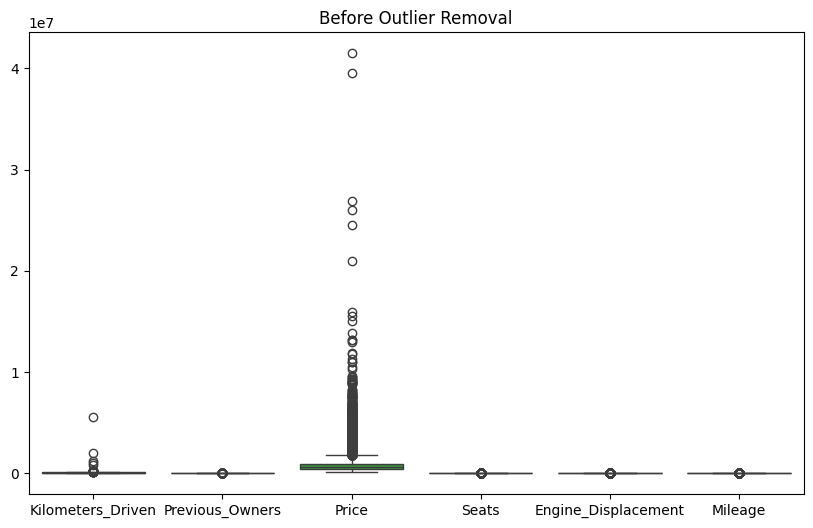

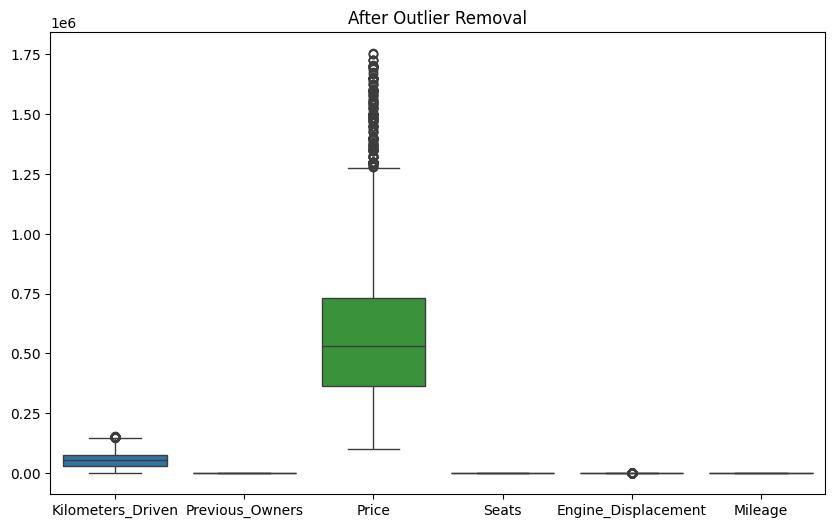

In [321]:
import matplotlib.pyplot as plt
import seaborn as sns

# Before outlier removal
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numerical_cols])
plt.title("Before Outlier Removal")
plt.show()

# After outlier removal
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned[numerical_cols])
plt.title("After Outlier Removal")
plt.show()


In [322]:
df_cleaned.to_excel('Final_Cleaned_car_data.xlsx', index=False)
print("Cleaned dataset saved as 'Final_Cleaned_car_data.xlsx'.")

Cleaned dataset saved as 'Final_Cleaned_car_data.xlsx'.


### Exploratory Data Analysis (EDA)

##### a) Descriptive Statistics

In [323]:
import pandas as pd

# View summary statistics for the entire dataset
summary_stats = df.describe(include='all')
print("Summary Statistics for the Dataset:")
print(summary_stats)

# Individual metrics
mean_values = df.mean(numeric_only=True)
median_values = df.median(numeric_only=True)
mode_values = df.mode().iloc[0]
std_values = df.std(numeric_only=True)

print("\nMean Values:\n", mean_values)
print("\nMedian Values:\n", median_values)
print("\nMode Values:\n", mode_values)
print("\nStandard Deviation:\n", std_values)

Summary Statistics for the Dataset:
         City Fuel_Type  Body_Type  Kilometers_Driven Transmission_Type  \
count    8369      8369       8369       8.369000e+03              8369   
unique      6         5         10                NaN                 2   
top     delhi    Petrol  Hatchback                NaN            Manual   
freq     1485      5554       3567                NaN              6052   
mean      NaN       NaN        NaN       5.897430e+04               NaN   
std       NaN       NaN        NaN       7.406100e+04               NaN   
min       NaN       NaN        NaN       0.000000e+00               NaN   
25%       NaN       NaN        NaN       3.000000e+04               NaN   
50%       NaN       NaN        NaN       5.369200e+04               NaN   
75%       NaN       NaN        NaN       8.000000e+04               NaN   
max       NaN       NaN        NaN       5.500000e+06               NaN   

        Previous_Owners     OEM   Car_Model  Year_of_Manufactur

##### b) Data Visualization:

###### Histograms - Histograms help understand the frequency distribution of numerical features.

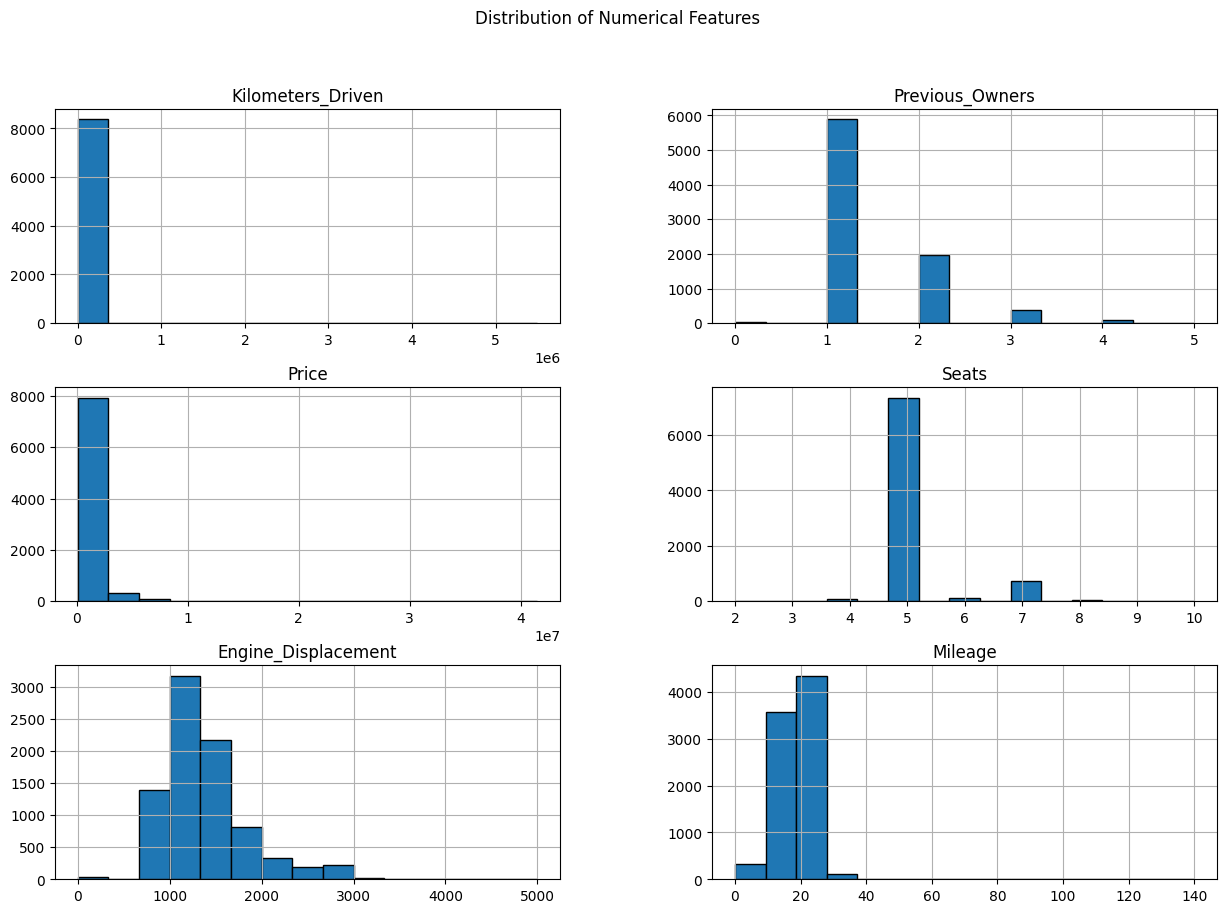

In [324]:
import matplotlib.pyplot as plt

# Plot histograms for numerical columns
numerical_cols = ['Kilometers_Driven', 'Previous_Owners', 'Price', 
                  'Seats', 'Engine_Displacement', 'Mileage']

df[numerical_cols].hist(bins=15, figsize=(15, 10), edgecolor='black')
plt.suptitle('Distribution of Numerical Features')
plt.show()

###### Boxplots - Boxplots are useful for visualizing the spread and detecting outliers.

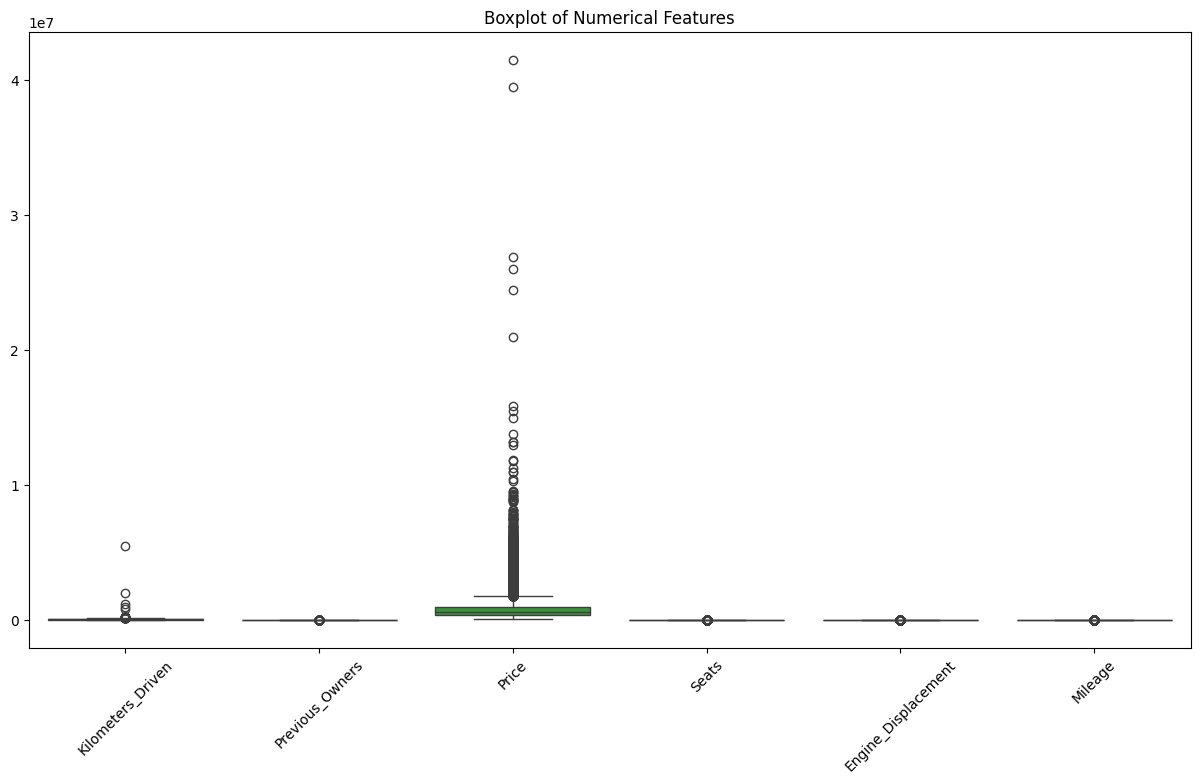

In [325]:
import seaborn as sns

# Plot boxplots for numerical columns
plt.figure(figsize=(15, 8))
sns.boxplot(data=df[numerical_cols])
plt.title('Boxplot of Numerical Features')
plt.xticks(rotation=45)
plt.show()

##### 3. Correlation Analysis - Correlation analysis measures the relationship between numerical variables. Heatmap for Correlation:

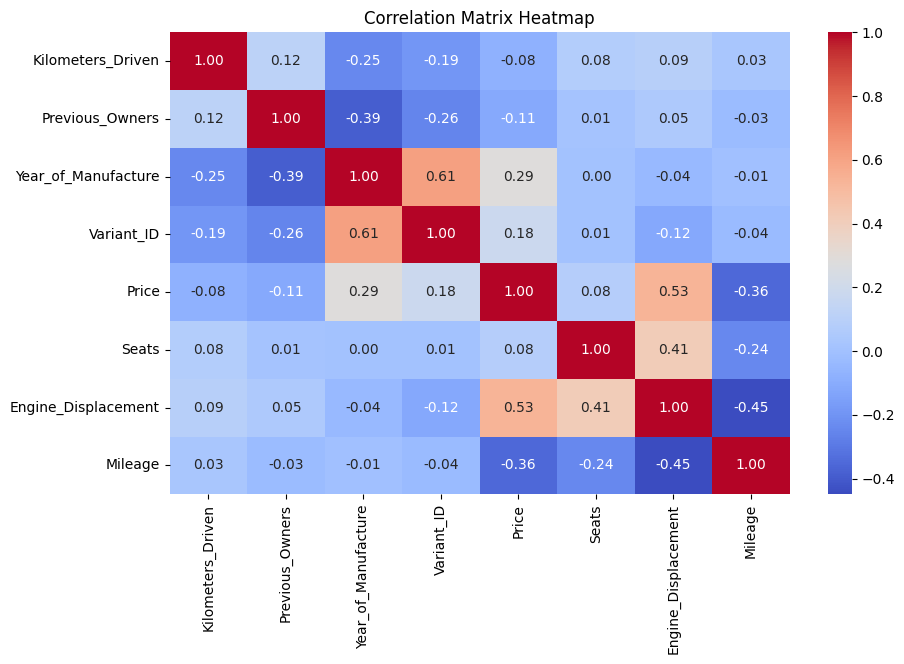

In [326]:
# Select only numerical columns
numerical_cols = df.select_dtypes(include=['number'])

# Correlation matrix
corr_matrix = numerical_cols.corr()

# Heatmap visualization
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

##### Handling Missing Values- Analyze and display missing values in the dataset.

Missing Values in Each Column:
City                   0
Fuel_Type              0
Body_Type              0
Kilometers_Driven      0
Transmission_Type      0
Previous_Owners        0
OEM                    0
Car_Model              0
Year_of_Manufacture    0
Variant_ID             0
Price                  0
Seats                  0
Engine_Displacement    0
Mileage                0
dtype: int64


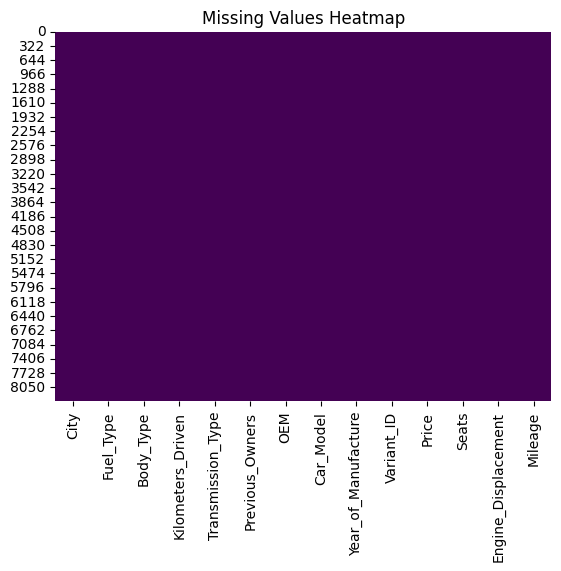

In [327]:
missing_values = df.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values)

# Visualize missing values
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [346]:
# Save descriptive statistics to a excel
summary_stats.to_excel('summary_statistics.xlsx')
print("Summary statistics saved as 'summary_statistics.xlsx'.")

Summary statistics saved as 'summary_statistics.xlsx'.


### 3) Model Development

##### a) Train-Test Split:

In [329]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Define categorical and numerical columns
categorical_cols = ['City', 'Fuel_Type', 'Body_Type', 'Transmission_Type', 'OEM', 'Car_Model']
numerical_cols = ['Kilometers_Driven', 'Previous_Owners', 'Year_of_Manufacture', 
                  'Variant_ID', 'Seats', 'Engine_Displacement', 'Mileage']

# Preprocessor: OneHotEncoding for categorical and scaling for numerical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),  # Scale numerical columns
        ('cat', OneHotEncoder(), categorical_cols)  # OneHot encode categorical columns
    ]
)

# Apply transformations
X = df.drop('Price', axis=1)  # Features
y = df['Price']  # Target variable
X_transformed = preprocessor.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

##### b) & c) Model Selection and Model Training

In [330]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Train Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate Linear Regression model
y_pred_linear = linear_model.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# Evaluate Random Forest model
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print the evaluation metrics
print("Linear Regression Performance:")
print(f"RMSE: {rmse_linear:.2f}")
print(f"R² Score: {r2_linear:.2f}")

print("\nRandom Forest Performance:")
print(f"RMSE: {rmse_rf:.2f}")
print(f"R² Score: {r2_rf:.2f}")

Linear Regression Performance:
RMSE: 715369.20
R² Score: 0.83

Random Forest Performance:
RMSE: 669391.27
R² Score: 0.85


In [331]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate Mean Squared Error (MSE)
mse_linear = mean_squared_error(y_test, y_pred_linear)

# Calculate RMSE by taking the square root of MSE
rmse_linear = np.sqrt(mse_linear)

# Print RMSE for Linear Regression
print(f"RMSE (Linear Regression): {rmse_linear:.2f}")

RMSE (Linear Regression): 715369.20


##### d) Hyperparameter Tuning:

###### Grid Search with Random Forest:

In [332]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Define the model
rf_model = RandomForestRegressor(random_state=42)

# Define the reduced parameter grid
param_grid = {
    'n_estimators': [100],  # Reduce the number of estimators to 100
    'max_depth': [None],  # Keep max_depth as None
    'min_samples_split': [2],  # Keep min_samples_split as 2
    'min_samples_leaf': [1]  # Keep min_samples_leaf as 1
}

# Set up Grid Search with parallel processing (n_jobs=-1 to use all cores)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Predict with the best model
best_rf_model = grid_search.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate the tuned model
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Tuned RMSE: {rmse_rf}")
print(f"Random Forest Tuned R² Score: {r2_rf}")

Best parameters found:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest Tuned RMSE: 669391.2709375276
Random Forest Tuned R² Score: 0.8492912137699988


In [333]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Define the model
ridge_model = Ridge()

# Define the parameter grid
param_grid = {'alpha': [0.1, 1, 10, 100,1000]}

# Set up Grid Search
grid_search_ridge = GridSearchCV(estimator=ridge_model, param_grid=param_grid, cv=12, scoring='neg_mean_squared_error')

# Fit the model
grid_search_ridge.fit(X_train, y_train)

# Get the best parameters
print("Best parameters found: ", grid_search_ridge.best_params_)

# Predict with the best model
best_ridge_model = grid_search_ridge.best_estimator_
y_pred_ridge = best_ridge_model.predict(X_test)

# Evaluate the tuned model
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression Tuned RMSE: {rmse_ridge}")
print(f"Ridge Regression Tuned R² Score: {r2_ridge}")

Best parameters found:  {'alpha': 0.1}
Ridge Regression Tuned RMSE: 721753.2719958547
Ridge Regression Tuned R² Score: 0.8247911635656905


### 4)  Model Evaluation

##### Based on the above comparison, the Random Forest model would be considered the better model due to its lower RMSE and higher R² score.

### 5)  Optimization

##### a) Feature Engineering

In [359]:
import pandas as pd

# Example loading the dataset
df = pd.read_excel('Final_Cleaned_car_data.xlsx')  # Change to your file path

# Feature Engineering: Creating new features
df['price_per_seat'] = df['Price'] / df['Seats']
df['car_age'] = 2024 - df['Year_of_Manufacture']  # Adjust current year if needed
df['engine_efficiency'] = df['Price'] / df['Engine_Displacement']
df['high_mileage'] = df['Mileage'].apply(lambda x: 1 if x > 15 else 0)
df = pd.get_dummies(df, columns=['Fuel_Type', 'Transmission_Type'], drop_first=True)

# Convert 'Previous_Owners' to integers
df['previous_owners'] = df['Previous_Owners'].astype(int)

# Additional features
df['km_per_year'] = df['Kilometers_Driven'] / df['car_age']
df['mileage_per_engine'] = df['Mileage'] / df['Engine_Displacement']

# View the new dataframe with features
print(df.head())

        City  Body_Type  Kilometers_Driven  Previous_Owners      OEM  \
0  Bangalore  Hatchback             120000                3   Maruti   
1  Bangalore        SUV              32706                2     Ford   
2  Bangalore  Hatchback              11949                1     Tata   
3  Bangalore      Sedan              17794                1  Hyundai   
4  Bangalore        SUV              60000                1   Maruti   

            Car_Model  Year_of_Manufacture  Variant_ID     Price  Seats  ...  \
0      Maruti Celerio                 2015        3979  400000.0      5  ...   
1       Ford Ecosport                 2018        6087  811000.0      5  ...   
2          Tata Tiago                 2018        2983  585000.0      5  ...   
3       Hyundai Xcent                 2014        1867  462000.0      5  ...   
4  Maruti SX4 S Cross                 2015        4277  790000.0      5  ...   

   car_age  engine_efficiency  high_mileage  Fuel_Type_Diesel  Fuel_Type_Lpg  \
0     

##### b) Regularization

In [371]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Example loading the dataset
df = pd.read_excel('Final_Cleaned_car_data.xlsx')  # Change to your file path

# Define categorical and numerical columns
categorical_cols = ['City', 'Fuel_Type', 'Body_Type', 'Transmission_Type', 'OEM', 'Car_Model']
numerical_cols = ['Kilometers_Driven', 'Previous_Owners', 'Year_of_Manufacture', 
                  'Variant_ID', 'Seats', 'Engine_Displacement', 'Mileage']

# Preprocessor: OneHotEncoding for categorical and scaling for numerical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),  # Scale numerical columns
        ('cat', OneHotEncoder(), categorical_cols)  # OneHot encode categorical columns
    ]
)

# Apply transformations
X = df.drop('Price', axis=1)  # Features
y = df['Price']  # Target variable
X_transformed = preprocessor.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Train Lasso (L1 regularization) model
lasso_model = Lasso(alpha=0.1, random_state=42, max_iter=100)
lasso_model.fit(X_train, y_train)

# Train Ridge (L2 regularization) model
ridge_model = Ridge(alpha=0.1, random_state=42)
ridge_model.fit(X_train, y_train)

# Evaluate Lasso (L1) model
y_pred_lasso = lasso_model.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Evaluate Ridge (L2) model
y_pred_ridge = ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Print the evaluation metrics for both models
print("Lasso (L1) Regularization Performance:")
print(f"RMSE: {rmse_lasso:.2f}")
print(f"R² Score: {r2_lasso:.2f}")

print("\nRidge (L2) Regularization Performance:")
print(f"RMSE: {rmse_ridge:.2f}")
print(f"R² Score: {r2_ridge:.2f}")

Lasso (L1) Regularization Performance:
RMSE: 116899.60
R² Score: 0.85

Ridge (L2) Regularization Performance:
RMSE: 117145.83
R² Score: 0.85


C:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25013375403367.94, tolerance: 43007273284.828735
  model = cd_fast.sparse_enet_coordinate_descent(
